In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re, pip, conda

In [3]:
for package in [sklearn,mlp,np,pd,sns,pip,conda]:
    print(re.findall("([^']*)",str(package))[2],package.__version__)

sklearn 1.0.1
matplotlib 3.4.3
numpy 1.22.4
pandas 1.3.4
seaborn 0.11.2
pip 22.2.2
conda 4.12.0


In [3]:
#pip install --upgrade scikit-learn
#conda update scikit-learn

## **<center><font color ="k">基于时间序列预测流媒体平台留存行为<br><br>WSDM顶会 & 爱奇艺 | 2.5W奖金赛题 | Top 1方案<br><br>Part 1 & Part 2</font></center>**

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/2022Case/WSDM%E7%AB%9E%E8%B5%9B.png)

该比赛为数据挖掘顶会刊物WSDM与爱奇艺在2022年初联名举办的时间序列预测大赛。WSDM（International Conference on Web Search and Data Mining）是CCF-B类会议，属数据挖掘方向顶会刊物之一，在数据挖掘和机器学习领域有举足轻重的地位，而爱奇艺是中国和世界领先的高品质视频娱乐流媒体平台，涵盖影剧、综艺、动漫在内的专业正版视频内容，每个月有超过5亿的用户在爱奇艺上享受娱乐服务，因此本次竞赛是学术与商业高度结合的典型案例，含金量极高。

时间序列预测、尤其是以时间点为条件的复杂业务预测是当今机器学习领域最受瞩目的研究方向之一。**本竞赛集中了当今最顶尖的时间序列问题中的众多现实挑战，包括时间序列构筑、时间标签定义等，是最有难度的时序预测场景之一**。为了抢夺用户时间、量化用户满意度，爱奇艺手机端APP使用“用户留存分”为每一位用户打分，以衡量该用户对爱奇艺平台的粘性、同时也衡量爱奇艺所提供的各项服务的有效程度，为各类决策提供重要的决策依据。在本次竞赛当中，**我们将利用爱奇艺用户的各类行为数据、用户画像等数据预测该用户的忠诚度评分。** 具体地来说，我们要**利用一个用户在X月X日之前的行为预测该用户在X月X日时的7日留存分**。

- **数据来源**：爱奇艺APP脱敏和采样后的数据，由爱奇艺提供给WSDM官方，用于数据竞赛<br>
- **具体表单**：`test-a-without-labels.csv`是预测用的样本编号(用户ID)与对应日期，其他5个csv是用户行为、用户画像、视频列表等各类信息<br>
- **数据量级**：1000w+次登录记录，7000w+浏览记录，59w+用户画像<br>
- **预测类型**：可分类可回归的多变量时间序列<br>

## 目录（课件版本V11.5）

**一、赛题解读**<br>
&emsp;&emsp;1. 流媒体平台的基本业务<br>
&emsp;&emsp;2. 理解用户留存分与竞赛标签<br>
&emsp;&emsp;3. 数据初探与基础预处理<br><br>
**二、理解时间践序列预测**<br>
&emsp;&emsp;1. 单变量 vs 多变量时序数据<br>
&emsp;&emsp;2. 时序数据应用的基本原则<br>
&emsp;&emsp;3. 时间序列模型（包含加餐内容）<br>
&emsp;&emsp;4. 时序数据的去时序化<br><br>
**三、冠军方案：时序数据构造**<br>
&emsp;&emsp;1. Baseline建立规则<br>
&emsp;&emsp;2. 用户行为多样性<br>
&emsp;&emsp;3. 多变量时序数据构造代码群<br>
&emsp;&emsp;4. 训练、验证、测试数据的完整构建<br><br>
**四、冠军方案：建模与模型融合**<br>
&emsp;&emsp;1. 冠军建模方案架构详解<br>
&emsp;&emsp;2. 建模代码全解<br>
&emsp;&emsp;3. 冠军团队后处理技巧<br><br>
**五、结果提交与排名审查**<br>

# 一、赛题理解

## 1 流媒体平台的基本业务

**流媒体业务百问**：

- 国际市场与国内市场中都有哪些顶级的流媒体平台？

- 流媒体平台的核心收入来源有哪些？用户在其中扮演怎样的角色？

- 为什么要预测用户留存分？媒体平台们抢夺用户的根本原因是什么？

- 在国内市场中，谁会与流媒体平台抢夺用户？

- 用户选择某一个流媒体平台的可能的原因有哪些？

- 流媒体平台怎样才能提升用户留存分？

- ＊如果让你定义用户留存分的计算方法，你会如何定义？

流媒体服务（Stream Services）是当今全球娱乐产业最重要的新兴板块之一，也是人们生活中最重要的娱乐方式之一。广义地来说，流媒体服务包含了线上电视剧、电影、综艺、真人秀、动画、甚至体育赛事等一切在线的长视频（Online Long Video）及长视频相关服务，狭义地说，流媒体服务就是“移动端的卫星电视与广播”，因此一切允许我们通过手机或其他移动端设备观看影视作品的APP都可以被称之为流媒体平台。从全球角度来看，最著名的流媒体平台是奈飞、迪士尼+、亚马逊PrimeNow等超大互联网巨头支持的超大品牌，而在国内，爱奇艺、腾讯视频、优酷、哔哩哔哩是最为著名的流媒体平台。近两年，短视频平台如快手、抖音、西瓜视频等也开展了长视频业务，芒果TV等依赖于电视台和电视节目的APP也开始逐渐发展。目前为止，国内流媒体市场竞争激烈，可谓群雄逐鹿。

通常来说，流媒体平台通过向付费会员提供线上影视娱乐内容来获得收益、同时也以独立商品的方式售卖独立娱乐内容（即，你可以购买APP会员、也可以单独购买某部电影在某段时间内的观看权限），因此**大部分流媒体平台是内容的分发者**，真正的娱乐内容制作人依然是传统的电视台、电影制作公司。但奈飞、迪士尼+、亚马逊prime、爱奇艺、腾讯视频等**全球流媒体服务巨头都兼任内容生产者与内容分发者的双重身份**——例如，迪士尼生产动画电影，而奈飞和亚马逊每年上线网剧，将自己的网剧/电影观看权限分发到其他没有内容生产能力的平台，也可以为流媒体服务巨头获得收益。

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/2022Case/02.png)

爱奇艺，作为中国大陆最著名的流媒体平台之一，即是内容的生产者也是内容的分发者。光是在2021年一年，爱奇艺就推出了《赘婿》、《风起洛阳》、《谁是凶手》等热门剧集内容，还推出了大量新兴综艺、致力拓宽海外市场。在这些努力下爱奇艺在2021年的主营业务收入总额达到305亿元人民币（相比之下全球第一流媒体巨头奈飞的收入是296亿美元，国内流媒体产业还需加油），已突破年度新高。然而受疫情与国内严酷竞争影响，爱奇艺最终还是没能将non-GAAP利润转亏为盈，2021年产生净损失30亿人民币，在股东压力和市场压力下，展开变革、开源节流、扭亏为盈等目标已是爱奇艺董事会头上的达摩克里斯之剑。

根据2021年年报，爱奇艺的主要收入来源有以下四大部分（英文由百度股市通提供，不是完全准确）：

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/2022Case/03.jpg)

- 会员业务营收（Membership）：每月收取的会员费用，收入占比超过50%，是爱奇艺最为核心的收入来源
- 线上广告营收（Online Advertising）：投放在爱奇艺平台上的广告所付的费用
- 其他平台内容分发（Others Platforms）：爱奇艺自生产的内容在其他平台投放时收取的版权费用
- 其他收入与调整（Others&Adjustments）：直播、在线游戏、IP授权、网络文学与电商等多样化变现形式

从收入版图来看，会员收入是爱奇艺最为关键收入类型，而每月的会员费支付情况则受拉新、留存、ARM（平均单用户收入）三大关键因素影响，而这三大关键因素又受爱奇艺平台上的内容策略影响。因此毫无疑问的，对爱奇艺来说最为重要的公司发展战略就是**内容战略与用户战略**。根据2021年末的股东大会信息，2022年爱奇艺会员业务的核心战略主要集中在三个方向：增加平均单会员收入，（即ARM）、提高付费会员的留存率、持续拉新促活。其中，提高付费会员的留存率又是稳定关键收入的重要手段。

在经历艰难的2021年后，爱奇艺创始人、首席执行官龚宇表示，“爱奇艺率先开启中国长视频行业的新阶段。市场竞争从单纯**追求数量向注重质量转变，运营重点从抢占市场份额向提升运营效率转变**，这已成为包括爱奇艺在内的行业头部企业的共识。”即在2022年，爱奇艺的用户战略将从粗犷转向精细，而移动端的精细化运营离不开飞速发展的人工智能技术。正是在这一复杂背景下，爱奇艺与WSDM顶刊共同合作，举办了这一场《基于时间序列预测用户留存分》的关键比赛。

## 2 标签解读：理解用户留存分

本次竞赛中需要预测的标签为用户留存分。用户留存这一关键词听起来像是历史统计量——毕竟只有过去的数据才能够指示我们用户是否真正“留存”，在实际业务当中，我们也经常对某一产品或某一业务线计算历史的“用户留存率”。但事实上，用户留存或者用户忠诚度这一指标衡量的是**一个或整体用户未来能够持续为企业提供价值的能力**。很明显，如果一个用户并不能为企业提供价值，那这个用户对企业再忠诚也没有意义——例如，如果一个用户从不购买产品与服务、万年白嫖APP上的资源，那许多时候，这个用户在APP上停留的时间再久也没有意义。

当然了，不同互联网企业、不同业务流程下，用户“提供价值”的方法并不是唯一的。即便是从不购买商品和服务的**白嫖流量也可以通过业务流程发挥价值**——例如，任何游戏中都需要被氪金玩家爆杀的白嫖玩家，任何流媒体和短视频平台上都需要支持巨大广告收益的流量基数，因此即便是完全不消费的白嫖流量也是需要企业去刻意维护和留存的。当然，不是每一个企业都会选择这样的道路，当企业开始精细化运作的时候，白嫖流量就是第一批被放弃的用户。



在实际业务当中，用户留存分的定义方法是多种多样的，但需要注意的是，大部分业务场景下，用户的生命周期是有限的，因此用户不会永远对企业或APP忠诚，故而无论是历史留存率、还是未来留存分，都需要被限定在某一时间段内。但同时，当前对APP忠诚的用户在未来可能创造出更大的价值，因此在实际当中，我们可能会使用以下方式来定义用户的留存：

> - **某一具体时间段内，用户具体的登录次数**。<br><br>
> 登录次数越多，则代表用户的历史留存分越高，未来留存的可能性也更大。这一定义方式与日活率这一指标息息相关，往往存在于白嫖流量也非常重要的业务场景中，例如抖音就更可能采取这样的方式衡量用户的留存程度，因为抖音最核心的收入是广告收入。<br><br>

> - **某一具体时间段内，用户与APP发生的交互次数**。<br><br>
> 交互次数越多，用户留存分越高。例如，观看视频、观看直播、留言、三连、参与游戏任务、查看商品等具体行为。这一定义方式会比登录次数更加深度，如果这样定义用户留存分，则说明在当前业务场景中，用户至少需要与APP有所互动才能贡献价值。<br><br>
> B站就更可能采用这样的方式来衡量用户的留存，因为B站的收入高度依赖于用户与up主之间的互动。B站大规模营销百万up主、每年举行百大up主颁奖、B站所推出的一系列功能（三连、电池）等都要求B站用户更频繁地与up主互动，都更倾向于与B站互动有很大的关系。这种稳固的关系允许B站设置比其他流媒体平台的年费会员价格更高的大会员价格。<br><br>

> - **某一具体时间段内，用户在APP上实际交易、付费的次数**。<br><br>
> 例如，会员付费、下单购买商品、为主播刷礼物等等。这一定方式说明当前业务场景中，用户直接付费是非常关键的价值贡献方法。电商店铺和品牌很可能会使用这样的留存方式，因为用户与店铺互动的唯一有效方式就是付费购买商品。

当然，我们也可能根据最后一次活跃的日期到当前日期来定义用户的留存程度和流失程度——例如，许多美妆品牌会规定3个月内不复购的用户为流失用户，也有美妆品牌会规定1年内不复购的用户为流失用户。因此用户留存与用户活跃、用户流失等概念是息息相关的。

- **当前竞赛如何定义用户留存分？**

本次竞赛规定的标签为用户的“未来7日留存分”，该7日留存分的计算规则如下：

> 如果一个用户10月1日的“7日留存分”等于3，则代表这个用户接下来的7天里（10月2日~8日），有3天会**登录**爱奇艺APP。

在竞赛官方说明中明确指出：该留存分计算只与“登录与否”有关，不与登录的类型、登录的设备、登录后有无具体互动（比如登录后是否看视频）等行为有关。

很显然，根据该规则任意一天内只会有“访问1”和“不访问0”两种结果，因此7日留存分应该是[0,7]范围内的正整数，因此光从算法角度来说，我们可以做8分类也可以做回归。然而，官方声明中明确表示该案例为**数值预测型**案例，即建议参赛者们使用回归类算法。因此，即便我们使用正整数标签进行训练，预测值也是浮点数。官方规定，预测结果保留小数点后2位。

同时，根据官方给出的标签定义，一个用户在不同日期之后的登录行为不同、因此一个用户在不同日期的留存分明显是不同的，因此每一个用户留存分都依赖于具体的日期进行计算。故而，该竞赛要解决的是一个**利用历史信息对未来某一时间点的留存分进行预测的时间序列问题**。更具体地说，现在我们要**利用一个用户在X月X日之前的行为预测该用户在X月X日时的7日留存分**。

- **在当前定义下，该如何理解浮点数标签？**

首先，真实标签一定是正整数，预测出的浮点数是由于我们使用回归算法而产生的“误差”，但浮点数的存在并非完全不可解释。**其中一种可能的解释是，标签是未来7天内、用户会在每一天访问APP的概率之和**。比如说，假设预测标签为3.22，则3.22可以被解释成如下概率之和：

|第N天|访问APP的概率|
|:-:|:-:|
|第1天|1.00|
|第2天|0.00|
|第3天|0.22|
|第4天|0.00|
|第5天|1.00|
|第6天|1.00|
|第7天|0.00|

这表示用户在第1天、第5天和第6天访问APP的概率是100%，而在第3天访问APP的概率是22%，这种理解既符合官方给出的声明：当标签为3时表示未来7天中一定有3天会访问APP，同时也可以存在浮点数。当然，这不是官方的解释、也不是唯一正确的解释，只是一种可能的解释。但无论如何，标签约接近7，则代表用户留存程度越高，标签约接近0，则代表用户留存程度越低。

## 3 数据初探与基础预处理

在本次竞赛的课件中你可以看到，本次竞赛提供了6个csv文件，其中`test-a-without-label.csv`是测试集，剩下的5个csv包含不同的用户画像和行为信息。在本次竞赛中官方提供了简略的数据字典供我们使用，在这里我直接将数据字典中的内容作为列名填入数据以供查看。我们一起来看看这6个csv文件中包含的信息：

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/2022Case/%E5%B1%8F%E5%B9%95%E6%88%AA%E5%9B%BE%202022-10-05%201930123.jpg)

### 3.1 测试集test-a-without-label.csv

In [4]:
test = pd.read_csv(r"D:\Pythonwork\2022DACase\UserRetentionPrediction\data\test-a-without-label.csv"
                   ,header=0)
#test.columns = ["用户ID","(脱敏后)需要预测的留存分日期"] #中文更有利于理解，英文更有利于敲代码
test.columns = ["user_id","predict_date"]

In [5]:
test.shape #一共1w5用户，出乎意料地少

(15001, 2)

In [6]:
test.head()

,user_id,predict_date
0,10007813,205
1,10052988,210
2,10279068,200
3,10546696,216
4,10406659,183


根据你的需求，你可以选择使用中文列名或英文列名，中文列名更便于理解，英文列明更便于敲代码。测试集的数据异常简单，只包含用户ID和留存分日期两个特征，这也是标签定义中被关联到的唯二特征（毕竟我们要预测的是A用户在X月X日的留存分，因此严格来说，只要有用户ID和日期就可以进行训练和预测）。

在该表单中，日期为脱敏后的、登录APP的日期。本次竞赛所提供的所有数据都已脱敏，因此我们看到的日期并不是具体的年月日，而是脱敏后的数字编码，其中数字越大说明该日期脱敏前越晚（即指向未来）。理论上该数字最大不会大于366，最小不会小于1，但并没有任何说明表示编号为1的日期代表了1月1日，因此具体的日期是不明朗的。

> 来看测试集覆盖的时间周期：

In [7]:
test.iloc[:,-1].max() #最晚的日期

222

In [8]:
test.iloc[:,-1].min() #最早的日期

161

> 检查用户ID是否有重复值：会不会对同一个用户在不同日期的留存分进行预测？

In [9]:
#检查用户ID是否有重复值
test.iloc[:,0].value_counts()

10007813    1
10395201    1
10476067    1
10544537    1
10407998    1
           ..
10256345    1
10528454    1
10312797    1
10512586    1
10354569    1
Name: user_id, Length: 15001, dtype: int64

> 检查日期是否有重复值：会不会需要在同一个日期下，预测不同用户的留存分？

In [10]:
test.iloc[:,-1].value_counts()

196    358
200    355
194    354
202    344
203    342
      ... 
171    146
220    145
221    144
216    143
213    143
Name: predict_date, Length: 62, dtype: int64

用户ID没有重复，而日期有重复，这暗示我们**即便是在相同的日期下，不同用户表现出来的行为也截然不同**，这可能说明，在本次竞赛中我们需要让模型重点学习的不是不同日期下的留存模式，而是不同用户的留存模式。自然，**同一个用户在不同的日期下表现得也不相同**，因此我们可以大胆假设：日期的变化对所有用户造成相似的影响，但每个用户的留存分的差异其实是由用户自身的行为模式决定的。

例如，这段时间APP做了推广/推送，因此大部分用户的登录频率都提高了（相同时间相似影响），但不同的是，原本就一周登录3次爱奇艺的用户在变得活跃后一周登录了7天，成为超忠诚用户，而原本一周只会登录1次或者一次都不登录的用户，在这一次刺激下登录了2天。这样的状况在时间序列预测中很常见，例如爆款商品在双11也是爆款商品，平时卖得不好的商品在双11期间虽然销量增加、但还是卖得不好。很显然，在时间和其他因素共同决定未来行为的预测赛中，大部分时候是“非时间因子”更多地决定了标签的真实值。

> 检查缺失值（虽然一般不会有问题但还是以防万一）

In [11]:
test.isnull().sum()

user_id         0
predict_date    0
dtype: int64

### 3.2 登录信息 app_launch_logs.csv

登录信息是我们需要高度重视的信息，因为登录的记录与标签息息相关、还会指导我们后续需要提取的大量规则。

In [12]:
launch = pd.read_csv(r"D:\Pythonwork\2022DACase\UserRetentionPrediction\data\app_launch_logs.csv",header=0)
#launch.columns = ["用户ID","登录类型","登录日期"]
launch.columns = ["user_id","launch_type","launch_date"]

In [13]:
launch.shape #包含849w+次的登录信息，登录信息的数据量明显远远多于测试集信息

(8493878, 3)

In [14]:
launch.head()

,user_id,launch_type,launch_date
0,10157996,0,129
1,10139583,0,129
2,10277501,0,129
3,10099847,0,129
4,10532773,0,129


在这一表单中，**一个样本代表一个用户在某一具体日期登录过一次**，即索引为0的样本就代表用户ID为10157996的用户在129这天登录过。如果一个用户在同一个日期登录M次，那会诞生M条内容一致的样本。而同一个日期下如果登录过N个用户，则会诞生日期一致、用户ID不一致的N个样本。根据标签的定义，我们实际预测过程当中并不关心用户是否在同一日期登录了多次，而只关系用户在这一日期有没有登录，因此对于内容完全一致的样本我们可以采取去重处理：

> 检查缺失值、重复值

In [15]:
launch.isnull().sum() #不存在任何缺失值

user_id        0
launch_type    0
launch_date    0
dtype: int64

In [16]:
launch.drop_duplicates().shape[0] #存在重复值，说明确实存在一个用户在同一日期、用同一设备多次登录的情况，但这种情况并不多

8492342

In [17]:
launch = launch.drop_duplicates() #由于不关心同一日期多次登录的情况，因此我们使用去重后的表单替换原始表单
launch.index = range(launch.shape[0]) #删除样本后需要恢复索引

> 登录类型有几种？分别是什么类型？

In [18]:
launch["launch_type"].value_counts() #猜测0类是自发登录APP，1类是通过其他平台登录或通过链接进入APP

0    8109385
1     382957
Name: launch_type, dtype: int64

In [19]:
launch["launch_type"].value_counts()[0]/launch["launch_type"].shape[0]

0.9549056078994463

> 一共有多少用户被记录了？

In [20]:
launch["user_id"].unique().__len__()

600000

将用户ID使用unique进行去重后发现还剩下60w用户，即该表单是60w用户在不同的日期分别产生的849w+个登录行为的记录，因此一个用户可以对应多个日期。60w用户的数据量远远多于测试集中的用户数据量1.5w。

> 那每个用户分别在哪些日期登录了呢？用户的登录周期相同吗？

In [21]:
launch.head()

,user_id,launch_type,launch_date
0,10157996,0,129
1,10139583,0,129
2,10277501,0,129
3,10099847,0,129
4,10532773,0,129


In [22]:
#随意找出几个排序靠前的用户进行查看
launch.loc[launch["user_id"] == 10157996,:].sort_values(by="launch_date")

,user_id,launch_type,launch_date
7038811,10157996,0,114
7474130,10157996,0,115
4633446,10157996,0,119
7075356,10157996,0,122
280060,10157996,0,127
5823276,10157996,0,128
0,10157996,0,129
5145981,10157996,0,130
3899556,10157996,0,131
6641342,10157996,0,132


In [23]:
launch.loc[launch["user_id"] == 10139583,:].sort_values(by="launch_date")

,user_id,launch_type,launch_date
2653182,10139583,0,128
5810902,10139583,1,128
1,10139583,0,129
2665603,10139583,0,200
7400444,10139583,0,202


很显然，**不同的用户覆盖了不同的时间周期**，这说明对某些用户我们可能有几百条样本，而对某些用户可能只有少数几条样本。从业务上来说这一点可以理解，毕竟用户有在任意时间段、以任意频率登录APP的可能。

> 不同日期的登录状况可视化

此时我们可以进一步深度探索：用户的登录行为是否受到日期变化的影响呢？通常在时间序列预测中，我们会假设时间段与登录行为有一定的关系。虽然每个用户覆盖的具体时间周期不同，但假设大量用户集中在某个时间周期内登录，那可能说明用户的登录行为极大程度地受到了平台/APP运营策略的影响，例如：热门网剧或综艺上线、平台限时免费活动等等。但同时也可能说明——在制作该数据、即对爱奇艺5亿用户进行采样时，竞赛方对某个时间段内的用户登录行为进行了集中采样，因此某个时间段内登录的用户特别多。

为探索这一点，我们可以绘制以登录日期为横坐标、当日登录的总用户数为纵坐标的**条形图**，以此来观察日期与登录总用户数的关系。

In [24]:
df = launch.groupby("launch_date").count()

In [25]:
df.head()

,user_id,launch_type
launch_date,,
100,39302,39302
101,39313,39313
102,39642,39642
103,39054,39054
104,36304,36304


In [26]:
df.shape

(123, 2)

In [27]:
df.index #查看索引即可查看日期范围

Int64Index([100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
            ...
            213, 214, 215, 216, 217, 218, 219, 220, 221, 222],
           dtype='int64', name='launch_date', length=123)

> Q：这个日期和测试集覆盖的日期比起来如何？有什么风险？

很明显，最早的登录日期是100，最晚的登录日期是222，跨越了大约120天（即4个月）的时间。对流媒体、尤其是线上长视频行业而言，3-4个月是一个常见的周期，因为这是行业内约定俗成的最佳收视+宣传周期。不知你是否注意过，B站上的新番或美剧，TV动画或TV剧集一般是11、12话，每周更新一话即持续三个月时间，外加前后宣翻+活动大概持续一个月时间。对于较长的剧集来说，电视台或流媒体平台也会选择每日联播、每周2集这样的方式来呈现24集或36集这样的集数，而覆盖一整年的年番则一般52或56集。因此，3-4个月是一部新剧从宣传到放完的常见周期。因此4个月这个周期可能意味着当前数据是爱奇艺某一部剧上线后针对性收集的资料。

同时，每个流媒体平台在内容上线、内容营销方面的思路是不同的。通常以电视剧为核心内容资源的平台会将剧集按季度进行分割，因此在电视行业会有“夏季档”/“秋季档”之说。在当前档期会有大量新剧上线、持续连载，共同支撑这一季度的内容资源，在这个阶段中用户的登录行为一定会很大程度受到新剧上线行为的影响、从而在短时间内大规模登录、或每周固定的时间登录。通过绘制每日登录情况的图像，我们可以判断当前数据的真实业务情况。

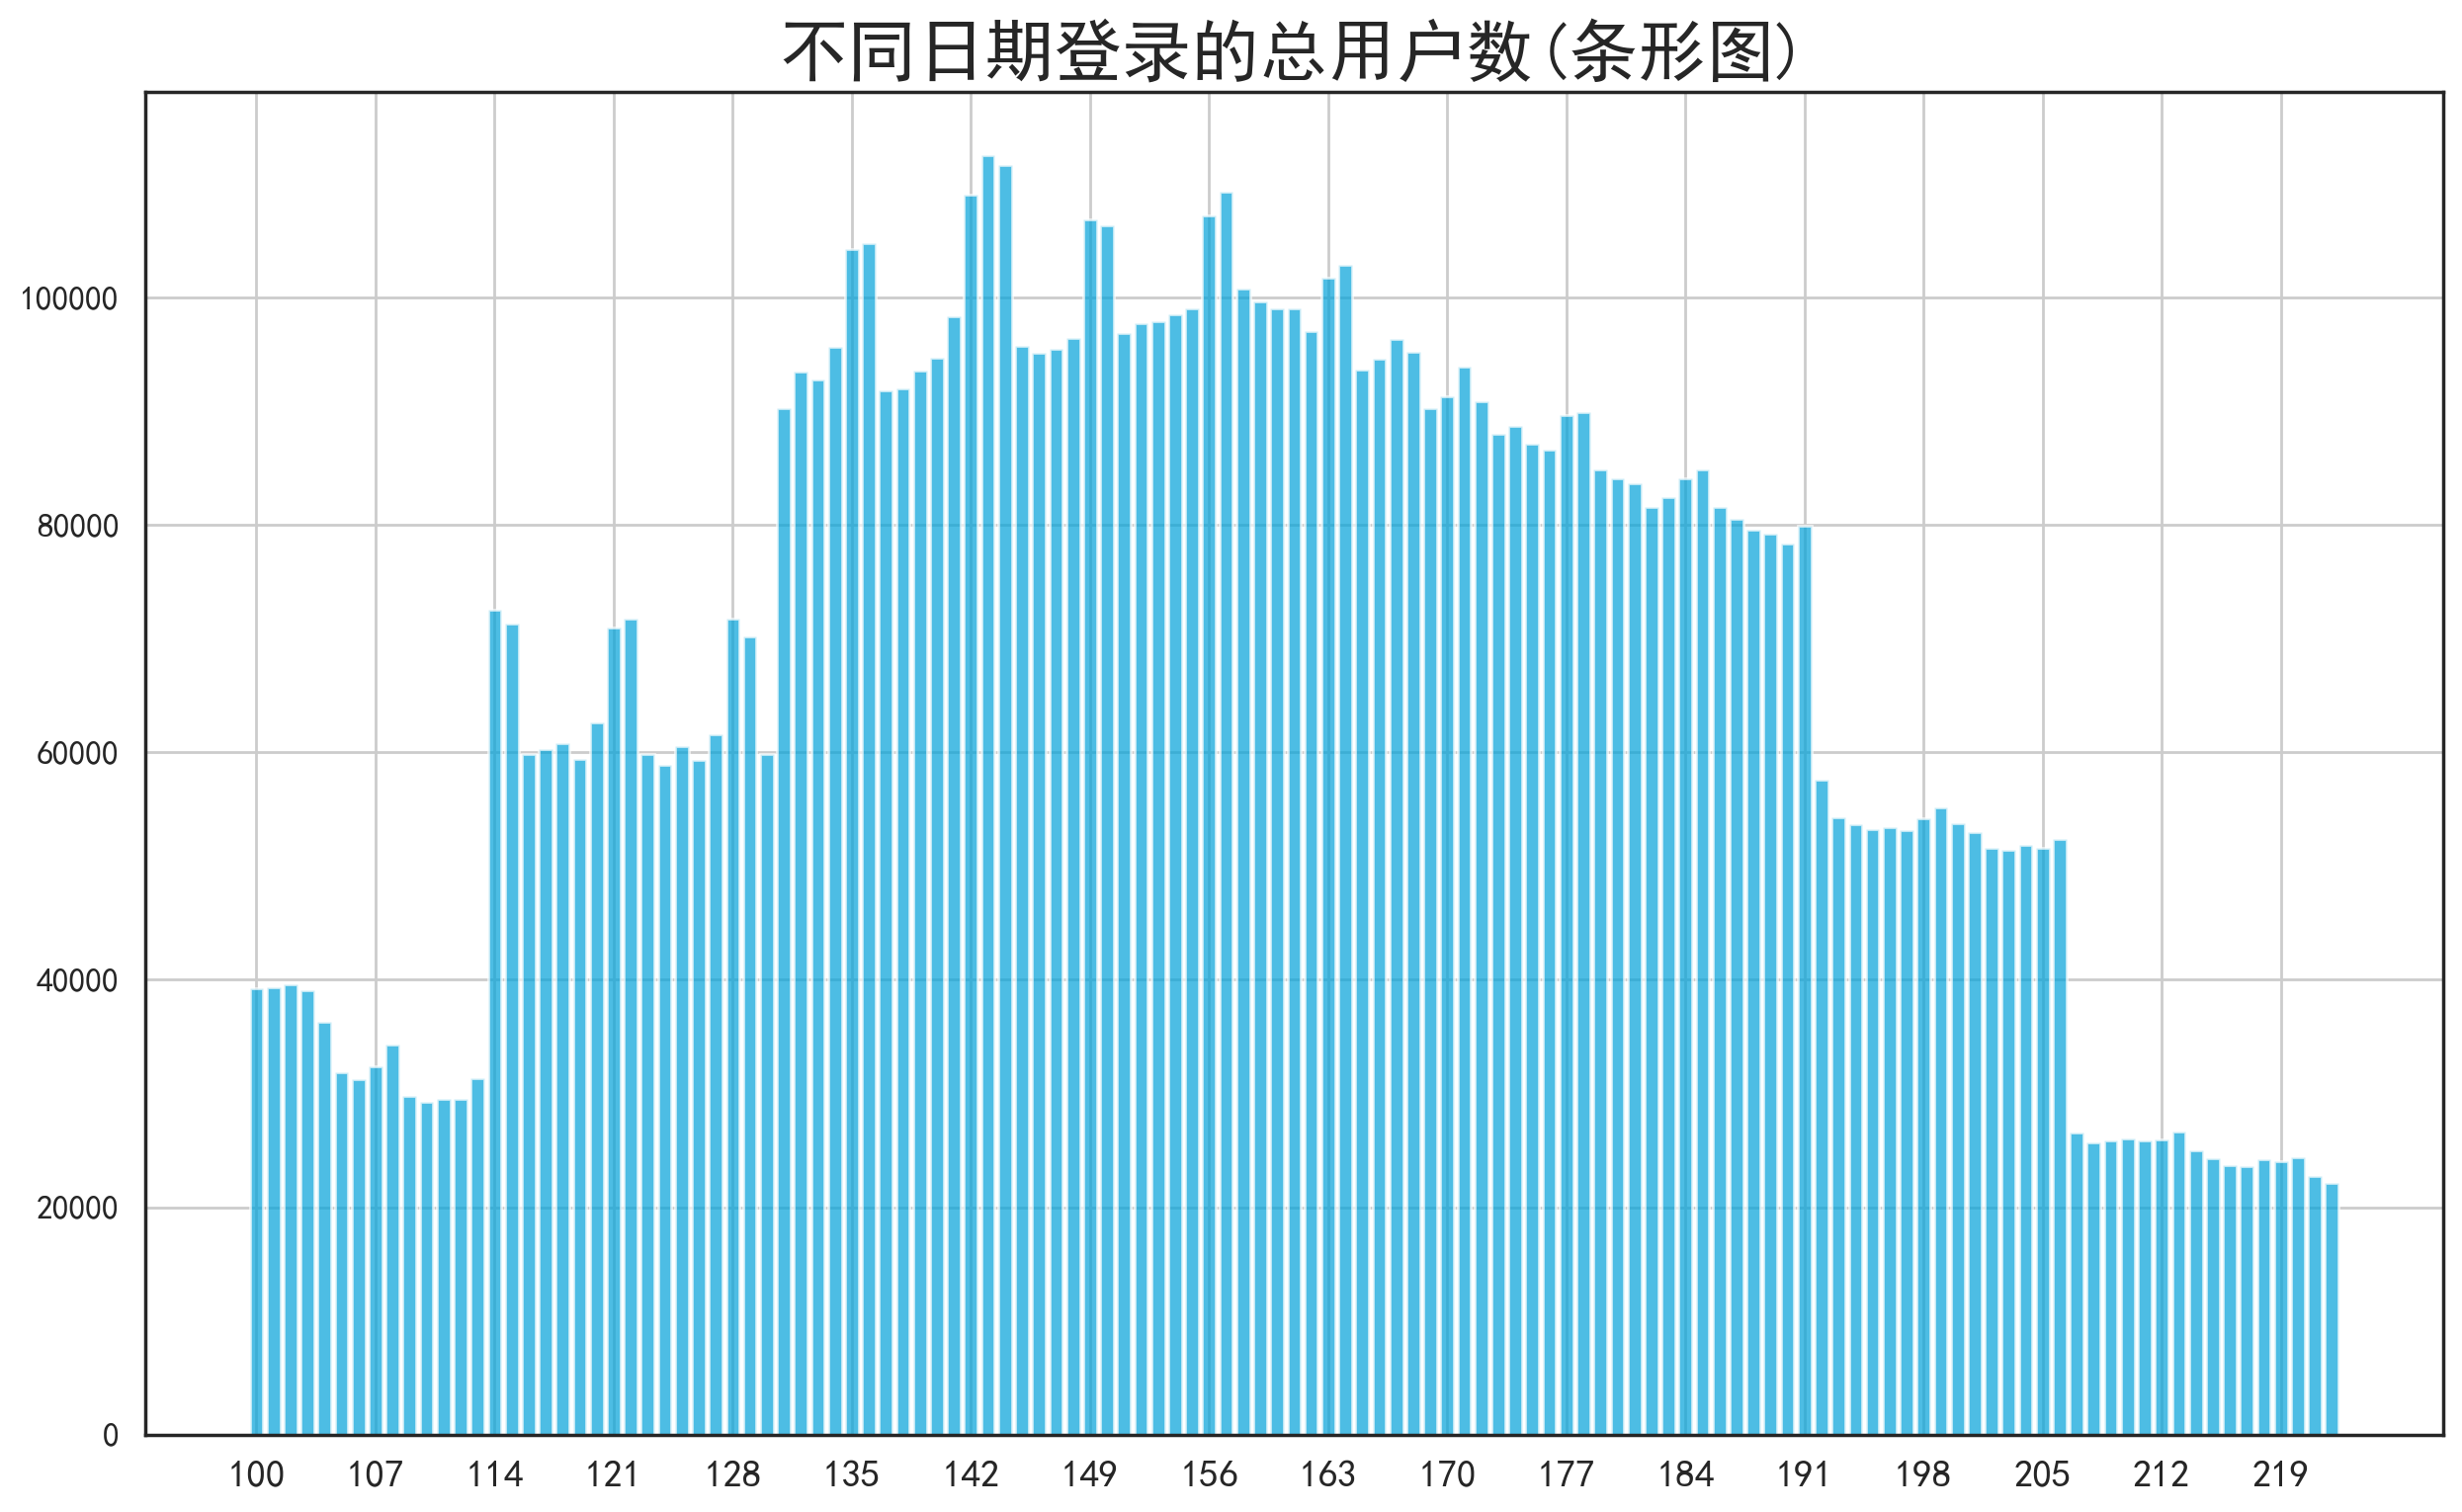

In [28]:
plt.figure(figsize=(15,9),dpi=200)
sns.set(style="white",font="Simhei", font_scale=1.1)
plt.bar(df.index,df["user_id"],color="#01a2d9",alpha=0.7)
plt.title("不同日期登录的总用户数(条形图)",fontsize=25)
plt.grid()
plt.xticks(ticks = range(100,221,7),fontsize=14);

从这里我们很明显可以观察出：

- **当时间变化时、用户登录总次数的变化异常规律**。在这4个月中最初的两周和最后的两周，登录人数相对较少；在114-128这两周、以及191-205这两周，登录人数居中；在135-191这8周中，用户则聚集性地登录。通常来说，如果数据呈现太过规律的形态，那这种形态往往不太可能是由日常业务自然形成的。更可能是，竞赛组在对原始数据抽样、脱敏时，故意构造了异常规律的数据分布，而这一数据分布可以在预测时被我们利用。由于大部分用户在135-191这8周都有登录，因此在后续建模过程中，我们很可能专注地使用135-191这段时间内的时序数据。

- **用户登录的情况明显具有一定的周期性**。从107日开始，大约每7天就会出现2天登录高峰，猜测可能是周末/或某个剧上线的那两日。这种规律一直持续到了191日，持续了大约11-12周，猜测可能是某部剧/综艺节目的上线带来了这种效应。在数据明显按星期/月份有周期性的情况下，我们可以在对时间数据进行特征衍生时、构建基于星期、基于月份的时间特征。

由于日期众多，因此该条形图呈现为类似直方图的效果。如果将该条形图连线，则可以轻松生成以日期为横坐标的概率密度图像：

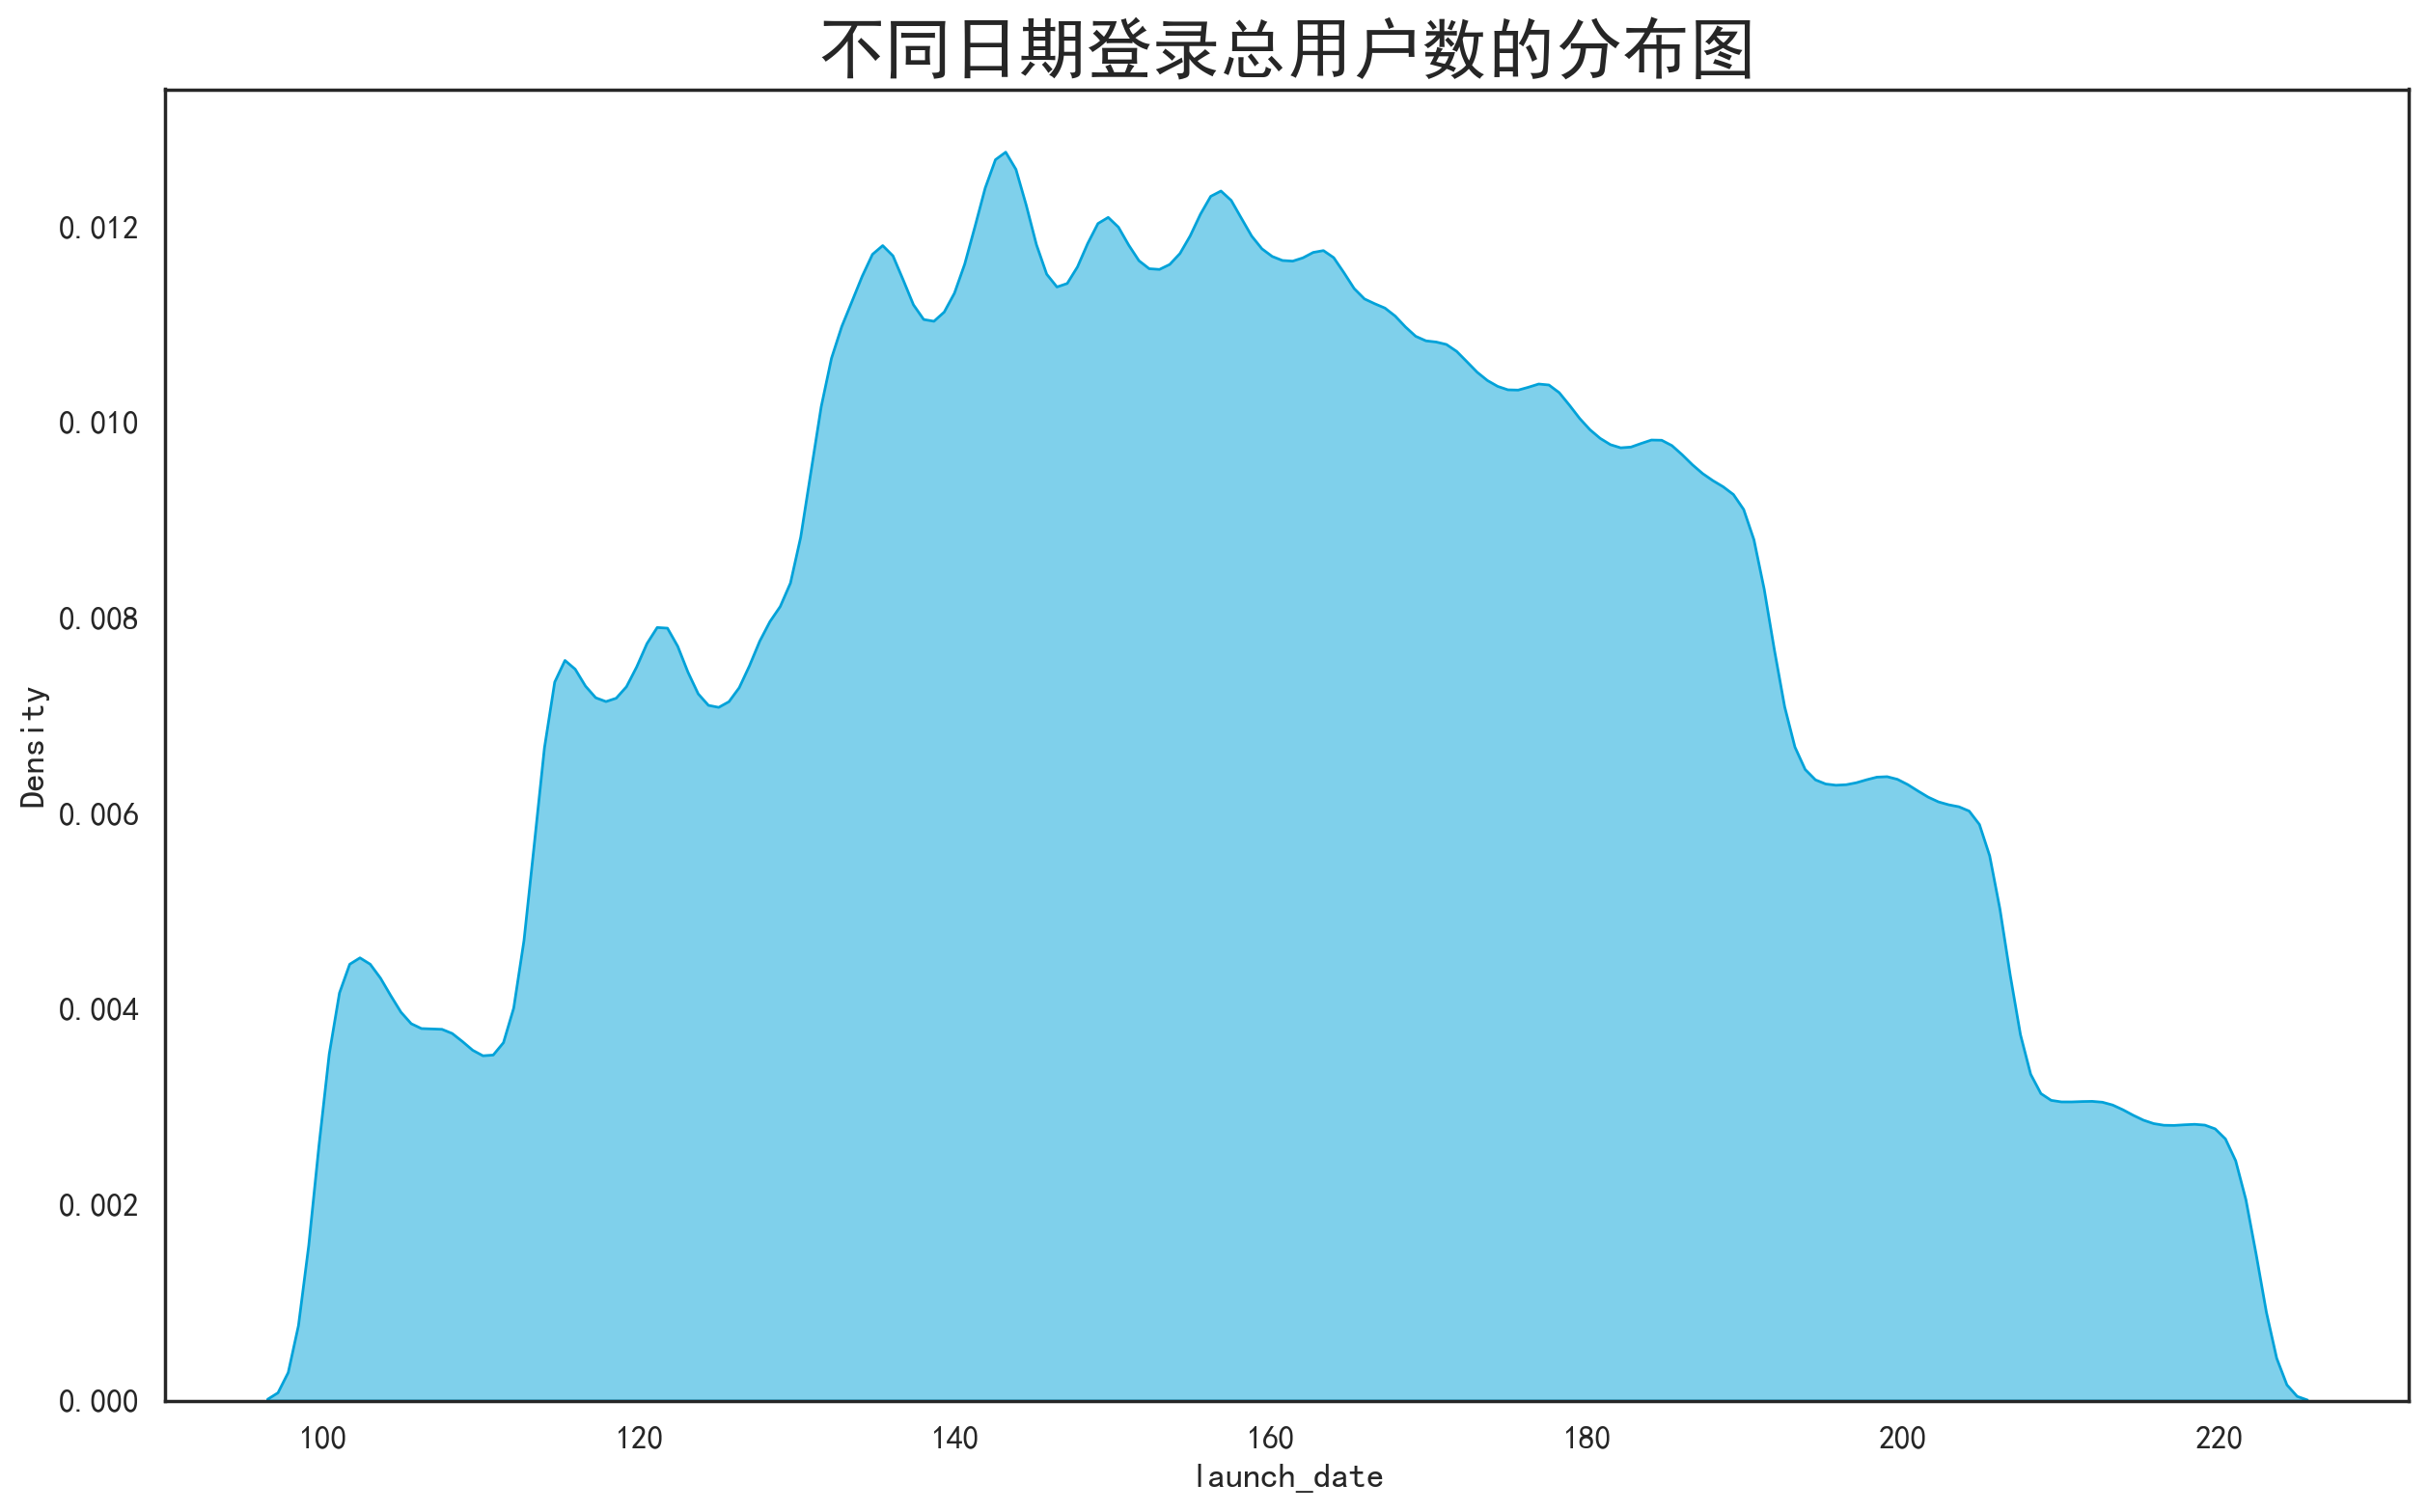

In [29]:
import seaborn as sns
plt.figure(figsize=(15, 9), dpi=200)
sns.kdeplot(launch["launch_date"],
            shade=True,
            color="#01a2d9",
            label="launch_date",
            alpha=.5)
sns.set(style="whitegrid",font="simhei", font_scale=1.1)
plt.title("不同日期登录总用户数的分布图",fontsize=25)
plt.show()

很明显，在不同日期上登录的总人数的分布高度类似于正态分布。这可能进一步验证了我们的猜测：竞赛方在将数据进行脱敏处理的时候，主动选择了类正态分布的分布来构建数据。

> 保存去重后的信息

In [30]:
launch.to_csv(r"D:\Pythonwork\2022DACase\UserRetentionPrediction\data\app_launch_logs_1.csv",index=False)

### 3.3 互动信息 user_interaction_data.csv

In [31]:
inter = pd.read_csv(r"D:\Pythonwork\2022DACase\UserRetentionPrediction\data\user_interaction_data.csv"
                   ,header=0)
inter.columns = ["user_id","video_id","inter_type","inter_date"]
#inter.columns = ["用户ID","互动的视频ID","互动类型","(脱敏后)互动日期"]

In [32]:
inter.shape #包含共19.8w次的互动信息

(198608, 4)

In [33]:
inter.head() #互动类型不包括“播放视频”，是发表评论、弹幕、点赞、收藏等类型

,user_id,video_id,inter_type,inter_date
0,10243056,22635954,1,213
1,10203565,24723827,3,213
2,10317559,20413036,2,213
3,10158940,23833050,1,213
4,10376271,22218154,1,213


> 共涉及到多少种互动类型？

In [34]:
inter["inter_type"].value_counts() #11种互动类型（不包括播放）

1     87379
10    63958
7     18540
9      9433
2      5142
11     4275
4      4000
8      2256
3      1906
5      1647
6        72
Name: inter_type, dtype: int64

> 涉及到多少用户的互动信息？涉及到多少被互动的视频？

In [35]:
inter["user_id"].unique().__len__() #只有1w9的用户曾经与爱奇艺APP有过互动

19946

In [36]:
inter["video_id"].unique().__len__() #只有4w5的视频曾经被互动过

45536

> 查询缺失和重复

In [37]:
inter.isnull().sum()

user_id       0
video_id      0
inter_type    0
inter_date    0
dtype: int64

In [38]:
inter.drop_duplicates().shape[0] #删除重复值后原本19w的数据被缩减为只有8w了

86257

经过查重发现，原本19w的数据中只有8w是完全不重复的样本，这说明该表单中有大量重复值存在。一般来说，我们会删除重复值以降低模型的建模压力，但对于当前表单来说这种操作不可取。

在该表单中，**每一个样本代表一次互动行为**，例如，索引为0的样本代表了用户10243056在某一视频下进行了一次互动。考虑到互联网用户在流媒体平台上的互动习惯，一个用户在同一天对同一个视频进行同一类型的互动（例如、对某个视频疯狂发弹幕、对某个视频疯狂发评论）是合理的行为。且从用户忠诚度的角度来看，与平台/视频互动更多的用户更有可能有较高的忠诚度，因此我们需要整合这张表单中的重复信息，而不是暴力删除重复值。

> 整合重复值

我们可以对用户的行为进行“聚合”，例如在表单的最后添加列“互动次数”（inter_count），代表用户在同一日期、对同一个视频、进行了多少次同一类互动。

In [39]:
#先建立新列，新列中每条样本的值都是1，代表“同一用户、在同一日期、与同一视频进行了一次互动”
inter["inter_count"] = 1

In [40]:
#按照原本存在的4类进行聚合，并对新列inter_count进行计数
inter.groupby(by=["user_id","video_id","inter_type","inter_date"],as_index=False).count()

,user_id,video_id,inter_type,inter_date,inter_count
0,10000069,23376803,9,193,2
1,10000078,20130667,10,175,1
2,10000107,20193958,1,211,2
3,10000107,20208525,1,218,3
4,10000107,20503550,1,221,5
...,...,...,...,...,...
86252,10599985,25023986,7,198,1
86253,10599996,20665255,10,187,3
86254,10599996,22129667,10,210,4
86255,10599996,23775525,10,185,1


In [41]:
inter = inter.groupby(by=["user_id","video_id","inter_type","inter_date"],as_index=False).count()

> 保存并重新加载整理后的信息

In [42]:
inter.to_csv(r"D:\Pythonwork\2022DACase\UserRetentionPrediction\data\user_interaction_data_1.csv",index=False)

### 3.4 视频播放数据 user_playback_data.csv

In [43]:
playback = pd.read_csv(r"D:\Pythonwork\2022DACase\UserRetentionPrediction\data\user_playback_data.csv"
                       ,header=0)
#playback.columns = ["用户ID","视频ID","观看时长","(脱敏后)观看日期"]
playback.columns = ["user_id","video_id","play_duration","play_date"]

In [44]:
playback.shape #包含不同用户7100w+次浏览记录

(71046035, 4)

In [45]:
playback.head() 

,user_id,video_id,play_duration,play_date
0,10057286,20628283.0,2208.612,145
1,10522615,23930557.0,31.054,145
2,10494028,20173699.0,115.952,145
3,10181987,21350426.0,1.585,145
4,10439175,22946929.0,51.726,145


In [46]:
#判断播放时长的单位，该数字明显已超出1天内的秒数
playback["play_duration"].max()

251348.689

In [47]:
24*60

1440

In [48]:
24*60*60 #一天的秒数

86400

In [49]:
24*60*60*3

259200

In [50]:
251348.689/60/60 #假设为秒，该用户在一天内观看了一个视频69小时，考虑是灰黑产的账号，也可能是爱奇艺数据在脱敏过程中产生的问题

69.81908027777779

In [51]:
playback[playback["play_duration"] >= 86400].shape #有多少账号一天内观看视频时长超出了24小时？

(7, 4)

> 重复值与缺失值

In [52]:
playback.isnull().sum() #缺失6w条视频ID

user_id              0
video_id         60483
play_duration        0
play_date            0
dtype: int64

In [53]:
playback.drop_duplicates().shape[0] #有少量重复值，可以忽略不计

71046030

> 涉及到多少视频？多少用户？

In [54]:
playback["video_id"].unique().__len__()

4998183

In [55]:
playback["user_id"].unique().__len__() #有54w用户观看了视频，相比之下互动人数真是少得可怜

544536

> 单个用户看过多少视频？

In [56]:
playback.loc[:,["user_id","video_id"]].groupby("user_id").count().describe() #看过的视频个数，超级长尾数据，明显有异常值

,video_id
count,544536.000000
mean,130.359704
std,653.054375
min,0.000000
25%,4.000000
50%,17.000000
75%,77.000000
max,56150.000000


> 单个用户一共看了多长时间视频（分钟）？

In [57]:
(playback.loc[:,["user_id","play_duration"]].groupby("user_id").sum()/60).describe() #看过的时长，同样超级长尾数据，同样明显存在异常值

,play_duration
count,544536.000000
mean,881.578446
std,2237.300825
min,0.000017
25%,5.637638
50%,105.233392
75%,748.778250
max,105398.483683


> 单个用户平均每天看了多长时间视频（分钟）？

In [58]:
playback.loc[:,["user_id","play_duration","play_date"]].groupby(by=["user_id","play_date"]).mean()/60 #转化为分钟

play_duration
user_id  play_date               
10000000 131            30.885050
         132            10.410033
         164             9.293433
         195            21.559750
10000001 117            41.927900
...                           ...
10599997 164            16.450492
         165            22.307025
         166            18.988150
         173             1.088408
10599999 144            12.672617

[6202463 rows x 1 columns]

极其偏态的数据以及超大的标准差说明，用户在观看视频时的具体行为差异非常巨大。这张表单中的数据存在三大问题：

- 不符合常识的异常值，如果真的要使用该数据建模则需要剔除行为明显异常的用户
- 相比其他表单、这张表单的数据量有些过大，即便聚合后依然存在620w数据，和测试集要求的1.5w数据相比起来有些过于冗余
- 从业务角度来考虑，表单中的具体视频ID信息可能对预测忠诚度并无作用（除非平台持续有某个类型的视频上线、这一类型的视频可以吸引固定的用户群体，但这种思路在时间序列预测中又过于复杂）

在之后使用这张表单时，我们毫无疑问需要对用户的行为进行聚合。例如，对单一用户求解不同日期观看视频的总时间，或对单一用户求解不同日期观看视频的平均时间等等。总之这张表单肯定是无法直接用于训练的。

### 3.5 视频相关数据 video_related_data.csv

In [59]:
video = pd.read_csv(r"D:\Pythonwork\2022DACase\UserRetentionPrediction\data\video_related_data.csv"
                       ,header=0)
#video.columns = ["视频ID","视频时长","合集ID","视频标签","演出阵容"]
video.columns = ["video_id","video_duration","group_id","tag_list","cast"]

In [60]:
video.shape #包含424w个视频的记录

(4250105, 5)

In [61]:
video.head()

,video_id,video_duration,group_id,tag_list,cast
0,24403453.0,6.0,NaN,50365080;50338575;50313222;50165986,NaN
1,22838795.0,7.0,NaN,50001708;50323515;50125414,NaN
2,24181187.0,5.0,NaN,50181045;50008354;50186586;50097060;50136213;5...,NaN
3,23549051.0,NaN,NaN,NaN,NaN
4,20276917.0,8.0,NaN,50286627;50257578;50415463,NaN


> 检查视频时长的单位

In [62]:
video["video_duration"].max()

16.0

In [63]:
video["video_duration"].min()

1.0

视频长度的最大值为16，且数值全部为正整数，因此视频长度应该不是时间统计量（例如，不是8小时或者8分钟），而是根据不同视频长度、将视频划分为了8个类别，进行了完美的脱敏（毕竟如果有具体时长的话，应该可以很容易定为到平台上的视频合集）。同时，合集ID大部分为空，根据官方说明，如果一个视频位于一个合集中，则显示合集ID，否则合集ID为空。

> 缺失值与重复值

In [64]:
video.isnull().sum() #大量缺失

video_id               66
video_duration     364078
group_id          2820142
tag_list           592337
cast              3775461
dtype: int64

In [65]:
video.drop_duplicates().shape[0] #没有任何重复值

4250105

毫无疑问这张表单经过了高度的脱敏，还具有大量的缺失值。对于像“视频标签”、“演出阵容”这种文字类的特征，我们很难进行缺失值填补。并且，这张表单是目前为止唯一一张与用户和时间都无关的表单，因此我们在后续建模过程中不一定需要这张表单。

### 3.6 用户画像数据 user_portrait_data.csv

In [66]:
user = pd.read_csv(r"D:\Pythonwork\2022DACase\UserRetentionPrediction\data\user_portrait_data.csv"
                       ,header=0)
#user.columns = ["用户ID","设备类型","设备运存RAM","设备内存ROM","性别","年龄段","教育程度","职业","邮编"]

In [67]:
user.shape #包含59w用户的画像

(596906, 9)

In [68]:
user.head()

,user_id,device_type,device_ram,device_rom,sex,age,education,occupation_status,territory_code
0,10209854,2.0,5731,109581,1.0,2.0,0.0,1.0,865101.0
1,10230057,2.0,1877,20888,1.0,4.0,0.0,1.0,864102.0
2,10194990,2.0,7593,235438,2.0,3.0,1.0,1.0,866540.0
3,10046058,2.0,NaN,55137,1.0,4.0,0.0,1.0,NaN
4,10290885,2.0,2816,52431,1.0,4.0,0.0,0.0,NaN


> 缺失值与重复值

In [69]:
user["user_id"].unique().__len__() #有一个重复用户ID，可以忽略不计

596905

In [70]:
user.isnull().sum() #有缺失值但占比不高，可以进行缺失值填补

user_id                  0
device_type            339
device_ram           37772
device_rom           28434
sex                   6447
age                   7738
education            11003
occupation_status     7983
territory_code       37281
dtype: int64

In [71]:
user.drop_duplicates().shape[0] #没有重复值

596905

> 缺失值填补

In [72]:
user.head()

,user_id,device_type,device_ram,device_rom,sex,age,education,occupation_status,territory_code
0,10209854,2.0,5731,109581,1.0,2.0,0.0,1.0,865101.0
1,10230057,2.0,1877,20888,1.0,4.0,0.0,1.0,864102.0
2,10194990,2.0,7593,235438,2.0,3.0,1.0,1.0,866540.0
3,10046058,2.0,NaN,55137,1.0,4.0,0.0,1.0,NaN
4,10290885,2.0,2816,52431,1.0,4.0,0.0,0.0,NaN


在PC或手机上存在两部分存储空间：运存RAM与内存ROM。设备内存ROM用来存放数据，如系统程序，应用程序，音频，视频和文档，通常我们说的手机64G或128G指的就是设备内存。运存RAM是存放临时程序、供程序运营的空间，运存的运行速度远远大于内存，主流手机一般至少是4G。可以说，内存越大，手机的储存空间越大。运存越大，手机运行越快、玩游戏越流畅。

In [73]:
user.info() #查看数据类型，查看数据分布

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596906 entries, 0 to 596905
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            596906 non-null  int64  
 1   device_type        596567 non-null  float64
 2   device_ram         559134 non-null  object 
 3   device_rom         568472 non-null  object 
 4   sex                590459 non-null  float64
 5   age                589168 non-null  float64
 6   education          585903 non-null  float64
 7   occupation_status  588923 non-null  float64
 8   territory_code     559625 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 41.0+ MB


从数据类型来看，虽然只有device_ram和device_rom两个列是object类型，但实际上设备型号、性别、受教育程度、职业、邮编严格来说都属于分类型变量。因此，所有这些变量都需要使用众数进行填补，还需要探索为什么明明看起来全是数字的device_ram和device_rom实际类型是object。

另外需要注意的是，通常来说年龄是连续的数值型变量，因此会需要均值填补，但在当前的数据中，age并不是年龄而是年龄段，因此也可以采用众数填补。

In [74]:
user["age"].value_counts()

3.0    254250
4.0    201286
2.0     80789
5.0     37283
1.0     15560
Name: age, dtype: int64

In [75]:
#对所有列使用众数进行填补
for column in user.columns:
    user[column] = user[column].fillna(user[column].value_counts().index[0])

In [76]:
user.isnull().sum()

user_id              0
device_type          0
device_ram           0
device_rom           0
sex                  0
age                  0
education            0
occupation_status    0
territory_code       0
dtype: int64

> 统一数据类型

In [77]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596906 entries, 0 to 596905
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            596906 non-null  int64  
 1   device_type        596906 non-null  float64
 2   device_ram         596906 non-null  object 
 3   device_rom         596906 non-null  object 
 4   sex                596906 non-null  float64
 5   age                596906 non-null  float64
 6   education          596906 non-null  float64
 7   occupation_status  596906 non-null  float64
 8   territory_code     596906 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 41.0+ MB


In [78]:
#直接令device_ram和device_rom转变为浮点数，则会报错。
user["device_ram"].astype("float64")

ValueError: could not convert string to float: '7625;3595'

In [ ]:
user["device_rom"].astype("float64")

根据报错信息可以发现，该特征中存在类似于'7625;3595'这样的字符串，由于带有符号所以无法被转换为浮点数。不难想象，在手机内存、手机外存这样的特征中，如果存在两个内存数据，则说明该用户可能使用多个设备登录过爱奇艺APP，因此超过1个设备的内存/外存被记录下来了。在这种情况下，我们首先要找出这些会导致问题出现的数据：

In [79]:
#如何找出所有含分号的样本？可以使用正则表达式，也可以先将所有值转换为字符串后，再提取出字符串长度大于正常长度的样本
user["device_ram"] = user["device_ram"].astype(str)
user["device_rom"] = user["device_rom"].astype(str)

In [80]:
user.loc[user["device_ram"].apply(lambda x : len(x) > 5),"device_ram"]

5289       7625;3595
5732       7547;7567
7640       7396;7394
8921       3656;5664
12574      7705;7690
             ...    
584623    5734;11276
585043    11388;3711
587763     5666;5621
591167     5666;5634
592656     5987;5988
Name: device_ram, Length: 194, dtype: object

In [81]:
user.loc[user["device_rom"].apply(lambda x : len(x) > 6),"device_rom"]

2766           51872;52472
5289          55034;111304
7797         228635;228835
8921         110757;110069
16212          52170;52370
                ...       
587763       111289;227939
589841             1023946
591167       110022;111225
591547          3760;10363
593964    2671;2354;255989
Name: device_rom, Length: 289, dtype: object

特征device_ram涉及到了194个样本，特征device_rom涉及到了289个样本，并且在两个特征中出现问题的样本并不相同。在这种情况下我们可以考虑删除这些样本，毕竟在59w用户信息面前这500个样本数量很少，但考虑到这是用户画像的表单、且在用户ID上没有重复值，一旦删除该用户的唯一的画像后我们之后将很难对这个用户进行预测了，因此在这里不做删除处理。

在这里，我考虑保留这些设备中最后的记录，也就是分号后的记录。最后的记录最大可能代表用户当前正在使用的设备，也就最有可能是在预测未来的行为时最有效的信息：

In [82]:
user["device_rom"] = user["device_rom"].apply(lambda x:x.split(";")[-1]).astype("float64")
user["device_ram"] = user["device_ram"].apply(lambda x:x.split(";")[-1]).astype("float64")

In [83]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596906 entries, 0 to 596905
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            596906 non-null  int64  
 1   device_type        596906 non-null  float64
 2   device_ram         596906 non-null  float64
 3   device_rom         596906 non-null  float64
 4   sex                596906 non-null  float64
 5   age                596906 non-null  float64
 6   education          596906 non-null  float64
 7   occupation_status  596906 non-null  float64
 8   territory_code     596906 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 41.0 MB


> 保存处理过后的数据

In [84]:
user.to_csv(r"D:\Pythonwork\2022DACase\UserRetentionPrediction\data\user_portrait_data_1.csv",index=False)

### 3.7 时间窗口及赛题难点

现在我们已经查看了所有的表单、并对所有的表单做了最简单的数据预处理，现在我们需要针对时间序列预测来完成一些思考。首先，在测试集数据、登录信息、互动信息和视频播放数据中都出现了日期，我们需要观察这些表单中覆盖的时间窗口是否一致。如果时间窗口一致，我们则可以考虑将这些信息结合起来使用、共同为时序数据预测服务。如果表单中覆盖的窗口不一致，则需要遵循时间序列的一系列规则来使用我们可以用的部分。

In [90]:
for name,column,data in zip(["测试数据","登录数据","互动数据","播放数据"]
                            ,["predict_date","launch_date","inter_date","play_date"]
                            ,[test,launch,inter,playback]):
    max_ = data[column].max()
    min_ = data[column].min()
    print(name,"覆盖时间周期为",min_,"to",max_)

测试数据 覆盖时间周期为 161 to 222
登录数据 覆盖时间周期为 100 to 222
互动数据 覆盖时间周期为 172 to 222
播放数据 覆盖时间周期为 100 to 222


不难发现，登录记录和视频播放记录覆盖了[100,222]这段大约120天（4个月）的周期，而互动记录覆盖了[172,222]这段大约50天的周期，需要预测的则是[161,222]这段大约2个月的周期。看起来，我们可以放心地使用登录时间和视频播放记录这两个表单，在使用互动表单时则必须要注意时间的前后——由于时间序列只能用过去预测未来，因此互动的日期不能晚于需要预测的日期，否则就会发生“时间穿越”。

有时候在竞赛当中我们也可以使用穿越的方式来提升分数，但一般竞赛方都是明确禁止使用穿越特征的，需要特别注意。

到这里我们已经了解了上述6个csv的诸多细节，不知道你是否注意到了当前竞赛中的关键难点呢？在本次竞赛当中，我们需要使用历史信息去预测一个用户在X月X日的七日留存分，但在看完所有数据后我们发现：

- **数据中没有标签**<br><br>时间序列预测是有监督学习，因此标签是必须的，但赛题中只给出了标签的定义，并没有给出标签本身，这意味着我们需要自己构造标签，且标签与时间点相关。

- **表单中没有适合当前时间序列赛题的训练数据和验证数据**<br><br>虽然多数表单与时间相关，但没有一张表单可以被用于训练，表单数据也没有与标签相对应。这意味着我们需要自己整合训练数据。在当前时间序列赛题中，根据表单自己整合时序数据是巨大的难点之一，而这一点足以拦住80%以上的战队，哪怕这些战队在其他非时间序列竞赛中都已身经百战、无懈可击了。

- **测试数据只包含日期和用户ID两个特征，让人对于如何构造训练数据十分迷茫**<br><br>在机器学习的惯例中，训练数据与测试集数据必须保持完全一致的格式，在训练数据上训练完毕的模型才能够被用于测试数据，因此在竞赛中不给与训练集的场合，我们常常会借助测试集的状态来构造训练集。但当前的测试集看起来十分单薄，与其他表单毫无联系，如果根据这个测试集构造训练数据，不仅会浪费掉大量数据，预测难度还会很大。

- **测试集数据不符合我们对一般时间序列数据的期待**<br><br>仔细观察测试集数据，你会发现测试集数据的时间特征具有很多问题。在多数对时间序列数据的想象当中，**从上向下的时间应当是连续的、从前往后、以均匀的间隔分布、且一个日期只对应唯一的一个标签**。但在当前的测试数据中：<br>
> - 时间并不连续（例如日期205的下一个样本不是日期206）<br>
> - 样本的日期之间并不以某种固定的周期排列（不是每天一个样本，也不是每分钟一个样本）<br>
> - 日期不符合从上到下越来越靠近未来的规则。我们一般默认样本编号较小的样本时间会更靠前，也就是位于特征矩阵上方的样本所对应的时间应该早于下方的样本，但在当前数据中，编号为216的时间出现在编号为183的时间前<br>
> - 日期会重复，甚至重复几百次，也就是一个日期可能对应着多个标签<br>

In [510]:
test.head()

,user_id,predict_date
0,10007813,205
1,10052988,210
2,10279068,200
3,10546696,216
4,10406659,183


In [512]:
test["predict_date"].value_counts()

196    358
200    355
194    354
202    344
203    342
      ... 
171    146
220    145
221    144
216    143
213    143
Name: predict_date, Length: 62, dtype: int64

这一切都在告诉我们，我们要预测的是未来某个时间点的状态，而非传统时间序列中“未来一段时间”的状态，这一点让当前竞赛在数据构造和建模上的难度急剧上升，但不巧的是，当今大部分高奖金时间序列竞赛都是这一类型的预测。传统的时间序列预测已不再是主流。

接下来，我们需要根据现有的数据和信息去构建训练、验证、测试用的时间序列数据。但在正式开始构建数据之前，我们先要对传统时间序列预测、以及当前的时间序列预测有较好的理解。

# 二、理解时间序列预测

还记得当前竞赛的标签是什么吗？当前竞赛的标签是一个用户在X月X日的7日留存分。根据该定义，本次竞赛的预测类型是**可分类可回归的多变量时间序列**。多变量时间序列预测是当今顶级竞赛中较为常见的时序预测赛题，也是现实业务中最为常见的时间序列类型，但如果你没有接触过时序竞赛、甚至很少接触时间序列预测本身，那多变量时间序列会是难以理解的课题。因此在正式查看竞赛数据之前，我们需要先了解针对时间序列预测的基础知识，包括时序数据的类型、时序模型的类型以及常见的时序训练预测方式。

## 1 单变量 vs 多变量时序数据

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/2022Case/05_.jpg)

观察上面的图像，你能观察出单变量和多变量时间序列数据的区别吗？在最简单的情况下，时序预测的数据往往由相对确定的时间戳组成（即，每个样本是一个时间点），每个时间点对应一个标签值，时间是影响该标签唯一的自变量，这种最为单纯的数据被称之为**单变量时序数据**。许多时候，单变量时序数据的时间戳会呈现等间隔的状况，例如每一天一个值、每一分钟一个值等等。在时序预测中，我们假设样本与样本之间存在相关性（即之前的时间上的指标会影响之后的时间上的指标），**利用历史数据预测未来数据走向**就是时间序列预测的本质。

单变量时间序列是最古老、也是最经典的时间序列数据，统计学中的时间序列问题大多都从单变量的时序问题出发。**在单变量时间序列中，时间/时间相关的变量是影响标签变化的众多因子中唯一可以被获得的因子**。因此在建模过程中，标签的变化只与时间这一单一变量有关（例如，在上面的左侧图中，销售额只与时间相关）。在许多场景下，我们必须在只知道时间的情况下进行预测，例如下个月的广告曝光总流量、下个双11的商品总销量、下个10分钟内的股票交易总量、下个30s的股票涨跌、明天会不会下雨等。这种预测的难度往往很大，且精度很低，投入现实使用相对困难。

相对的，多变量时间序列是现实中更加常见的、更普遍存在的时间序列数据，机器学习在做时间序列预测时大多使用多变量时序数据。**在多变量时间序列中，时间是影响标签变化的因素之一，除了时间之外，往往还有别的决定性因素、或同样重要的因素和时间共同作用、影响着标签**。（例如在上面的图中，每个用户在不同时间点的销售额不同，因此标签销售额由用户ID和时间共同决定，光依赖于时间是无法确定唯一准确的销售额的）。在现实中的大部分问题都是多变量时序问题，比如我们在当前竞赛中需要预测的“用户A在X月X日时的用户留存分”这一标签，很明显就是由用户和日期两个因子共同决定的。同样，预测某一商品在X月X日的销量，预测某一地区在X月X日会不会下雨，预测多支股票在30s内会不会上涨等，都属于多变量时序问题。这一类型的预测精度会远远高于单变量时序预测，但数据收集的难度较大。

你可能已经发现了，多变量时间序列是在单变量时间序列基础上、对其他影响因素具体化后的一种信息更复杂的时间序列。由于这些区别，单变量时间序列数据与多变量时间序列数据在具体形态上产生了差别：

||单变量时间序列|多变量时间序列|
|:-:|:-:|:-:|
|**数据形态**|一般呈现为2列<br>1列时间1列标签|很多列的情况非常常见<br>但一般最初的几列是时间和用户/产品ID这些索引|
|**数据收集**|非常容易，记录即可获得|需要建立数据系统才能够收集|
|**预测难度**|非常高|相对较低，但也不容易|
|**日期数据**|一般不会重复|往往具有2个、甚至多个索引，因此可以重复|
|**日期连续性**|一般是连续的、不会间断|可以表现为离散的时间点，不一定要连续|
|**预测对象**|预测未来、连续的时间段内的某种趋势<br>对于单一时间点的预测全部依赖于趋势性|预测某种条件下、某个时间点的具体值<br>某种意义上来说不关心趋势|
|**现实意义**|只有收集不到相关数据才会被使用<br>但如果能够成功预测就意味着巨大的价值|更复合大多数现实、竞赛、企业建模情况|

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/2022Case/05_.jpg)

很明显，我们今天的赛题“预测用户A在X月X日的7日留存分”是一个典型的多变量时间序列，这一时间序列中有两个索引：一个是时间，一个是用户。之前我们已经提过，测试集中日期重复、用户ID不重复的状态已经暗示我们，在这次预测中真正有重大影响的是用户行为本身、而非时间。这也是大部分多变量时间序列在预测时与传统单变量时间序列的关键区别。

In [10]:
test.head()

,user_id,predict_date
0,10007813,205
1,10052988,210
2,10279068,200
3,10546696,216
4,10406659,183


## 2 时序数据的训练与预测

时序数据的训练是当代机器学习领域中最受关注的主题之一，在很长一段时间，学术界的共识是**传统时间序列数据不能用于普通机器学习模型、不能遵循普通机器学习数据的规则进行训练、也无法获得普通机器学习能够获得的预测精度**，因此时间序列预测总是被学者/研究者们当做单独的主题来进行研究。但事实上，光从建模的角度来看，时序数据的建模和普通机器学习建模有一定的共性——

在最简单的情况下，单变量时序数据仅仅由时间和标签两个列组成，这种形态的确不同于大部分机器学习算法中常见的、拥有大量列的特征矩阵，但时序数据却与理论上最简单的特征矩阵高度相似。观察下图中最右的特征矩阵，这是只有一个特征$X$与标签$y$的特征矩阵、可以说是机器学习算法理论上最为简单的训练数据。当我们使用机器学习算法在这一数据上建模时，本质就是在**寻找X与y之间的函数关系**，因此机器学习算法可以接受只含一个特征的数据，并且能够顺利地找到这一唯一的特征与标签之间的关系。当我们在对时间序列进行预测时，我们其实也是在**寻找时间与标签之间的函数关系**，从这个角度来看，在普通数据上训练、在时序数据上训练并无差别。哪怕时间序列数据只有一个特征，机器学习也是可以支持建模的，**可见特征的数量并不是时序数据和一般机器学习数据的关键差异**。

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/2022Case/06.jpg)

既然普通机器学习模型可以支持在时序模型上建模，那为什么统计学家/数学家们绞尽脑汁要研发适合于时间序列数据本身的算法、而不直接沿用机器学习算法呢？根本的原因还是在于：传统时间序列数据在机器学习模型下的建模结果往往不尽如人意。这是由时序数据的几大关键因素导致：

- **时间不是影响标签的关键因素**
> 大部分时间序列预测中，时间并不是对因变量真正有关键影响的因子，正如我们之前提到过的，大部分时候时间这一因变量仅仅是我们可以获得、可以记录下来的因子而已。<br><br>
> 举例说明，真正影响“明天是否会下雨”的因子应当是空气的湿度、洋流的流动、雨云的移动、上旋气流的强度等等，下雨这个客观事实发生在“明天”，并不代表下雨这个客观事实因“明天”而发生。同理，股票的涨跌也不由时间的流逝决定，真正影响股票涨跌的是政策、经济、商业环境、交易情报等更加具体的因子。**因此将时间作为关键特征来预测时、特征与标签之间的关联性要么较弱、要么过于复杂，因此对普通机器学习算法提出了巨大的挑战**。<br><br>
> 这一点对单变量和多变量时间序列都是如此，但在实际操作中单变量时间序列的预测难度更大，毕竟特征越少、预测的难度会越大。

- **时序预测大多依赖周期性、而不是从根本解析数据之间的关系**
> 因为时间与标签之间的联系过于弱/过于复杂，因此时序模型依赖于时间与时间的相关性来进行预测，但普通机器学习模型并不会考虑样本之间的相关性。<br><br>
> 虽然时间和日期不会重复，但日期和时间具有周期性、趋势性、相关性等特定属性，可以帮助我们从历史的数据中获取信息。例如，日期可以按周期被划分为星期、月份、季节、世纪，相似的季节、相似的月份可能会令某些指标出现相似的结果。如果昨天下雨，那今天很可能也下雨。如果连续好几天下雨，那明天就可能放晴。历史的信息会积累起来影响未来，这就是时间的“趋势性”。**由于趋势和周期的存在，时序预测认为样本与样本之间存在相关性，因此时序模型会专注于考虑如何学习“周期性规律”、如何学习“趋势”。但在传统机器学习算法中，每个样本都是相互独立的，学习的思路与方法与时序模型完全不同**。<br><br>
> 由于趋势性的存在，在时间序列预测中我们常常会去深度探索、总结规则、人为为预测增加一些规律、而不会完全依赖于模型。这也是时序竞赛与其他竞赛巨大的差异之一：在其他机器学习竞赛中，我们会更单纯地依赖于技巧和算法，但在时序竞赛中，我们会设置大量的“规则”在预测前、预测后对算法进行辅助。

- **机器学习模型无法处理“没见过的特征值”，但时序预测中时间特征永远是未曾在历史数据中出现过的、未来的日期**
> 举例说明，在传统机器学习预测中，如果一个特征的训练数据中包含三个类别["苹果","梨","百香果"]，那机器学习模型能够学到的所有规律都围绕着这三个类型展开。假设有一个测试样本的特征值为["西瓜"]，那传统机器学习模型将无法应用该测试样本的该特征，因为模型对于类别“西瓜”一无所知（人的学习也是如此）。<br><br>但对于时序数据而言，测试集中的时间永远都是未来的、未曾见过的日期。假设我们将过去10年的时间信息按顺序编码为[1,3650]，那算法在遇见时间特征3655（10年后的第5天）的时候仍然会束手无策。**因此，大部分时候，普通机器学习模型无法在时序数据上获得好结果**。

除此之外，由于“时间”这一特征的特殊性，时序预测中还存在如下的规则：

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/2022Case/05_.jpg)

- **铁律：只能用过去预测未来，不能反向操作**
> 历史信息累加影响未来，因此在时间序列预测中不能使用(同一个对象)未来的样本预测(同一个对象的)过去。这意味着时间序列数据的时间维度绝对不能被打乱，**对单变量时序数据而言这是说样本顺序是绝对不能被打乱的**，测试集的样本时间永远要晚于训练集，因此时间序列中的交叉验证流程也与普通机器学习有着巨大的差异。因此通常来说，我们是按以下的方式构建单变量时序数据的训练集、验证集的——例如，预测某支股票的开盘价：<br>
> ||第一段股价记录|第二段股价记录|
> |:-:|:-:|:-:|
> |**覆盖日期**|1月1日-10月26日|10月27日-12月8日|
> |**作用**|训练集的真实标签|验证集的真实标签|
> 
> <br>此时，该数据的测试集可以是任意晚于12月8日的日期，例如12月10-12月30日。由于是使用历史信息累加影响未来，因此**离可以获得客观标签的最后一个时间点越远的未来越难预测**。在实践中，最后一个可以获得客观标签的时间点往往就是“现在”（例如，上面的12月8日可能就是现在的日期）；在竞赛中，验证集的结束日期一般由赛题或数据规定。**需要注意的是，训练集与验证集的时间并不一定要连续**。因此训练集和验证集也可能是：<br>
> ||第一段股价记录|第二段股价记录|
> |:-:|:-:|:-:|
> |**覆盖日期**|1月1日~10月26日|11月27日~12月8日|
> |**作用**|训练集的真实标签|验证集的真实标签|
> 
> <br>然而，只能用过去预测未来的规则对于多变量时序数据而言却不是那么明显。在单变量时序数据中，所有数据都服务于同一个对象（例如，总销售额），但多变量时序数据的每一个样本却是服务于不同的对象。查看上面的图像，用户00001在9月15日是否购买商品、与用户00002在9月26日是否购买商品是两个几乎独立的事件，不同用户所对应的时间之间几乎是完全不相关的信息。因此，**多变量时序数据的样本顺序可以被打乱**。<br><br>
> 当然啦，这也不代表多变量时序数据可以完全不遵守“过去预测未来”的守则。**如果一个对象同时出现在多变量时序数据的训练集和测试集中，那这一对象在训练集中对应的日期必须要早于这一对象在测试集中的日期**，以下图为例，这是说用户00001在未来某个时间点的销售额只能由该用户在过去的历史销售额进行预测。
> |用户ID|训练集日期|测试集|
> |:-:|:-:|:-:|
> |00001|1月1日|2月3日|
> |00002|10月19日|10月25日|
> 

P.S.使用未来的信息预测过去的行为被称为“穿越”，在竞赛当中我们其实可以取巧地使用一些穿越的特征来进行训练，一般对提升分数有很大的帮助。例如，我需要预测的是用户00001在2月3日的销售额，但我拥有该用户在1月和3月的信息，那我们可以使用过去和未来共同预测测试集指定的日期。当然，这种做法很明显不符合规矩、在现实中也不可能实现，因此大部分竞赛是明确禁止使用穿越特征的。在实际竞赛当中，你可以观察数据来判断、是否具备穿越的条件、以及竞赛方是否允许穿越特征，以此来判断应该使用怎样的特征。

在我们当前的竞赛数据集中，由于测试集中需要预测的最大日期是222，训练集中可以获得的最大日期也是222，因此基本不具备使用穿越特征的可能性。

- **在种种限制条件下，时序数据的训练如何进行呢？**
> 首先来看单变量时间序列。一种最简单的方式是，将时间数据按照普通回归数据的方式进行训练和预测。即训练集、验证集和测试集是完全分割的三段时间，在训练集上训练、在验证集上调参，在测试集上输出最终预测结果。这种方式被称为“**单步预测**”。这种方式执行起来较为简单，但训练难度较大、一个模型需要学习出多种规律。<br><br>
> 考虑到在时序预测中，离现在越远的未来越难预测，因此应该要尽量压缩训练集与测试集之间的时间差。因此我们也会采用“**多步预测**”的方式进行预测。如下图所示，我们将测试集上的时间分割为5段，假设t是当前的时间，我们先使用训练好的模型预测出t+d时间段的结果，将该结果加入训练集、构成全新的训练数据。即是说，我们将预测的值作为真实值加入到训练集中再对下一个单位时间进行预测，这样累加可以让训练数据的时间点与测试数据的时间点尽量接近。
> ![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/Ensembles/Public/00000.jpg)
> 然而，缺陷也是很明显的。多步预测中可能会导致误差累加，如果在最开始预测时就存在很大的误差，那预测效果会变得越来越差且无法挽回。<br><br>
> 需要注意的是，**多步预测、单步预测都只适用于时间线的预测、而不适用于时间点的预测**（即大部分时候不适用于多变量时间序列数据）。多变量时间序列数据在样本上可以被打乱，因此只要保证同一对象在训练集和测试集中的时间差，即可使用普通机器学习方式进行训练和预测。

- **同样，时序数据的交叉验证应该如何进行呢？**
> 首先需要声明的是：**时序模型与机器学习模型不同，时序模型并没有使用交叉验证的传统**。机器学习中的核心验证方式是“后验”，即完全依赖于预测结果来判断训练过程是否有效、是否合理，因此需要交叉验证的结果来证明模型的泛化能力。然而，传统时序模型大多是统计学模型/数学模型，这些模型在建模前需要经过层层检验以满足各种各样的先决条件，因此当这些先决条件被满足时，模型在理论上已经拥有一定的泛化能力，因此在学术界持有一派观点：统计学模型/数学模型不需要交叉验证。<br><br>
> 这一派观点在严谨的统计学界掀起了波澜，**但目前为止大部分人依然不会将统计/数学模型与交叉验证这一验证方式联用**。在竞赛当中，如果我们使用了统计学模型，需要根据模型具体的情况来判断是否要使用交叉验证（一般来说，在单一验证集上表现优秀的模型就不必交叉验证了）。相对的，如果我们使用的是机器学习模型，那交叉验证必不可少。<br><br>
> 由于时序数据必须遵循“过去预测未来”的铁则，因此大部分时序数据的交叉验证的关键就在于“不能打乱本来存在的时间顺序”。基于这一原则，**单变量时序数据有自己独特的交叉验证方式，一般称之为时序交叉验证**：先把训练集按日期顺序排序后分割，在每次验证完之后将验证时使用的样本加入训练集。在这种时序交叉验证的方式下，后建立的模型训练数据更多、训练时间更长，预测可能也会更加准确。
> ![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/Ensembles/Public/cv.jpg)
> 由于这种交叉验证方式不会打乱样本的顺序，因此这种交叉验证既可以和时序模型结合使用，也可以和传统机器学习模型（如树模型等）结合使用。同时，**对多变量时序数据来说，由于没有“不能打乱样本顺序”的铁则，因此使用普通的交叉验证也没问题**。

在这里→[《为什么每个统计学家都需要了解交叉验证》](https://robjhyndman.com/hyndsight/crossvalidation/)你可以找到更多关于统计学模型是否需要交叉验证的讨论。你可以查看这些观点能否说服你，以及为什么？

## 3 时间序列模型

### 3.1 不同的时序预测任务

在统计学/机器学习/深度学习领域，有大量的模型可以被用于时间序列预测，但他们预测的目的和预测方法却有很大差异。在之前的课程中，相信你已经明显注意到：单变量时间序列和多变量时间序列在训练、预测的具体手段和规则上都有巨大的差异，因此针对于单变量与多变量两种时间序列，学术界将时序预测分为了以下两种类型：

- **Forecasting**（未来预测/时序预测）
> 大部分人想象中的时序建模方式，也是在机器学习兴起之前最常见的时序预测形式。Forecasting指的是**在单变量时间序列上，完成对未来某个时间段中连续时间点的预测**（即学习过去、预测未来）。在时序领域，英文Forecasting一词特指这类只依赖于时间特征进行的预测，这一类预测要求：
> 1. 样本必须按时间顺序排列
> 2. 样本与样本之间的时间间隔必须固定
> 3. 样本与样本之间存在相关性
> 4. 过去的样本必然影响未来的样本
> 
> <br>
> 这类预测要学习的是过去的值、要预测的是“下一个样本”的值，并不关心特征。在实际中，我们使用规则+统计学模型来完成这类预测，但只要遵守“过去预测未来”的铁律，我们也可以使用机器学习模型+多步预测等方式完成Forecasting。

- **Time Supervision**（时序有监督学习）
> 时序有监督学习包括时间序列回归和时间序列分类两种有监督学习方法（Time Series Regression/ Time Series Classification），指的是**在多变量时间序列上，基于时间或时间相关的数据，完成回归或分类任务**。这一类任务与经典机器学习预测非常像，它对样本与样本之间的时间顺序、相关等都没有要求、反而更关注特征之间的关系，因此这类任务要求：
> 1. 数据中必须存在除时间之外的其他特征，且特征越多越好
> 2. 如果有必要，可以完成“去时序化”处理，将时序数据彻底变为一般机器学习数据
> <br><br>
> **「什么是去时序化处理？我们将在后续的讲解中解答」**
> 
> 这一类任务是学习特征值、预测标签值，并不关心样本。在实际中，我们使用规则+机器学习模型来完成这类预测。通常来说，时序有监督学习是不会使用传统的时序模型的，但可能使用到为时序数据设计的深度学习模型，也有部分研究会专注于“使用传统时序模型完成时序有监督学习”，但这类研究现在尚不成熟，没有太多参考价值。

很明显，今天大部分的现实问题，包括时间序列预测赛都是围绕“时序有监督学习”。因为在互联网时代下，大部分时候我们针对某一事件可以收集到的数据量是远远多于“时间”本身的。在Forecasting本身难度很高、传统时序模型学习能力有限的情况下，没有比收集多维度数据、转向做时序有监督学习更经济实惠的办法了。需要注意的是，如果单变量时序数据可以通过增加特征、采样等方式实现“去时序化”，那我们也可以使用时序有监督学习的方式完成Forecasting。在许多时候，使用有监督方式完成的Forecasting效果会优于使用传统时序模型完成的Forecasting。

||时序模型|机器学习模型|
|:-:|:-:|:-:|
|时序预测(Forecast)|√|√<br>必须经过去时序化处理<br>如果能用的话一般效果比时序模型好|
|时序有监督(Time Supervision)|x|√|

当然啦，这两类预测并不能囊括时间序列建模的全部类型。面对“时间”这一值得深度探索的因素，还有众多重要的课题和预测任务等待我们去探索，例如：
1. 时序分解（Time Series Decomposition）将一组时间序列分成多组符合不同规律的时间序列数据
2. 超长或超短时间窗口的预测（Very Long and Very Short time Series）
3. 处理时序数据中的缺失值和异常值
4. 层次时间序列（Hierarchical Time Series）
5. 分组时间序列（Group Time Series）

在当前竞赛中，我们会专注于时序有监督学习的一系列操作，不过我将会提供Forecasting的部分内容作为该竞赛项目的“加餐”内容。你可以根据你的需求有选择地进行学习。

### 3.2 当代时间序列算法群

经过漫长的发展，我们可以用于时序预测的算法已经多如牛毛。考虑到几乎所有的高级算法都可以被用于时序有监督任务，在这里我们来重点介绍一下可以用于Forecasting任务的算法群，以及深度学习中明确可以被用于时序数据的算法群：

- **统计学/机器学习领域**

**AR**：自回归模型(AutoRegressive)，是最典型的、最基础的统计学时序模型之一，其基本思想就是根据历史行为预测未来行为的模型。AR模型非常关注时间序列中的值与它之前和之后的值之间是否存在某种相关性，AR模型依赖于这种相关性运行。

**MA**：移动平均模型（Moving Average Model），同样是非常经典的统计学模型之一，使用不同于自回归模型的思路构建、也能够得到很好的效果。相比起关注过去和未来的联系，MA模型更在意每个时间点上的数值受到了外界偶然因素多大的影响。

**ARIMA**：自回归移动平均模型(ARIMA，Autoregressive Integrated Moving Average)，是名声最大、使用最广泛时间序列预测方法之一。它结合了AR模型与MA模型的思想，即关系过去对未来的影响，也关心每个时间点上的数值受到外界偶然因素的影响，因此可以应对相对复杂的时间序列数据。

**SARIMA**：季节性自回归综合移动平均(SARIMA)，这个模型扩展了ARIMA模型、在原本模型的基础上允许ARIMA学习季节性模式，在按月、按季节或按年度呈现某种规律的数据上总是有很好的表现。

严格来说，上述4种模型都属于**ARIMA一族**，如果深度研究，我们还可以看到各种各样的ARIMA变体模型。这类模型可以借助statsmodel、Pmdarima、sktime等多个库实现，也可以借由统计学工具SPSS、或者R语言实现，可以说是当代单变量时序预测中最常用的时序预测方法之一。

----

**指数平滑**（Exponential Smoothing）：指数平滑是一种用于单变量数据的时间序列预测方法，与ARIMA系列模型分庭抗礼、构成统计学领域应用最广泛的两类模型。如果说ARIMA系列模型关注的是样本与样本之间的“自相关性”（Autocorrelation），指数平滑关心的就是数据在较长一段时间内的趋势性和季节性，因此指数平滑尤其擅长处理带有系统性趋势或季节性成分的数据。
> 想详细了解指数平滑，可参考文献：<br><br>
*Brown, R. G. (1959). Statistical forecasting for inventory control. McGraw/Hill.<br><br>
Holt, C. E. (1957). Forecasting seasonals and trends by exponentially weighted averages (O.N.R. Memorandum No. 52). Carnegie Institute of Technology, Pittsburgh USA.<br><br>
Winters, P. R. (1960). Forecasting sales by exponentially weighted moving averages. Management Science, 6(3), 324–342.*

----

**Prophet**：由Facebook的Core Data Science团队发布，是Facebook开发的一个开源库，专为单变量时间序列数据的自动预测而设计。Prophet代码简洁明了、预测精度较高，但Prophet即没有使用ARIMA一族、也没有使用指数平滑的方法，而是使用Additive Model（加法模型）作为核心完成时序预测。

加法模型是一类与机器学习模型思路高度类似、但遵守时序预测规则的模型，它能够支持非线性的时间序列趋势、同时还能够与年、周、月、季节等周期性的效应相匹配，因此非常适合用于受强烈季节性影响的时间序列。在Facebook开发过程中，Prophet被设计成能够处理节假日效应、能够处理缺失值、能够处理异常值、甚至能够使用加法模型对非时序数据进行预测的“全能型时间序列库”。可以说，Prophet是目前为止完成度较高的时间序列库之一。

----

**树模型及其他高阶机器学习模型**：只要对数据进行“去时序化”处理，或遵循“过去预测未来”的铁则，我们就可以使用机器学习中任何高阶有监督模型来对时间序列进行预测，例如XGBoost，LightGBM，CatBoost，DeepForest等等。同理，支持向量机等经典模型也可以使用。但需要注意的是，大部分时候我们还是只会对去时序化后的多变量时间序列使用高阶机器学习模型。以及，在能够使用机器学习模型的前提下，我们可能不会优先选择时序模型，因为时序模型在建模过程中需要避开的陷阱实在是太多了。

- **深度学习领域**

**RNN**：循环神经网络，本质是全连接网络、但考虑了过去的信息，输出不仅取决于当前输入，还取决于之前的信息，因此可以被用于时间序列预测。循环神经网络的输出由之前的信息和此时的输入共同决定，是深度学习领域最基础的时序模型。

**LSTM**：长短期记忆网络（Long Short-Term Memory Net）是循环神经网络的变体，除了继承循环神经网络同时纳入历史和当前信息的能力之外，LSTM还可以学习序列中项目之间的顺序依赖性和时间滞后性，这意味着LSTM可以处理不连续的时间，因此它非常适合基于时间序列数据进行分类、处理和预测。LSTM的开发是为了解决在训练传统RNN时可能遇到的梯度消失问题，而对断裂的时间段相对不敏感是LSTM在众多算法中优于RNN、隐马尔可夫模型和其他序列学习方法的优势。

**GRU**：门控循环单元结构(Gated Recurrent Unit)是LSTM网络的一种变体，结构更加简单、参数更少、训练速度更快、训练效果更好，能够解决RNN网络中的长依赖问题也能够降低过拟合风险。在大多数时候，GRU表现出的结果与LSTM类似，但它的整体模型比LSTM更轻量。

以上三种都是基于循环神经网络的时序模型，可以说是现在较为主流的深度学习时序预测方法。以上三种时序方法即可以用于单变量时序预测、又可以用于多变量时序预测，因此在当代众多时序竞赛中也会被尝试使用。事实上，在本次的WSDM竞赛中，就有不少排名前列的战队使用了以上的深度学习时序模型，冠军团队也尝试过GRU和LSTM进行预测。可见，掌握深度学习时序模型是时序竞赛中必不可少的技能。

----

**DeepAR**：由Amazon提出的一种针对大量相关时间序列统一建模的预测算法，该算法使用循环神经网络 (RNN) 结合自回归(AR)来预测标量时间序列，在大量时间序列上训练自回归递归网络模型，并通过预测目标在序列每个时间步上取值的概率分布来完成预测任务。

**CNN**：卷积神经网络。卷积神经网络是著名的图像、视频处理的基础网络，但近年来CNN用于时序数据的研究也越发成熟。通常来说，CNN比较少被用于单变量时序数据，更多是被用于多变量时序数据上的时序有监督分类。

**N-BEATS**：N-BEATS 是一种定制的深度学习算法，它基于后向和前向残差链接进行单变量时间序列点预测。

**Temporal Fusion Transformer**(Google)：时序融合transformer，一种新颖的基于注意力的架构，它结合了高性能多水平预测和对时间动态的可解释洞察力。

以上4种深度算法是较为前沿的时序解决方案，需要较多的算力和较多深度学习知识才能够掌握。在本次的竞赛解读中，我们将不会详细探讨深度时序模型的应用。

### 3.3 【加餐选学】ARIMA模型群的原理与实现

ARIMA模型群是最经典的统计学时序模型，也是最经典的、适用于单变量时间序列数据的模型。在本次竞赛中我们面对的数据是多变量时序数据、需要预测的问题也不仅仅与时间相关，因此Top1冠军方案并未使用ARIMA模型群进行建模。从这个角度来说，ARIMA模型群的原理与建模过程不是本竞赛项目的必备知识，也不是处理大部分当代时序竞赛所必须的知识。

然而，作为最具代表性的时间序列算法、同时也是许多小伙伴在学习时间序列时无法逃避的经典架构，任何学习机器学习的人都需要对ARIMA系列模型有着基础的了解。因此，我单独设置了本节来讲解ARIMA模型群，但需要强调的是，**本节内容属于时间序列预测的基础内容，与本竞赛的冠军方案并无太大联系，因此你可以选学该阶段内容**。

#### 3.3.1 自回归模型AR Model

首先，ARIMA模型是AR模型（自回归模型）与MA模型（移动平均模型）结合后诞生的模型，因此在理解ARIMA之前，我们必须先理解AR与MA模型。由于ARIMA模型大多数时候只能处理单变量时间序列，因此可想而知，AR与MA模型也只能够被用于单变量时间序列。

AR（自回归模型）是最早、最淳朴的时间序列模型之一，它适用于“时间-标签”一一对应的单变量时序数据，并且在思想上十分鲜明地反应出半个世纪前的统计学家和数学家对时间这一概念的朴素理解。**AR模型的基本思想可以被概括为一句谚语：罗马城不是一日建成的**，今天的结果一定依赖于过去的积累，因此AR模型相信：一个时间点上的标签值一定是依赖于之前的时间点上的标签值而存在的。这一基本思想包含了两个假设：

1. **不同时间点的标签值之间强相关**(highly-correlated)，位于时间点t的标签值一定强烈地受到t之前的标签值的影响。在数学上，这意味着两个时间点的标签值之间的相关系数会较大。
<br><br>
2. 根据时间的基本属性，**两个时间点之间相隔越远，相互之间的影响越弱**（例如，昨天是否下雨对今天是否下雨的影响很大，但三个月前的某天是否下雨，对明天是否下雨的影响就相对较小）

在这两个前提假设下，AR模型将时间点之间的关系解构为：一个时间点上的标签值可以由过去某个时间段内的所有时间点上的标签值线性组合后构成（实际就是加权求和）。用数学公式表示则有：

$$y_t = c + \beta_1y_{t-1} + \beta_2y_{t-2} + \beta_3y_{t-3} + ... \beta_py_{t-p} + z_t$$
<center>（公式条件：$\beta_p \neq 0$）
<br><br>

其中$y_t$表示在时间点$t$时的标签（训练时这里使用真实标签，预测时这里输出预测标签），$y_{t-1}$则表示在时间点$t$的前一个时间点$t-1$时的标签值。我们可以根据不同的场景规定$t$与$t-1$之间具体的时间间隔大小，但在同一个时间序列中，$t$与$t-1$之间的间隔一定是等同于$t-n$与$t-(n-1)$之间的间隔的。在该公式中，不同的系数$\beta$乘在每一个时间点的数值之前，表示不同历史时间点的真实标签值以不同的方式影响着当前/未来时间点$t$的真实标签值。很明显，该公式与多元线性回归的方程非常类似，只不过系数$\beta$的脚标逐渐上升（由1到p）的同时，标签$y$的脚标在逐渐下降（由t-1到t-p，是从未来到过去）。

需要注意的是，该公式中包含两个常数项：$c$和$z_t$。其中，$c$是线性方程中惯例存在的常数项（可以为0），而$z_t$则代表当前时间点下无法被捕捉到的某些影响，也就是白噪音（White Noise）。在统计学/数据挖掘领域中，白噪音相当于是随机变量，独立于任何已经获取的样本或标签数据，因此在时间序列中，白噪音代表着当下时间点可能发生的一切影响标签数值的偶然事件。虽然白噪声序列在不同的统计场景下往往定义有些区别，**在时间序列预测中，最严格的情况下，只有均值为0、方差为特定$\sigma^2$、服从正太分布的序列才能被称之为白噪声序列**，在现实中我们往往无法使用这么严格的条件。由于$c$和$z_t$都是常数，因此我们往往将它们合并为一个对象$\beta_0$进行建模，因此你也有可能看到公式：

$$y_t = \beta_0 + \beta_1y_{t-1} + \beta_2y_{t-2} + \beta_3y_{t-3} + ... \beta_py_{t-p}$$

这一公式被我们称之为是**p阶的自回归模型**，写作AR(p)且$p \neq 0$。

> 自回归模型 vs 多元线性回归模型

线性回归：$$y = w_0 + w_1x_1 + w_2x_2 + ... + w_p x_p$$

很明显，自回归模型的公式与多元线性回归相同，因此我们对自回归模型的建模**几乎等同于**对多元线性回归的建模。但稍有区别的是，多元线性回归中每个自变量都是一列数据，要求解的标签也是一列数据，但在自回归模型中每个自变量$y$都是一个样本的数值，要求解的标签y也是一个样本的数值。

这是说，**一个自回归模型只能得出一个样本的结果**。因此，使用AR完成一个时间序列预测，是需要建立多个AR模型的。因此在自回归模型中，我们需要不断地建模来求解“下一个”时间点上的数值，以构成序列数据——

 - AR(1)模型在时间区间[0,t]上进行训练，在时间区间[t+1,t+m]上进行预测，$t$为现在的时间点，则有：
> **训练求解**$\beta$：<br><br>
$$
y_1 = \beta_0 + \beta_1y_0 \\ \\
y_2 = \beta_0 + \beta_1y_1 \\ \\
y_3 = \beta_0 + \beta_1y_2 \\ \\
... \\ \\
y_t = \beta_0 + \beta_1y_{t-1}
$$<br>
> **测试求解**[$y_{(t+1)} ,y_{(t+2)} , ... , y_{(t+m)}$]：<br><br>
$$
\hat{y}_{(t+1)} = \beta_0 + \beta_1y_t \\ \\
\hat{y}_{(t+2)} = \beta_0 + \beta_1\hat{y}_{(t+1)} \\ \\
\hat{y}_{(t+3)} = \beta_0 + \beta_1\hat{y}_{(t+2)} \\ \\
... \\ \\
\hat{y}_{(t+m)} = \beta_0 + \beta_1\hat{y}_{(t+m-1)}
$$

- AR(p)模型模型在时间区间[0,t]上进行训练，在时间区间[t+1,t+m]上进行预测，$t$为现在的时间点，则有：
> **训练求解**$\beta$：<br><br>
$$
y_1 = \beta_0 + \beta_1y_0 + \beta_2y_{-1} + ... + \beta_py_{(1-p)} \\ \\
y_2 = \beta_0 + \beta_1y_1 + \beta_2y_0 + ... + \beta_py_{(2-p)} \\ \\
y_3 = \beta_0 + \beta_1y_2 + \beta_2y_1 + ... + \beta_py_{(3-p)} \\ \\
... \\ \\
y_t = \beta_0 + \beta_1y_{(t-1)} + \beta_2y_{(t-2)} + ... + \beta_py_{(t-p)}
$$<br>
> **测试求解**[$y_{(t+1)} ,y_{(t+2)} , ... , y_{(t+m)}$]：<br><br>
$$
\hat{y}_{t+1} = \beta_0 + \beta_1y_t + \beta_2y_{(t-1)} + ... + \beta_py_{(t+1-p)} \\ \\
\hat{y}_{t+2} = \beta_0 + \beta_1\hat{y}_{(t+1)} + \beta_2y_{t} + ... + \beta_py_{(t+2-p)} \\ \\
\hat{y}_{t+3} = \beta_0 + \beta_1\hat{y}_{(t+2)} + \beta_2\hat{y}_{(t+1)} + ... + \beta_py_{(t+3-p)} \\ \\
... \\ \\
\hat{y}_{t+m} = \beta_0 + \beta_1\hat{y}_{(t+m-1)} + \beta_2\hat{y}_{(t+m-2)} + ... + \beta_py_{(t+m-p)}
$$

当然，现在大部分时间序列库会自动帮我们完成这个流程，我们并不需要人为地多次建模来完成序列预测。观察上面的流程，不难发现自回归模型比多元线性回归多出了一个超参数$p$，在自回归模型的建模过程中，我们需要回答三个问题：

1. 为了要预测未来的一个时间点上的数据，需要收集过去多少时间点上的数据？即，$p$是多少？
> 当确定$p$是多少后，我们需要对应收集$y_{t-p}$的数据。例如，如果模型是AR(1)，那我们只需要保证要预测的第一个日期前面有一天的历史记录即可。如果模型是AR(p)，则需要保证要预测的第一个日期前面至少有p天的历史记录。在实际建模过程中，$p$是一个超参数，需要我们人为进行选择和定义。

2. 为什么在测试时，等号右边的$y$有时是真实值$y$，有时是预测值$\hat{y}$？
> 在AR模型中，假设$p=5$，那任意日期的预测标签都等于当前日期前5天的标签加权求和后的结果。假设当前日期为1，由于在建模之前我们可以保证收集到至少日期1之前5天已知的结果，因此在求解$\hat{y}_1$时，等号右侧的所有标签都是收集到的、已知的真实历史数据，即真实标签。<br>
>![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/2022Case/07.jpg)<br><br>
>但当我们需要求解$\hat{y}_{10}$时，很明显10这个日期前5天中都只有预测标签、没有真实标签，因此我们只能够使用预测出的$\hat{y}_5,\hat{y}_6,\hat{y}_7...$等5天的预测标签进行求解了。因此在AR模型中，等号右侧一般会混合使用真实标签和预测标签，当预测标签占比更大时，预测也会更加不准确，故而在AR模型中**预测离现在的日期越远的未来，错误的可能性越大**。

2. 每个时间点的值以什么方式影响着$y_t$？也就是，{$\beta_0, \beta_1, \beta_2, ... \beta_p$}分别是多少？
> 在AR模型中，我们使用复杂的参数估计方法求解$\beta$，需要强调的是，在对${y_1,y_2,...,y_t}$的计算过程中，所有${\beta_0, \beta_1, \beta_2, ... \beta_p}$的值是一致的，因为$\beta$衡量的是“1天前，2天前，……，p天前”的数值对今天的标签的影响，而不关心t具体是什么时间。

#### 3.3.2 移动平均模型 MA Model

MA模型是不同于AR模型的、另一流派的时序模型。虽然与AR模型共同发源于经典统计学，但MA模型的基本思想和基本假设却与AR模型大不相同。**MA模型的基本思想是：大部分时候时间序列应当是相对稳定的。在稳定的基础上，每个时间点上的标签值受过去一段时间内、不可预料的各种偶然事件影响而波动**。即在一段时间内，时间序列应该是围绕着某个均值上下波动的序列，时间点上的标签值会围绕着某个均值移动，因此模型才被称为“移动平均模型 Moving Average Model”（相对的，你可以猜测一下自回归模型的名字来源于哪里）。

![](https://ars.els-cdn.com/content/image/3-s2.0-B9780080448947013725-gr2.jpg)

MA模型的思想中包含着统计学家们对时间维度更丰富的理解，该模型假设：

1. **时间序列的(长期)趋势与时间序列的(短期)波动受不同因素的影响**。从长期来看，时间序列可能呈现缓慢上升、缓慢下降或周期性变动的趋势，这种长时间展现出来的周期受历史标签、及标签本身属性的影响。但在一段较短时间内，时间序列一定是相对稳定的，令时间序列在短期内波动的因子不是历史标签、而是不可预料的各种偶然事件。

2. **不同时间点的标签值之间是关联的，但各种偶然事件在不同时间点上产生的影响之间却是相互独立的**。这一点与上面的假设是相辅相成的：历史标签影响着时间序列的长期趋势，那历史标签之间自然是相互关联的。相对的，不可预料的偶然事件之间却没有关联。

MA模型中引入的“偶然事件”这部分思想指出了一个非常关键的点：即时间只是我们用于记录数据的一种工具、一串锚点，并不能完全影响一段时间内的标签值，这与现代机器学习领域的理论非常相似。毕竟正如我们之前提过的，影响明日会不会下雨的真正因素并不是“今天”或“昨天”这些时间概念本身，而是风、云、日照等更加客观和科学的因素（这些其实就是MA模型认为的“偶然因素”）。不过我们也能够理解，随着季节的变化、时间自有自己的周期，因此天气也会存在季节性的周期，因此从长期来看时间序列的趋势是恒定的。

最早提出MA模型理念的统计学家们并不能像今天的研究者们一样透彻地理解一些真实标签背后的真实影响因素，因此MA模型的观点着重于**某个时间点的值是被难以想象的复杂因素所主导的，而非只受到历史记录影响**这一理论，这对后续的时间序列模型产生了巨大的影响。

> MA模型的数学表示

基于MA模型的基本思想，我们可以用如下公式表示MA模型：

$$y_t = \mu + \epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \theta_3\epsilon_{t-3} + ... +\ \theta_q\epsilon_{t-q}$$
<center>（公式条件：$\theta_q \neq 0$）

这一公式被我们称之为是**q阶的移动平均模型**，写作MA(q)且$q \neq 0$。不难发现，这个公式虽然看上去也与线性回归非常相似，但建模思路明显有巨大的差别——

首先，公式中的$y_t$表示在时间点$t$时的标签值，$\mu$表示当前时间序列标签的均值，$\epsilon_{t}$则表示在时间点$t$时、不可预料、不可估计的偶然事件的影响，$\epsilon_{t-1}$则代表在时间点$t-1$时不可预料的、不可估计的偶然事件的影响。不难发现，“偶然事件”这一定义与AR模型中白噪音的定义几乎一模一样，它们都是**当前时间点下无法被捕捉到的某些影响**，因此$\epsilon$在MA模型中就代表当日的“白噪音”，而AR模型公式中的$z_t$也可使用$\epsilon_t$来表示。在理想条件下，MA模型规定$\epsilon$应当服从均值为0、标准差为1的正态分布，但在实际计算时，MA模型规定$\epsilon$等同于模型的预测值$\hat{y}_{t}$与真实标签$y_{t}$之间的差值（Residuals），即：

$$\epsilon_t = y_t - \hat{y}_t$$

**由于偶然事件是无法被预料的、偶然事件带来的影响也是无法被预估的，因此MA模型使用预测标签与真实标签之间的差异就来代表“无法被预料、无法被估计、无法被模型捕捉的偶然事件的影响”**。MA模型相信这些影响累加起来共同影响下一个时间点的标签值，因此$y_t$等于所有$\epsilon$的线性组合（加权求和）。

在公式中，不同的系数$\theta$乘在每一个时间点的差值之前，表示不同时间点发生的各种偶然事件对真实标签值所产生的影响不同，需要注意的是，今天的“偶然事件”$\epsilon_t$之前没有需要求解的系数（即默认系数为1），这可能代表今天的“偶然事件”对今天的标签的影响程度是100%。

在这一公式当中，$\mu$和$\epsilon_t$都是常数项，因此在一些教材当中我们也会看到将这两项进行合并后、整理为$\theta_0$来进行求解的情况，但**这种写法其实是不严谨的**。有以下两个理由：

1）MA模型与AR模型不同，$\epsilon_t$虽然在结果上呈现为一个常数（而不是一个需要求解的参数），但它实际上是由标签$y_t$和预测值$\hat{y}_t$的差值计算出来的、并不是在模型估计过程中和常数一样被估计出来的，这一点令我们不能将$\epsilon_t$当做普通的常数来看待。在之后的求解过程中我们会详细解释这个问题。

2）常数$\mu$与常数$\epsilon$对应了MA模型假设中的两个部分。MA模型假设**时间序列的(长期)趋势与时间序列的(短期)波动受不同因素的影响**，而在该公式中常数$\mu$对应的是长期趋势，$\epsilon$对应的是短期波动，因代表的含义不同因此不能一概而论。

> MA模型的训练与预测流程

不难发现，与AR模型一样，一个MA模型同样只能得出一个时间点上的结果，因此如果要对整个时间序列进行预测，就需要多次建模输出序列。因此相似的：

- MA(1)模型在时间区间[0,t]上进行训练，在时间区间[t+1,t+m]上进行预测，$t$为现在的时间点，则有：
> **训练求解**$\theta$：<br><br>
$$
y_1 = \mu + \epsilon_1 + \theta_1\epsilon_0 \\ \\
y_2 = \mu + \epsilon_2 + \theta_1\epsilon_1 \\ \\
y_3 = \mu + \epsilon_3 + \theta_1\epsilon_2 \\ \\
... \\ \\
y_t = \mu +  \epsilon_t + \theta_1\epsilon_{(t-1)}
$$<br>
> **测试求解**[$y_{(t+1)} ,y_{(t+2)} , ... , y_{(t+m)}$]：<br><br>
$$
\hat{y}_{(t+1)} = \mu + \theta_1\epsilon_t \\ \\
\hat{y}_{(t+2)} = \mu + \theta_1\epsilon_{(t+1)} \\ \\
\hat{y}_{(t+3)} = \mu + \theta_1\epsilon_{(t+2)} \\ \\
... \\ \\
\hat{y}_{(t+m)} = \mu + \theta_1\epsilon_{(t+m-1)} \\ \\
$$

仔细观察上面的式子，你是否发现一个（或者很多）奇怪的现象？一个很明显的点是，在训练的时候$y_t$由$\mu$、$\epsilon_t$、$\theta_1\epsilon_{(t-1)}$三项组成，但在测试的时候$\hat{y}_{(t+1)}$却只由$\mu$和$\theta_1\epsilon_t$两项组成。很明显，测试的时候并不存在与$\hat{y}_{(t+1)}$的角标相匹配的$\epsilon_{(t+1)}$，在MA模型当中测试时的公式与训练时的公式有所不同。为什么会这样呢？以$y_1$的公式为例：

$$y_1 = \mu + \epsilon_1 + \theta_1\epsilon_0$$

而根据$\epsilon$的定义，我们有：

$$\epsilon_1 = y_1 - \hat{y}_1$$

将$\epsilon_1$的计算方式带入$y_1$的式子后，不难发现：

$$\begin{aligned}
y_1 &= \mu + \epsilon_1 + \theta_1\epsilon_0 \\
y_1 &= \mu + (y_1 - \hat{y}_1) + \theta_1\epsilon_0 \\
\hat{y}_1 &= \mu + \theta_1\epsilon_0
\end{aligned}$$

因此在MA模型中，预测值$\hat{y}$和真实值$y$的计算公式是不相同的。这一点也符合我们对$\epsilon$的定义，身为当日的“白噪音”，即模型无法捕捉到、无法预测的偶然影响，我们只能记录历史的影响，而无法知晓今天的影响。因此，在使用历史数据进行训练时我们可以使用历史的$\epsilon$，但在对未来进行预测时我们却无法使用未知的“未来偶然影响”。这一点可以被推广到q阶MA模型中：

- MA(q)模型在时间区间[0,t]上进行训练，在时间区间[t+1,t+m]上进行预测，$t$为现在的时间点，则有：
> **训练求解**$\theta$：<br><br>
$$
y_1 =\mu + \epsilon_1 + \theta_1\epsilon_0 + \theta_2\epsilon_{-1} + ... + \theta_q\epsilon_{(1-q)} \\ \\
y_2 =\mu + \epsilon_2 + \theta_1\epsilon_1 + \theta_2\epsilon_0 + ... + \theta_q\epsilon_{(2-q)} \\ \\
y_3 =\mu + \epsilon_3 + \theta_1\epsilon_2 + \theta_2\epsilon_1 + ... + \theta_q\epsilon_{(3-q)} \\ \\
... \\ \\
y_t =\mu + \epsilon_t + \theta_1\epsilon_{(t-1)} + \theta_2\epsilon_{(t-2)} + ... + \theta_q\epsilon_{(t-q)} \\ \\
$$<br>
> **测试求解**[$y_{(t+1)} ,y_{(t+2)} , ... , y_{(t+m)}$]：<br><br>
$$
\hat{y}_{(t+1)} = \mu + \theta_1\epsilon_{t} + \theta_2\epsilon_{(t-1)} + ... + \theta_q\epsilon_{(t+1-q)} \\ \\
\hat{y}_{(t+2)} = \mu + \theta_1\epsilon_{(t+1)} + \theta_2\epsilon_{t} + ... + \theta_q\epsilon_{(t+2-q)} \\ \\
\hat{y}_{(t+3)} = \mu + \theta_1\epsilon_{(t+2)} + \theta_2\epsilon_{(t+1)} + ... + \theta_q\epsilon_{(t+3-q)} \\ \\
... \\ \\
\hat{y}_{(t+m)} = \mu + \theta_1\epsilon_{(t+m-1)} + \theta_2\epsilon_{(t+m-2)} + ... + \theta_q\epsilon_{(t+m-q)} \\ \\
$$

在MA建模过程中，我们需要回答以下问题：

1. 为了预测未来的一个时间点上的标签值，我们需要收集过去多少时间点上的“偶然事件的影响”？即，$q$是多少？
> 与AR模型中的p一样，MA模型中的q是我们需要定义的超参数，一般都设置为[1,5]之内的正整数，但偶尔也可能出现一些较大的数字。在统计学中，我们可以使用自相关系数ACF（Auto-correlation function）、偏相关系数PACF（Partial Auto-Correlation Function）或者相关的假设检验来帮助我们确定p、q等超参数的值，**其中PACF用于确定AR模型的p值，ACF用于确定MA模型的q值**，假设检验则可以同时用于两种模型。<br><br>在现代统计学/机器学习工具中，大部分时候p和q是可以被算法自主确定的，且p和q手动确定的流程较为复杂，在后续的课程中我们将详细讲解基于PACF和ACF的参数决定过程。

2. 每个时间点的偶然事件对标签值产生了多大的影响？也就是{$\epsilon_1, \epsilon_2, \epsilon_3,... ,\epsilon_q$}分别是多少？同时，每个时间点的偶然事件以什么样的方式影响着$y_t$？也就是{$\mu, \theta_1, \theta_2, ... ,\theta_q$}分别是多少？
> 对大多数模型来说，这两个问题是应该分开提问的，但MA模型却需要在训练过程中一次性求解出所有的$\epsilon$和$\theta$。$\epsilon$的求解是MA模型求解过程中会遇见的第一个难点，也是许多教材在具体描述时会避而不谈的地方。以MA(1)模型为假设，在训练过程中，我们有如下流程：<br><br>
> $$
y_1 = \mu + \epsilon_1 + \theta_1\epsilon_0 \\ \\
y_2 = \mu + \epsilon_2 + \theta_1\epsilon_1 \\ \\
y_3 = \mu + \epsilon_3 + \theta_1\epsilon_2 \\ \\
... \\ \\
y_t = \mu +  \epsilon_t + \theta_1\epsilon_{(t-1)}
$$<br>
> 该公式看似简单，但其实存在着巨大的问题，因为**在第一次训练时，$y_1$作为标签是已知的，但$y_1$这一公式的等号右侧所有的元素都是未知的**，更离奇的是，这些未知元素中的$\epsilon_1 = y_1 - \hat{y}_1$，$\epsilon_0 = y_0 - \hat{y}_0$，但因为我们并不知道$\hat{y}_1$、$\hat{y}_0$和$y_0$是多少，同时由于我们的时间点是从1开始，因此根本没有时间点0处的真实标签，因此使用一般数学过程，两个$\epsilon$都无法被求解。此时应该怎么办呢？<br>
> 1. 首先，很明显现在一般数学过程无法完成对参数$\mu$和$\theta$的求解，因此我们需要使用带迭代过程的参数估计办法（如最小二乘、梯度下降等）对这些参数进行求解。要理解这一步骤，你需要对优化算法、线性回归的求解办法、逻辑回归的求解办法等方法有基本的理解。这类求解方法会先假设一组初始参数值（一般为随机数），并在迭代过程中逐渐修正这些参数。因此我们可以假设最初的$\mu$和$\theta_1$是任意随机数。<br><br>
> 2. 假设一个初始化用的$\epsilon_0$的值，通常是计算当前标签的均值、或设置为0.05之类的初始值。当然，我们也可以使用参数估计方式对$\epsilon_0$进行估计，但现实中大部分时候我们是设置一个固定的初始值，毕竟根据MA模型的计算公式。$\epsilon_0$只影响最初的一段时间。<br><br>
> 3. 在假设完$\epsilon_0$、$\mu$初始值和$\theta_1$初始值的情况下，根据公式$y_1 = \mu + \epsilon_1 + \theta_1\epsilon_0$求解唯一未知的数$\epsilon_1$，这样$\epsilon_1$就可以被用在$y_2$的公式中，用于求解$\epsilon_2$了。同理，$\epsilon_2$求解完毕后，就可以被用于求解$\epsilon_3$，这样就可以在训练中求解出所有的$\epsilon$。<br><br>
> 4. 在第一次求解出所有的$\epsilon$后，需要根据当前$\epsilon$值的情况按公式求解出$[\hat{y}_1, \hat{y}_2, \hat{y}_3,..., \hat{y}_t]$，计算该序列与真实标签$[y_1, y_2, y_3,...,y_t]$的差异，依赖该差异按最小二乘或梯度下降中的方法更新迭代$\mu$和$\theta$。<br><br>
> 5. 迭代完毕后，再按照新的$\mu$和$\theta$重新计算$\epsilon$，重复上述过程直至$[\hat{y}_1, \hat{y}_2, \hat{y}_3,..., \hat{y}_t]$，计算该序列与真实标签$[y_1, y_2, y_3,...,y_t]$的差异变得足够小为止。当迭代完成时，我们就能够求解出所有的$\epsilon$以及所有的$\mu$和$\theta$。<br><br>
> 关于$\theta$与$\epsilon$的估计过程，更详细地可以参考下面的书籍中的内容：<br><br>
> [《Box et al. Time Series Analysis: Forecasting and Control (3rd Edition)》](https://www.amazon.com/dp/0130607746)的**Section 6.3 Initial Estimates for the Parameters全篇**。
> 详细的估计过程可以参考书籍[《Box et al. Time Series Analysis: Forecasting and Control (3rd Edition)》](https://www.amazon.com/dp/0130607746)的**Section 7.1.3**和**Section 7.1.4**。

#### 3.3.3 ARIMA（上）：定义、差分与滞后

现在我们已经了解了AR模型和MA模型的基本思想与基本公式，不难发现这两个基础时序模型的思想都有一定的道理，同时也都有一定的缺陷。AR模型相信“历史决定未来”，因此很大程度上忽略了现实情况的复杂性、也忽略了真正影响标签的因子带来的不可预料的影响。而相对的，MA模型相信“时间序列是相对稳定的，时间序列的波动是由偶然因素影响决定的”，但现实中的时间序列很难一直维持“稳定”这一假设。基于此，ARIMA模型对以上两个模型进行了“组合”，ARIMA模型的基本思想是：

**一个时间点上的标签值既受过去一段时间内的标签值影响，也受过去一段时间内的偶然事件的影响**。这就是说，ARIMA模型假设，**标签值是围绕着时间的大趋势而波动的，其中趋势是受历史标签影响构成的，波动是受一段时间内的偶然事件影响构成的，且大趋势本身不一定是稳定的**。

在这个中心思想的引导下，ARIMA模型的公式被表示为：

$$y_t = \beta_0 \ +\  \beta_1y_{t-1} \ + \ \beta_2y_{t-2} +\  ...\  \beta_py_{t-p} \ + \ \epsilon_t\  + \ \theta_1\epsilon_{t-1} \ + \ \theta_2\epsilon_{t-2} \ + \ ... \ \theta_q\epsilon_{t-q}$$

在这个简单粗暴的公式中，各个变量的含义与MA、AR模型中完全相同，且各个变量的求解方式与原始MA、AR模型基本相同。很明显，公式的前半段是AR模型，后半段是MA模型中关于“波动”的部分。值得注意的是，MA模型中代表长期趋势的均值$\mu$并不存在于ARIMA模型的公式当中，因为ARIMA模型中“预测长期趋势”这部分功能由AR模型来执行，因此AR模型替代了原本的$\mu$。在ARIMA模型中，$\beta_0$可以为0。

以上模型被称之为ARIMA(p,d,q)模型，其中p和q的含义与原始MA、AR模型中完全一致，且p和q可以被设置为不同的数值，而**d是ARIMA模型需要的差分的阶数**，也是我们在ARIMA模型当中需要重点讲解的参数。

- **差分（Differencing）**

差分是一种用于序列的数学运算，**当我们对一个序列进行差分运算，就意味着我们会计算该序列中的不同观测值之间的差异**。举例说明，假设我们现在有序列X:

$$\begin{aligned}X = [5,  &4, 6, 7, 9, 12]\\ X\_ = \ [&5, 4, 6, 7, 9, 12]\end{aligned}$$

如果让该序列中执行4-5、6-4、7-6、9-7、12-9五组运算，形成新的序列X'，则有：

$$X' = [-1, 2, 1, 2, 3]$$

则序列X'就是序列X的一阶差分结果（First-Order Differencing）。不难发现，一阶差分运算就是令序列中索引更大的值减去与其相邻的索引更小的值，且形成新序列的运算。当序列是时间序列时，一阶差分运算在计算的就是相邻时间点上的标签值的差异。和原始序列相比，差分后序列往往位数更少（序列更短），通常进行一次差分运算，原始的序列会变短1个单位。

在实际进行差分运算时，我们可以改变差分运算的两个相关因子来执行不同的差分：**一个是差分的阶数（order），另一个是差分的滞后（lag）**。

> **Order：差分的阶数**

先来看差分的阶数：高阶差分意味着多次执行一阶差分。例如，当我们对X[5, 4, 6, 7, 9, 12]进行二阶差分时（Second-Order Differencing），我们**实际上是需要对X进行两次一阶差分**，即先求解出X'，再在X'的基础上进行一阶差分，求解出X''：

$$X'' = [3, -1, 1, 1]$$

此时X''的结果就是序列X的二阶差分。因此，n阶差分就是在原始数据基础上进行n次一阶差分。在现实中，我们使用的高阶差分一般阶数不会太高。在ARIMA模型中，超参数$d$最常见的取值是0、1、2这些很小的数字。

> **Lag：差分的滞后**

差分的滞后（lag）与差分的阶数完全不同。正常的一阶差分是滞后为1的差分（lag-1 Differences），这代表在差分运算中，我们让**相邻**的两个观测值相减，即让间隔为（lag-1）的两个观测值相减。因此，当滞后为2时，则代表我们需要让**相隔1个值**的两个观测值相减。举例说明：

$$X = [5, 4, 6, 7, 9, 12]$$

假设现在我们对序列X执行滞后2差分（lag-2 Differences），求得X_lag_2，则我们是在该序列中执行6-5、7-4、9-6、12-7的运算，最终我们得到的序列是：

$$X_{lag_2} = [1, 3, 3 ,5]$$

序列X_lag_2就是序列X的滞后2差分结果。因此，滞后的差分运算就是令序列中索引更大的值减去与其相隔（lag-1）个样本的索引更小的值，而形成新序列的运算。不难发现，滞后的差分得到的结果位数会等于len(X) - lag，因此之后的差分序列会比原始序列短lag个单位。

**带滞后的差分也叫做多步差分，例如，滞后为2的差分就叫做2步差分**。相比起平时不怎么使用的高阶差分，多步差分应用非常广泛。在时间序列中，标签往往具备一定的周期性：例如，标签可能随季节有规律地波动（比如在夏季标签值高、在冬季标签值较低等），也可能随一周的时间有规律地波动（比如在周末较高、在工作日较低等）。这种波动可以通过滞后差分来消除，例如下面的数据：

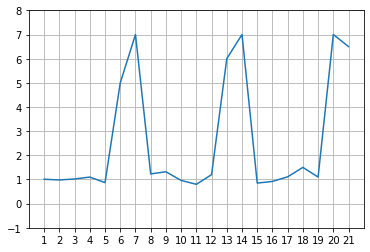

In [4]:
X = [1.01,0.98,1.02,1.1,0.87,5,7,1.23,1.32,0.96,0.80,1.2,6,7,0.85,0.92,1.11,1.5,1.1,7,6.5]
plt.plot([*range(1,len(X)+1)],X)
plt.xticks(ticks = [*range(1,len(X)+1)])
plt.ylim((-1,8))
plt.grid();

如果使用该数据绘制图像，则会看到明显的规律：这一数据是按照7天为周期波动的，每到7天的最后2天则会出现高峰，其他时间则均匀地维持在1左右。如果我们对该数据做滞后为7的差分，则会明显改变数据的分布情况。在Python中，我们可以使用DataFrame自带的Shift功能来完成差分运算：

In [5]:
lag_7_d = pd.DataFrame(X) - pd.DataFrame(X).shift(7)

In [60]:
lag_7_d.iloc[:,0].tolist()

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.21999999999999997,
 0.3400000000000001,
 -0.06000000000000005,
 -0.30000000000000004,
 0.32999999999999996,
 1.0,
 0.0,
 -0.38,
 -0.4,
 0.15000000000000013,
 0.7,
 -0.09999999999999987,
 1.0,
 -0.5]

得出的差分结果比原来的序列短了lag（7位数）。现在我们对该差分结果进行绘图，不难发现**差分结果比原始数据平稳很多**，原本每7天出现一次的高峰被削弱了，相对的数据产生了一些原本没有的波动（比如，围绕着均值0上下波动）。在统计学中，围绕着某个均值不断波动的数据，比突然出现峰值、突然出现低谷、波动幅度忽大忽小的数据更加稳定，因此虽然差分后的数据往往看起来波动的频率更高、上下波动的次数更多，但实际是比原始数据更加平稳的。

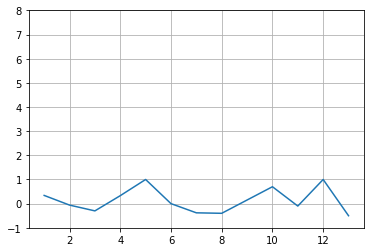

In [57]:
plt.plot([*range(1,lag_7_d.notnull().sum()[0])],lag_7_d.iloc[8:,0])
plt.ylim((-1,8))
plt.grid();

很明显，差分运算可以消除数据中激烈的波动，因此**可以消除时间序列中的季节性、周期性、节假日等影响**。一般我们使用滞后为7的差分消除星期的影响，而使用滞后为12的差分来消除月份的影响（一般这种情况下每个样本所对应的时间单位是月），我们也常常使用滞后4来尝试消除季度所带来的影响。在统计学中，**差分运算本质是一种信息提取方式，其最擅长提取的关键信息就是数据中的周期性**，和其他信息提取方式一样，它会舍弃部分信息、提炼出剩下的信息供模型使用。也因此，差分最重要的意义之一就是能够让带有周期性的数据变得平稳，在任何的统计学教材中，我们都可以找到众多的证据来证明这一点：

![](https://otexts.com/fpp2/fpp_files/figure-html/usmelec-1.png)

> **滞后运算/滞后算子/延迟算子**

滞后（lag）这一概念是差分运算中的关键概念，但事实上，独立于差分运算之外，滞后也是统计学中重要的运算形式之一。在统计学中，滞后运算是“向后移动一个单位”的运算，当用于时间序列时，它特指“向过去移动一个时间单位”的运算。大部分时候，滞后运算被简写为字母B（Backshift）或者字母L（Lag），我们可以对单一的时序样本或整个时间序列做滞后运算。举例说明，对于一个时间点上的标签值，我们可以有：

$$By_t = y_{t-1}$$

并且：

$$B(By_{t}) = B^{2}y_{t} = y_{t-2}$$

而对整个时间序列我们可以有：

$$ts = [y_{t-2},y_{t-1},y_t,y_{t+1},y_{t+2}]$$

$$B(ts) = [y_{t-3},y_{t-2},y_{t-1},y_t,y_{t+1}]$$

因此滞后运算可以被用来表现差分。其中，多步差分的表现方式很简单，一步差分是相邻的标签值之间相减，因此有：

> 1-lag difference

$$
\begin{align}
1\_lag\_y &= y_t - y_{t-1} \\
&= y_t - By_t \\
&= (1-B)y_t
\end{align}
$$

12步差分是相隔11个标签值进行相减，因此有：

> 12-lag difference

$$
\begin{align}
12\_lag\_y &= y_t - y_{t-12} \\
&= y_t - B^{12}y_t \\
&= (1-B^{12})y_t
\end{align}
$$

因此n步差分就可以表示为：
$$n\_lag\_y = (1-B^n)y_t$$

与之相对的，高阶差分也可以用滞后运算表示。假设现在有时序数据：

$$[y_{t-2},y_{t-1},y_t,y_{t+1},y_{t+2}]$$

整个序列的一阶差分为：

$$[(y_{t-1}-y_{t-2}), (y_t-y_{t-1}), (y_{t+1}-y_t), (y_{t+2}-y_{t+1})]$$

一阶差分就等同于一步差分，因此：

> first-order difference

$$
\begin{align}
y' &= y_t - y_{t-1} \\
&= y_t - By_t \\
&= (1-B)y_t
\end{align}
$$

在此基础上，二阶差分可以被表示为：

> second-order difference

$$
\begin{align}
y'' &= (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) \\
&= y_t - 2y_{t-1} + y_{t-2} \\
&= y_t - 2By_t + B^2y_t \\
&= (1 - 2B + B^2)y_t \\
&= (1-B)^2y_t
\end{align}
$$

以此类推，d阶差分可以被表示为：

$$d\_order\_y = (1-B)^dy_t$$

在该公式中的$d$也正是ARIMA模型中的超参数$d$，因此滞后运算和差分运算是紧密相连的。当我们在ARIMA模型中输入参数d=任意数字时，实际上大部分算法库会按照上面的公式直接对时序数据进行滞后运算。滞后是能够实现差分运算的、更加简单和高效的运算方法。

在实际使用中，我们经常将多步差分和高阶差分混用，最典型的就是在ARIMA模型建模之前：一般我们会先使用多步差分令数据满足ARIMA模型的基础建模条件，再在ARIMA模型中使用低阶的差分帮助模型更好地建模。例如，先对数据进行12步差分、再在模型中进行1阶差分，这样可以令数据变得平稳的同时、又提取出数据中的周期性，极大地提升模型对数据的拟合精度。

> **关于差分的两个误解**

现在我们已经了解差分运算的计算方法和作用了。在初学统计学和时间序列时，许多人会对差分运算产生两个误解：

1. 差分的阶数越高、步数越多，提炼出的信息就越精华。
> 事实上，和众多信息提取的过程一样，差分在提取信息的过程中也会产生信息的损失、甚至提炼出“噪音”。阶数越高、步数越多，差分运算丢失的原始信息就会越多，信息的“形变”也就会越厉害，因此我们需要找到合适的阶数和步数，而不是坚持使用高阶或多步差分。<br><br>
> 当阶数过高或步数过多导致数据的信息被无谓浪费时，我们称这样的情况为“**过差分**”（overdifferencing）。过差分有两个基本的信号：差分后数据的方差变得很高，或者样本之间的相关性明显被削弱。这种情况下我们要选择阶数更低、步数更少的差分。

2. 只要数据具有趋势性/周期性，我们就可以利用差分运算将其消除
> 差分运算的确可以被应用到大部分有趋势性、周期性的时间序列数据上，但它不能解决所有时序数据的问题。首先，不是所有时序模型都要求数据是无趋势性、无周期性的状态，即便模型要求了，当差分运算不管用时，我们也可以使用其他方式消除数据的周期性和趋势性。<br><br>
> 比如如果数据存在季节性，我们可以从每个观测值中减去当季所有观测点的均值，如果数据是月度数据，我们则可以让每月的观测值减去当月的均值，以此类推。如果数据随时间波动，形成类似于三角函数的波动，那我们可以让每个观测点除以周围的波动率，以消除峰值。总之，我们需要具体情况具体分析，同时积累时序数据处理的经验。

#### 3.3.4 ARIMA（中）：平稳性、ACF与PACF

- **平稳性（Stationary）**

现在我们已经知道差分运算对于时间序列数据的意义了，那为何ARIMA模型要内置差分运算、甚至将差分的阶数设置为ARIMA关键的超参数之一呢？因为差分运算带来的平稳性是ARIMA模型能够顺利运行的基本要求。具体地来说，**ARIMA模型具有如下基本假设：输入ARIMA的时间序列数据必须是平稳的（stationary）数据**。

在统计学上，平稳时间序列的定义如下：

**<center>在一段时间序列中，无论时间如何变化，该序列的标签值的统计特性，<br>如均值、方差、协方差等属性都保持不变，那这段时间序列就是平稳的。**

    
这就是说，在一段稳定的时序数据上，即便随机地取出长度不同、起点不同、终点不同的时序数据，这些数据的统计特性都会表现得完全一致。根据这一定义，**平稳数据的内在规律、统计特性等不会随时间改变，因此在平稳的数据上，过去的规律可以被推广到任意未来的时间段中去使用**，这奠定了未来时间中的标签值可以被预测的基础。

通过绘制图像，我们可以**大致辨别**数据是否满足统计学上要求的稳定性——

![](https://storage.googleapis.com/blogs-images/ciscoblogs/1/2020/03/ca46655d-stationary_nonstationary.png)

在统计学上，稳定的时序数据是始终围绕着一个均值波动，且波动的幅度变化不是很大的数据（例如，上图中红色的序列就是一个比较接近平稳序列的序列）。因此，在时间变化的同时，序列标签均值明显变化，或不同阶段的波动幅度明显有差异、不均匀的数据都是不稳定的。具体地来说，数据有明显的上升趋势，或下降趋势、数据呈现季节性、周期性、或波动幅度明显越来越大、越来越小的时候，数据都是不稳定的。

不过需要注意的是，有些图像可能展现出明显的周期性，但却是符合稳定性要求的——当图像有周期性，但周期性的表象却是由某些不可控的事件偶然导致、且我们无法预料下一个周期是否还会出现相同的周期性表现时，那数据可能是符合稳定性要求的。同时，数据中存在一些异常值，并不影响数据的稳定性。

从这个定义，你可以判断出下面的数据哪些是稳定的数据吗？

![](https://otexts.com/fpp2/fpp_files/figure-html/stationary-1.png)

很明显，图像a、c、e、f和i有明显的趋势性变化，i的方差也随着时间逐渐变大，因此可以先排除这五张图。剩下的g、h看起来有明显的周期性，因此需要调研一下这些周期性是否由巧合造成，如果这些周期性不是由巧合造成，则g和h也可以排除。图d看起来也有一定的周期性，但并不像序列g和h那样明显，因此存疑。b则基本可以被认为是平稳序列，虽然中间出现了一个异常的高峰，但排除异常值的影响，b很有可能是平稳序列。

在统计学中，我们当然不太可能靠着肉眼绘图对序列的平稳性进行判断。事实上，我们需要针对平稳与否完成假设检验。当且仅当我们可以保证数据是稳定的，我们才能将数据输入ARIMA模型进行预测。在统计学中，判断时间序列是否为平稳序列的方式有三种：

1. **绘制折线图**：绘制图像并直观地检查是否有任何明显的趋势或季节性，如果有则大概率序列是不平稳的。

2. **对时序数据进行统计并绘制直方图**：计算不同时间区间中的均值和方差、并观察这些均值和方差是否有明显差异。如果各个区间中的均值方差差异很大，则序列大概率是不平稳的。

3. **做统计检验**：比如，在时间序列上完成DF、ADF、PP等单位根检验。

在之后的课程当中，我们会使用ADF单位根检验来完成平稳性的判断，如果数据不够平稳，我们则需要使用差分运算消除数据中的各类趋势（记得在差分的课程里我们提到过，差分运算不能解决所有的问题，因此也存在着经过差分后无法变得平稳的数据。如果遇见这样的情况，我们则需要使用取对数、减均值等方法令数据变得平稳）。当我们使用差分令数据变得平稳时，我们可以使用带滞后的差分、可以使用高阶差分，直到数据通过平稳性检验后，我们才能够将数据输入ARIMA模型。

----
**思考**

你是否深度地理解了“统计特性不随时间变化”这一概念？当时序数据的分布完全不随时间变化时，我们或许可以认为**该时序的标签值与时间这一因素无关**，毕竟无论时间如何变化，时序数据的标签值的统计特性都不发生变化，这说明时间无法影响时序数据的具体值。在这一点上，ARIMA模型的假设与当代机器学习的假设一致：即时间并不是真正影响时序模型标签值的因子。这为我们后续在单变量和多变量时间序列上进行去时序化提供了一定的理论基础。

----

- **ACF与PACF**

现在你知道ARIMA模型中的三个参数：p、q、d分别是什么含义了，p和q分别控制ARIMA模型中自回归和移动平均的部分，而d则控制输入ARIMA模型的数据被执行的差分的阶数。

$$y_t = \beta_0 \ +\  \beta_1y_{t-1} \ + \ \beta_2y_{t-2} +\  ...\  \beta_py_{t-p} \ + \ \epsilon_t\  + \ \theta_1\epsilon_{t-1} \ + \ \theta_2\epsilon_{t-2} \ + \ ... \ \theta_q\epsilon_{t-q}$$

通过设置p、q、d的值，我们可以运行一些特殊的ARIMA模型，具体地来说：

|参数设置|ARIMA模型的实际情况|
|:-:|:-:|
|ARIMA(p,0,0)|ARIMA等同于自回归模型AR|
|ARIMA(0,0,q)|ARIMA等同于移动平均模型MA|
|ARIMA(0,0,0)|不建模，输出等于白噪声$\epsilon_t$<br>或等于白噪声向上或向下平移$\beta_0$个单位|
|ARIMA(0,1,0)<br>且不设置常数项$\beta_0$|在白噪声基础上进行了差分处理<br>输出的结果等同于“随机漫步”（Random Walk）|

除了这些有趣的参数组合之外，我们还可以对ARIMA模型添加参数`lag`，以控制差分运算的滞后数（多步差分的步数）。能够执行滞后的ARIMA被称为“**季节性ARIMA**”，这一类ARIMA可以同时执行多步差分和高阶差分，在令时间序列稳定的同时、利用差分运算消除时间序列数据中的周期性和季节性，以达到更好的预测效果。当然，实际的季节性ARIMA的原理比上面描述的这段话更复杂一些，但有了季节性帮助之后ARIMA模型简直如虎添翼。今天季节性的ARIMA模型已经可以处理大部分单变量时序数据，在之后的课程中我们将会来具体实现ARIMA与SARIMA模型的完整流程。

通过调控ARIMA模型中的超参数，我们可以实现不同的模型，那具体如何确定p、q、d等参数的值呢？在这里我们就需要使用自相关系数ACF（Auto-correlation function）和偏自相关系数PACF（Partial Auto-Correlation Function）了。

**自相关系数ACF**衡量当前时间点上的观测值与任意历史时间点的观测值之间的**相关性大小**，而**偏自相关系数PACF**衡量当前时间点上的观测值与任意历史时间点的观测值之间的**直接相关性的大小**。在该定义中，有几个关键的问题需要解释：

1. **什么是直接相关性？PACF和ACF有什么不同？**
> 
> 来看下面的时间序列：
> 
> $$ts = [y_{t-2}, y_{t-1},y_t]$$
> 
> 时间序列的基本原则之一是“过去影响未来”，那$y_{t-2}$的值是如何影响了$y_t$的值的呢？有多种可能：例如，$y_{t-2}$的值直接影响了$y_t$的值（比如，双11当天的销量直接冲击了双11两天后的销量），也有可能$y_{t-2}$影响了$y_{t-1}$，再由$y_{t-1}$将这种影响传递给$y_t$（比如，前天的降雨量影响了昨天的降雨量，昨天的降雨量又影响今天的降雨量），还有可能两种影响都发生了，又或许$y_{t-2}$与$y_t$之间根本没有互相影响。在这些多种的影响方式中，$y_{t-2}$直接对$y_t$产生的影响越大，$y_{t-2}$和$y_t$之间的直接相关性越强。
> 
> 当我们在计算ACF时，我们计算的是多种影响方式带来的“综合效应”，即ACF并不关心两个观测点之间是以什么方式相关，只关心两个观测点之间的相关程度。但PACF只关心“直接相关”的相关程度，并不关心两个观测点之间多种的、其他类型的可能的链接。因此，在求解PACF的时候，我们需要将“不直接”的相关性从ACF的值中“剔除”。

2. **如何定义两个时间点之间的时间差？**
> 
> 在ACF和PACF的定义中，两个时间点之间的时间差可以用滞后进行衡量。比如，我们可以计算当前时间点上的观测值$y_t$与$y_{t-1}$之间的ACF，这样的ACF是滞后为1的ACF。如果我们对一个时间序列$ts$执行滞后运算，并让滞后为1的$1\_lag\_ts$与原始序列$ts$中的元素一一对应计算ACF，就可以一次性得出整个时间序列的滞后为1的ACF。
> 
> 在实际使用这两种相关性时，我们几乎总是计算时间序列与其滞后序列之间的相关性，所以**ACF和PACF值一般都是针对某一序列、在某一程度的滞后lag下计算出来的，不同的滞后lag得出的ACF/PACF值不同**。当$ts$与其滞后序列$k\_lag\_ts$的ACF相关时，这种相关的本质其实是序列$ts$上任意时间点$t$的观测值与$(t-k)$处的观测值相关。

3. **如何理解ACF和PACF值？**
> 
> 与皮尔逊相关系数高度类似，ACF和PACF的取值范围都是[-1,1]，其中1代表两个序列完全正相关，-1代表两个序列完全负相关，0代表两个序列不相关。通常在实际使用时，我们会依赖于代码/统计工具直接帮我们计算出不同序列的ACF和PACF值并绘制图像，我们会通过图像本身的表现来进行模型的选择。如下是常见的ACF（图左）和PACF（图右）的图像：
> 
![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/2022Case/13.jpg)
> 
> ACF图和PACF图的横坐标相同，都是不同的滞后程度，而纵坐标是当前滞后程度下序列的ACF和PACF值。背景为蓝色的区域代表着95%或99%的置信区间，当ACF/PACF值在蓝色区域之外时，我们就认为当前滞后程度下的ACF/PACF是统计上显著的值，即这个滞后程度下的序列之间的相关性很大程度上是信任的、不是巧合。需要注意的是，当滞后为0时，ACF和PACF值必然为1，因为一个序列与自己始终完全相关，因此ACF和PACF图上有意义的值是从滞后为1的值开始看，有的统计工具中甚至不会画出之后为0的ACF和PACF值，需要注意。
>
> 通常来说，**ACF和PACF图有三种常见的形态：拖尾、截尾、既不拖尾也不截尾**。其中，拖尾意味着图像呈现按规律衰减、自相关性呈现逐渐减弱的状态（图左）。而截尾特指在某一个滞后程度后ACF/PACF断崖式下跌的状态（图中），例如，滞后0、滞后1对应的ACF都很高，滞后2对应的ACF却断崖式下跌，这种情况被我们称之为“1阶截尾”。特别注意，1阶截尾/n阶截尾中的“阶”是惯用说法，实际上指的是滞后1和滞后n，千万别与高阶差分中的阶混淆。既不拖尾也不截尾的状态就是图右，这种状况下的ACF和PACF图往往看不出什么规律。
>
![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/2022Case/14.jpg)
> 
> 当图像呈现规律衰减的拖尾状态时，说明此时原始序列中的样本严格遵循着“久远的历史对未来的影响更弱，更近的历史对未来的影响更强”的基本常识，像这样的时间序列一定是可以用较为简单的模型进行建模的。需要注意的是，下面的情况也都属于“规律衰减的拖尾”：
> 
![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/2022Case/15.png)
> 
>当图像呈现截尾状况的时候，一般截尾的阶数都很低（一般最多不会超过3），这说明该序列中只有非常少的日子对未来有影响。当图像不截尾时，则说明原始数据中的规律较难提取，原始数据可能是平稳序列，可能是白噪音，需要更复杂的时间序列模型来进行规律的提取。
> 
> 当然，除此之外我们还可能看到其他状态的ACF和PACF图。当ACF或PACF图呈现较强的周期性时，原始序列中大概率也存在较强的周期性（比如下图，当ACF呈现三角函数一般的波动时，原始序列中大概率具有周期性）。当ACF或PACF图呈现较强的趋势性（例如上升或下降）时，原始序列中大概率也存在较强的趋势。当然，ACF和PACF图的分布并不总是忠实地反馈原始序列的状态，在实际建模时，我们需要对原始序列也进行绘图、还需要对原始数据完成各类统计检验，才能够确定原始序列的真实性质。
>
![](https://terpconnect.umd.edu/~egurarie/teaching/Biol709/Topic3/Lecture15_TimeSeries_files/figure-html/LynxACF-1.png)

4. **如果你感兴趣的话，ACF和PACF值具体如何计算？**
> 理论上来说，ACF可以是任何能够衡量两个变量/两个序列之间相关性的相关系数，最为常见的是直接使用皮尔逊相关系数。当使用皮尔逊相关系系数时，对一个总共有$T$个样本的时间序列，原始序列与其k个滞后序列之间的自相关系数ACF的计算公式如下：
>
> $$\begin{aligned}
\hat{\rho_k} &= \frac{cov(y,y_{lag\_k})}{\sigma_y\sigma_{y_{lag\_k}}}\\ \\
& = \frac{\sum_{t=k+1}^{T}(y_t - \bar{y})(y_{t-k} - \bar{y})}{\sum_{t=1}^{T}(y_t - \bar{y})^2}
\end{aligned}$$
> 
> 其中$\bar{y}$是整个时间序列的均值，分子是两个序列的协方差，分母是两个序列的标准差相乘。不难发现，一个时间序列与其滞后序列的均值、标准差都相同，因此分母变成了标准差的平方，而分子中使用的$\bar{y}$都一致。理论上来说我们可以通过变化不同的协方差公式来求解不同的ACF，但一般在实际操作时我们都默认使用上述公式。我们可以依照上述公式计算出当前样本$y_t$与所有的样本之间的ACF，并构成如下的两个范数矩阵：
>
>$$\hat{D} = \begin{vmatrix}
1 & \hat{\rho}_1 & ... & \hat{\rho}_{k-1} \\
\hat{\rho}_1 & 1 & ... & \hat{\rho}_{k-2} \\
... & ... &   & ... \\
\hat{\rho}_{k-1} & \hat{\rho}_{k-2} & ... & 1
\end{vmatrix} , \ \  \hat{D}_k = \begin{vmatrix}
1 & \hat{\rho}_1 & ... & \hat{\rho}_{1} \\
\hat{\rho}_1 & 1 & ... & \hat{\rho}_{2} \\
... & ... &   & ... \\
\hat{\rho}_{k-1} & \hat{\rho}_{k-2} & ... & \hat{\rho}_{k}
\end{vmatrix} $$
>
> 基于以上两个矩阵，偏自相关系数可以根据以下公式求得：
> 
> $$\phi_{kk} = \frac{\hat{D}_k}{\hat{D}}$$

在实际使用ACF和PACF时，我们99%都不会遭遇需要手动计算两个自相关系数的情况，因此我们几乎不会去关心这两个系数具体是如何计算的。在我们的课程中，我们呈现这两个公式以便大家在未来的学习中查证，但并不呈现复杂的数学过程。更多详细的内容可以参考王燕老师编著的《应用时间序列分析》一书。

#### 3.3.5 ARIMA（下）：时序模型的选择与评估

- **超参数p、q、d的确定**

现在我们认识了差分、ACF、PACF这些工具，我们可以开始确定ARIMA模型的超参数了。**首先来看p和q**。在许多统计学教材和网络博客上，流传着“PACF决定p值、ACF决定q值”的经典结论，但事实上这是非常不严谨、并且有严重误导性的一句话。对ARIMA模型来说，确定p和q的值有两层含义：

1）确定要使用的具体模型是AR，MA还是ARIMA？（即，p和q中任意一个值为0吗？）

2）如果是AR模型，p的值是多少？如果是MA模型，q的值是多少？如果是ARIMA模型，p和q分别是多少？

|参数设置|ARIMA模型的实际情况|
|:-:|:-:|
|ARIMA(p,0,0)|ARIMA等同于自回归模型AR|
|ARIMA(0,0,q)|ARIMA等同于移动平均模型MA|
|ARIMA(p,0,q)|ARIMA模型|

在统计学中，我们首先要绘制ACF和PACF图像来回答第一个问题。对任意时间序列，**当ACF图像呈现拖尾、且PACF图像呈现截尾状态时，当前时间序列适用AR模型，且PACF截尾的滞后阶数就是超参数p的理想值**（如下图所示，p=1）。

<center><img src="http://i.imgur.com/8OUtZhK.png" width="600" height="400">

$$y_t = \beta_0 \ +\  \beta_1y_{t-1} \ + \ \beta_2y_{t-2} +\  ...\  \beta_py_{t-p} \ + \ \epsilon_t\$$ 
<center>（对AR模型，ACF的值对应了$y_{t-1}$对$y_t$的影响，PACF的显著性对应了$\beta$的显著性）

对任意时间序列，**当PACF图像呈现拖尾、且ACF图像呈现截尾状态时，当前时间序列适用MA模型，且ACF截尾的滞后阶数就是超参数q的理想值**（如下图所示，q=1）。

<center><img src="http://nmmarcelnv.pythonanywhere.com/static/epilearn/img/acf_pacf_plot.png" width="600" height="400">

$$y_t = \beta_0 \ + \epsilon_t\  + \ \theta_1\epsilon_{t-1} \ + \ \theta_2\epsilon_{t-2} \ + \ ... \ \theta_q\epsilon_{t-q}$$
<center>（对MA模型，ACF的显著性对应了$\theta$的显著性，PACF的值对应了$\epsilon_{t-1}$对$\epsilon_t$的影响）

对任意时间序列，**当ACF图像和PACF图像都呈现不呈现拖尾状态时，无论图像是否截尾，时间序列都适用于ARIMA模型，且此时ACF和PACF图像无法帮助我们确定p和q的具体值，但能确认p和q一定都不为0**。

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/2022Case/13.jpg)

在统计学教材《应用时间序列分析》（王燕编著 第六版）的**第三章 ARMA模型性质**部分，我们可以看到支持以上结论的完整数学证明。因此在许多网络博客、甚至部分统计学教材中“PACF决定p值，ACF决定q值”的结论并非统计经验，而是由严谨的数学证明支撑的。但“PACF决定p值，ACF决定q值”这一结论也并不严谨，完整的说明应当是**当确定使用AR模型时，我们用PACF决定p值。当确定使用MA模型时，我们用ACF决定q值。当确定使用ARIMA模型时，ACF和PACF是失效的，并无作用**。

那现在的问题是，当确定要使用ARIMA模型时，我们应当如何决定p和q的值呢？虽然现在统计学领域有许多理论来帮助p和q定阶，但目前实践中最好的方法依然是**傻瓜式尝试**。在ARIMA模型当中，p和q的值往往取值不高，一般是[1,5]以内的正整数，因此实践中更常用的方法是从最小值p=1、q=1的方式开始进行尝试，不断改变p和q的取值，直到模型通过检验或达到我们需要的精度要求。

**一旦确定模型是ARIMA之后，还需要确定参数d的取值**。很显然，如果ACF或PACF图像已经告诉我们模型是MA或AR，那就没有必要研究参数d的选择问题了。在统计学中并没有严谨的方法论告诉我们应该如何选择参数d，但在数据被输入ARIMA之前、该数据应该已经经过了多步差分、满足了平稳性条件。因此ARIMA模型中的d是锦上添花、可以帮助我们使用复合的差分运算来提升模型精度，但不是绝对的必须项。因此d可以为0，在不为0的时候，d也是1、2、3这样较小的阶数。

在选择参数d时，我们往往从1、2、3阶中选择**方差最小、差分后数据噪音程度较低的阶数**，尽量避免过差分。我们也可以对进行差分后的数据绘制ACF图像，如果滞后为1时ACF为负数（如下图），那大概率说明此时的高阶差分会导致过差分。

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/2022Case/12.jpg)

最后，我们来看实践中容易出现的几个问题：

1. 是否会出现ACF和PACF都拖尾、不截尾的情况？
> 几乎不会出现，如果是这样的情况，可以尝试先保证时间序列平稳后再绘制ACF和PACF。

2. 如果ACF或PACF拖尾，但另一个指标不截尾（比如，没有任何滞后对应的值显著），无法选择p或q的值怎么办？
> 同样的，尝试令序列平稳后再绘制ACF和PACF。如果依然出现相同的情况，考虑使用[1,3]之间的正整数进行尝试。如果尝试失败，则考虑直接升级为ARIMA模型。

3. 如果ACF或PACF中出现多个显著的值，如何选择截断处？
> 这种情况下往往选择第一个截断处作为p或q的值，当然你也可以尝试其他显著的点，但一般来说都是第一个截断处效果最好。
> ![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/2022Case/13.jpg)

到这里，我相信你已经完全理解如何选择ARIMA模型的超参数了。在统计学当中，我们会使用各种各样的检验来帮助我们不断地验证超参数的效果，在机器学习当中，我们则选择观察评估指标来检验超参数的效果。ARIMA模型讲解的最后一节，我们来看看时间序列模型的常见评估指标：

- **时间序列的评估指标**

大部分时候，我们可以使用回归模型的评估指标来评估时序模型（例如，MSE或MAE），但在对时序模型进行选择时，我们往往使用统计学中常见的模型质量评估指标赤池信息准则（Akaike Information Criterion，AIC）、贝叶斯信息准则（Bayesian Information Criterion，BIC）、汉南-奎因信息准则（Hannan–Quinn information criterion，HQIC）等。这些“信息准则”可以被用于衡量时间序列模型的优秀程度，其中最常用的AIC的计算公式如下：

$$AIC = -2ln(L) + 2k$$

$L$可以被认为是当前模型的积极性评估指标（即模型越好、该评估指标越高），大部分情况下我们使用的是统计学模型的极大似然估计结果（MLE，Maximum Likelihood Estimation），$k$则代表该模型中需要被估计的参数量，而$ln$的底数为自然底数$e$。

极大似然估计是不同于最小二乘的另一类参数估计方式，最小二乘法的目标是找出令损失函数最小的参数群，而极大似然估计的目标是找出最能描述当前数据的概率分布的参数群。需要注意的是，在过去的课程中我们未曾讲解过极大似然估计用于回归任务的情况，因此你可能会误解说极大似然估计只能用于分类（例如，逻辑回归算法），但事实上，在用于分类任务时我们追求的是单点的极大概率，在用于回归任务时我们追求的是极大的概率分布。

在分类任务中，我们对极大似然估计的结果$L$取**负对数**来做损失，从而得到著名的二分类损失函数logloss。在时间序列中，我们也对极大似然估计的结果$L$取**负对数**，以此来得到越小越好的AIC。

<center><img src="https://www.varsitytutors.com/assets/vt-hotmath-legacy/hotmath_help/topics/logarithmic-functions/natural-log.gif" width="200" height="200">

不难发现，当$L$越大时ln(L)越大，因此$-2ln(L)$就会越小。而对任意模型而言，参数量越少则代表模型越优越，因此**当前模型质量越高、效率越高，AIC越小**。在实际使用中，我们往往使用AIC判断多个模型中的哪一个最有可能成为给定数据的最佳模型，因此AIC要在有比较的情况下才能使用，当然这种比较可以是不同的模型、也可以是相同的模型、但不同超参数设置下的比较。

AIC最常用于那些传统机器学习算法无法灵活使用的领域（例如，超小型数据集或时间序列），对时间序列，AIC能够轻松地在测试集上测试模型性能。在统计学当中，对时序模型，我们几乎会100%地使用AIC作为模型选择时依赖的指标。

BIC与AIC非常相似，它对模型参数量的惩罚高于AIC，因此BIC也是越低越好，经常和AIC一起组合使用。HQIC平时使用不多，但同样作为越低越好的指标，当模型的AIC和BIC高度相似时，我们可能会对比HQIC的值来评估模型。
    
需要注意的是，时间序列模型的评估指标和机器学习模型的评估指标类似，**它们只能反馈当前模型的精度，无法反馈模型的泛化能力**。因此在许多统计学库、机器学习库中，我们可能追求最小的AIC，但同时也需要时序交叉验证的帮助来证明模型的泛化能力。如果数据量很小，无法完成交叉验证，那当前模型的整体泛化能力可能是值得怀疑的。但相反，如果一个模型在AIC很低的同时，还能够通过统计学中各种复杂的检验，那模型的泛化能力是可以被认可的。

#### 3.3.6 基于统计学库statsmodel实现时序预测

作为成熟的统计学模型，ARIMA可以被各种软件以各种方式实现，最为典型的就是SPSS以及R语言下的autoarima。在Python的众多库中，我们最常使用、也是最优先使用的一般是statsmodel库。statsmodels是Python中不多见的、专用于统计模型估计、统计测试和统计数据探索的库。在statsmodel中，每个检验、每个模型都会返回一个类似于SPSS结果的统计列表，非常适合作为Python语言下首选的统计学库。现在我们就使用一个简单的数据，来实现statsmodel下的ARIMA和SARIMA模型。

在开始建模之前，我们需要简单梳理一下ARIMA模型在统计学上的三大基本假设。ARIMA模型假设：

1. **时间序列具有平稳性（stationary）**，即标签值的变化规律不随时间而改变，这是从过去的时间中习得的规律可以被用于未来的基本条件。这一条件保障了当前数据中有超越时间的“客观规律”可以被提取。

2. **样本与样本之间具有相关性**，即历史结果可以影响未来、与未来的结果相关，这一假设保障了使用过去预测未来是可能的。

3. **ARIMA模型的预测标签$\hat{y}$与真实标签$y$之间的残差$\boldsymbol{r}$等同于白噪声（White Noise）**。在时间序列最严格的定义中，白噪声序列是均值为0、方差为特定$\sigma^2$、服从正态分布、且样本与样本之间相互独立的随机序列。这样的序列是完全无序的、无法被捕捉的。当预测值与真实值之间的差异是无法捕捉的随机序列，这说明ARIMA模型已经将能够捕捉的规律全部捕捉到了。

需要注意的是，MA模型求解过程中不断估计出的$[\epsilon_t,\epsilon_{t-1},..., \epsilon_{t-k}]$也是残差，但**建模过程中估计出的残差与建模结束后才计算的残差序列$\boldsymbol{r}$在具体数值上有巨大的差别**。序列$\boldsymbol{r}$是在ARIMA模型训练完毕后才结合真实标签计算出来的，因此相当于使用了最后、最新的、迭代完毕的$\beta$、$\theta$、$\epsilon$值，而MA模型中的$[\epsilon_t,\epsilon_{t-1}, ..., \epsilon_{t-k}]$是一系列中间变量，在模型迭代过程中会不断发生变化。注意不要混淆两个残差序列。

为了满足上述三个条件，我们需要在ARIMA建模之前完成平稳性检验、样本的相关性检验，并在ARIMA建模完成之后完成一系列验证白噪声的混成检验，不过有时候我们会省略样本相关性检验，因为我们将在ARIMA建模过程中使用ACF和PACF辅助判断ARIMA模型的参数，如果样本与样本之间缺乏相关性，我们在绘制ACF和PACF时就能够发觉这一点。

通常来说，完成一个完整的ARIMA建模过程需要下面的7个步骤：

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/2022Case/08.1.png)

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df=pd.read_csv(r'D:\pythonwork\2022DACase\UserRetentionPrediction\data\perrin-freres-monthly-champagne.csv')

In [27]:
df.head() #香槟销售额随时间变化的数据

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


- 简单数据探索与清洗

In [30]:
df["Month"].dtype

dtype('O')

In [31]:
df.iloc[:,-1].dtype

dtype('float64')

In [34]:
#确定列名，检验缺失值、填补/删除缺失值等等
df.columns=["Month","Sales"]
df.drop(106,axis=0,inplace=True)
df.drop(105,axis=0,inplace=True)

#转化时间字符串为DataTime格式
df['Month']=pd.to_datetime(df['Month'])

#将时间设置为索引
df.set_index('Month',inplace=True)

In [35]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


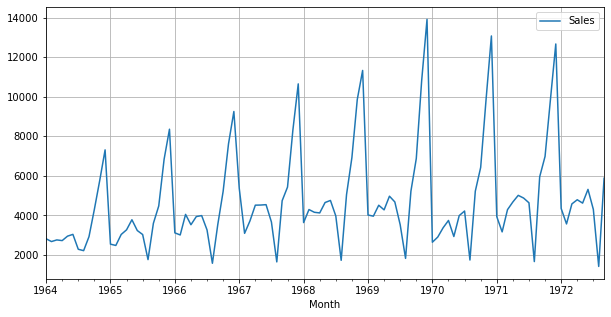

In [36]:
#可视化
df.plot(figsize=(10,5),grid=True);

很明显，数据具有周期性，因此数据大概率是无法满足平稳性条件的。具体地来说，每年年末会出现一个峰值、一个谷底，峰值出现在每年的第四季度（这可能是受到圣诞节的影响），谷底出现在每年的第三季度，其他时间的销售额相对均匀。从图像来看，该数据不仅整体均值呈现微微上升的趋势，数据的方差变化也较大，接下来我们可以在平稳性检验上验证我们的猜测。

- 假设检验：平稳性检验

在使用统计学模型进行建模时，我们往往需要完成一系列假设检验的工作。对ARIMA模型而言，我们必须要完成的建模前检验主要是**平稳性检验**。对ARIMA模型来说，如果数据是不平稳的、比如带有持续上升或下降的趋势、或者数据在不同时间阶段的波动程度明显不同，那我们则需要对数据进行差分处理直到数据平稳为止。

在这里我们将要使用的是Augmented Dickey-Fuller单位根检验。在概率论与数理统计当中，单位根（unit root）是趋势性的象征。如果一个序列中存在单位根，那该序列应该有较强的趋势性，在这样的序列上建模的难度会很大、模型也很容易失效，因此单位根检验能够帮助我们判断“趋势”这一因素在多大程度上影响了一个时间序列的值。如果在检验中我们发现单位根存在，则说明该时间序列受到“趋势”影响很大。

在这个检验中，两项假设如下：

- **原假设H0**：数据是不平稳序列。如果该假设没有被拒绝，则表示时间序列里有单位根，意味着它是不平稳的，它很大程度上受到“趋势性”的影响。
- **备择假设H1**：数据是平稳的。如果拒绝原假设，则说明该时间序列没有单位根，则数据是平稳的，它基本不受“趋势性”的影响。

在测试中，我们使用测试的p值来解释这个结果：

- **p>0.05**：无法拒绝原假设，数据有单位根且不平稳。
- **p<=0.05**：拒绝原假设，数据没有单位根，是平稳的序列。

In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
result=adfuller(df["Sales"]) #这就可以完成一次检验

In [41]:
result #直接返回一系列结果

(-1.8335930563276195,
 0.3639157716602467,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

以上返回的结果分别是检验值、p值、使用的滞后数、使用的样本数、在1%、5%、10%显著性水平上的检验值、以及当前数据上使用ARIMA时可能的AIC值。在这些值当中，我们最为关心前2项数值，因此我们可以将前2项打包到函数中，并让函数直接输出检验的结果：

In [42]:
def adfuller_test(sales):
    #将唯一的标签：销售额放入检验
    result=adfuller(sales)
    
    #让statsmodel的DF单位根检验为我们返回检验值 & p值 & 添加了多少滞后 & 使用的样本量
    labels = ['ADF Test Statistic','p-value']
    
    #打包标签和结果
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    #如果p值小于等于0.05，则说明我们可以拒绝原假设，认为数据是平稳的。如果p值大于0.05，则说明我们需要接受原假设，数据不平稳。
    if result[1] <= 0.05:
        print("拒绝原假设，数据具有平稳性")
    else:
        print("无法拒绝原假设，数据不平稳")
        
    return result[1]

In [43]:
pvalue = adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276195
p-value : 0.3639157716602467
无法拒绝原假设，数据不平稳


In [44]:
pvalue

0.3639157716602467

ADF检验值的绝对值越大（即离0越远），我们越有可能拒绝原假设，现在的-1.8并不是一个足够大的数，因此大概率我们无法拒绝原假设。同时看p值，当p值大于0.05时，我们无法拒绝原假设。因此数据不平稳，我们需要做差分处理。

- 差分处理

很明显，现在数据并不平稳，因此我们需要完成差分处理来让数据变得平稳。复习一下，差分运算是一种独特的数学运算，对于任意函数$f(x)$，差分被定义为$f(x+1) - f(x)$。即，自变量移动1个单位，函数值变化的量就是函数的差分。具体地来说，一个函数上不同自变量对应的差分可能不同，因此一般我们称$\Delta y = f(x_0+1) - f(x_0)$为函数$f(x)$在自变量点$x_0$的一阶差分。很明显，差分的结果反映了离散量之间的一种变化，对于时间序列来说，差分的结果反应的是两个时间点之间标签产生的变化。

尽管ARIMA模型中自带令数据平稳的参数$d$，但大部分时候我们还是会优先考虑让模型先通过单位根检验、之后再让数据进入ARIMA模型。

In [45]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [46]:
#使用shift函数构造差分，shift(1)函数相当于滞后1（1步差分）
df['Sales'] - df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    -143.0
1964-03-01      83.0
1964-04-01     -34.0
1964-05-01     225.0
               ...  
1972-05-01    -170.0
1972-06-01     694.0
1972-07-01   -1014.0
1972-08-01   -2885.0
1972-09-01    4464.0
Name: Sales, Length: 105, dtype: float64

In [47]:
df["Sales"].diff().dropna() #一阶差分可以直接通过diff()命令完成

Month
1964-02-01    -143.0
1964-03-01      83.0
1964-04-01     -34.0
1964-05-01     225.0
1964-06-01      90.0
               ...  
1972-05-01    -170.0
1972-06-01     694.0
1972-07-01   -1014.0
1972-08-01   -2885.0
1972-09-01    4464.0
Name: Sales, Length: 104, dtype: float64

In [48]:
#注意区分2阶差分和2步差分
#2步差分
df['Sales'] - df['Sales'].shift(2)

Month
1964-01-01       NaN
1964-02-01       NaN
1964-03-01     -60.0
1964-04-01      49.0
1964-05-01     191.0
               ...  
1972-05-01      41.0
1972-06-01     524.0
1972-07-01    -320.0
1972-08-01   -3899.0
1972-09-01    1579.0
Name: Sales, Length: 105, dtype: float64

In [49]:
#2阶差分
df["Sales"].diff().diff().dropna()

Month
1964-03-01     226.0
1964-04-01    -117.0
1964-05-01     259.0
1964-06-01    -135.0
1964-07-01    -844.0
               ...  
1972-05-01    -381.0
1972-06-01     864.0
1972-07-01   -1708.0
1972-08-01   -1871.0
1972-09-01    7349.0
Name: Sales, Length: 103, dtype: float64

In [50]:
#可以通过循环，查看究竟多少步差分能够让这一序列满足单位根检验
#如果许多差分都能够满足单位根检验，我们通常选择ADF值最小、或差分后数据方差最小的步数

columns = ["D1","D2","D3","D4","D5","D6","D7","D8","D9","D10","D11","D12","D24","D36"]
pvalues = []
stds = []

for idx,degree in enumerate([*range(1,13),24,36]):
    #打印差分的步数
    print("{}步差分".format(degree))
    
    #计算差分列
    df[columns[idx]] = df["Sales"] - df["Sales"].shift(idx+1)
    
    #进行ADF检验，提取P值，并计算差分列的标准差
    pvalue = adfuller_test(df[columns[idx]].dropna())
    std_ = df[columns[idx]].std()
    
    #保存P值和标准差
    pvalues.append(pvalue)
    stds.append(std_)
    
    #对结果进行打印
    print("差分后数据的标准差为{}".format(std_))
    print("\n")

1步差分
ADF Test Statistic : -7.189896448051006
p-value : 2.51962044738698e-10
拒绝原假设，数据具有平稳性
差分后数据的标准差为2650.968186669989


2步差分
ADF Test Statistic : -7.135995302286716
p-value : 3.4199891594729983e-10
拒绝原假设，数据具有平稳性
差分后数据的标准差为3567.6351723537286


3步差分
ADF Test Statistic : -7.285630595925722
p-value : 1.4614244887641837e-10
拒绝原假设，数据具有平稳性
差分后数据的标准差为3927.279876517501


4步差分
ADF Test Statistic : -7.253149049898573
p-value : 1.758579949850846e-10
拒绝原假设，数据具有平稳性
差分后数据的标准差为4090.0957191830116


5步差分
ADF Test Statistic : -2.8571173948549804
p-value : 0.050566743535901404
无法拒绝原假设，数据不平稳
差分后数据的标准差为3703.1920631348094


6步差分
ADF Test Statistic : -7.278597607548264
p-value : 1.5212208957659128e-10
拒绝原假设，数据具有平稳性
差分后数据的标准差为3540.5571256000353


7步差分
ADF Test Statistic : -1.74747216860766
p-value : 0.40683412640557615
无法拒绝原假设，数据不平稳
差分后数据的标准差为3726.756506409909


8步差分
ADF Test Statistic : -2.0559478573458687
p-value : 0.26259291600017703
无法拒绝原假设，数据不平稳
差分后数据的标准差为4203.561065940937


9步差分
ADF Test Statistic : -1.6

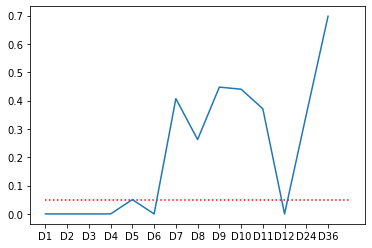

In [18]:
#哪些步数下数据是平稳的？
plt.plot(columns,pvalues)
plt.hlines(0.05,0,14,colors="red",linestyles="dotted");

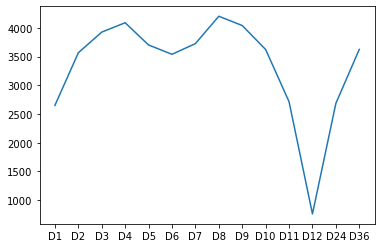

In [19]:
#最小的标准差对应的步数是？
plt.plot(columns,stds);

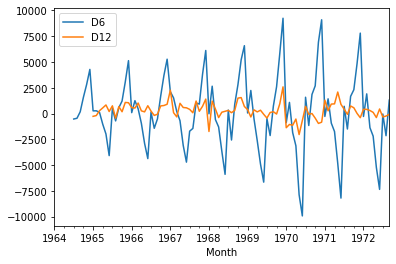

In [52]:
df[['D6',"D12"]].plot();

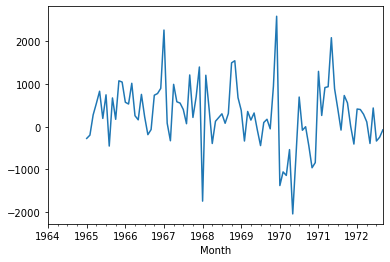

In [21]:
df['D12'].plot();

因此12步差分是最优的差分选择，现在我们就按照12步差分后的结果进行建模。

- 绘制ACF与PACF图像，完成模型选择

In [66]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

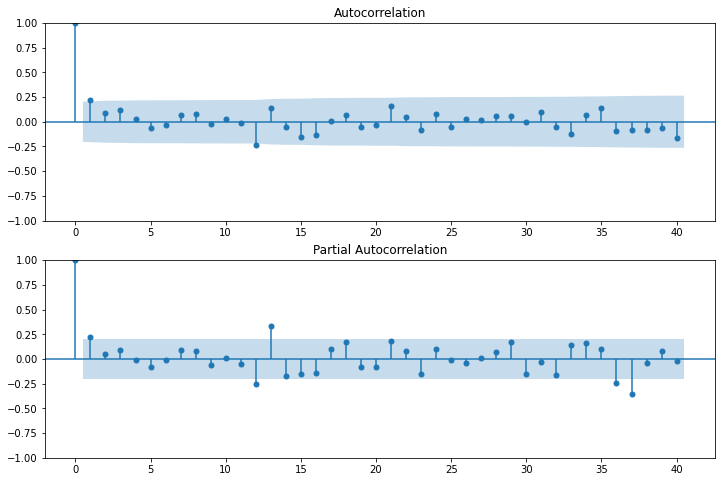

In [68]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['D12'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['D12'].dropna(),lags=40,ax=ax2)

观察ACF和PACF的状态，很明显，两个自相关系数都没有呈现拖尾的情况、而是更加随机地排列，因此p和q都不为0，此时我们需要的至少是一个ARIMA(p,d,q)模型。

在确定p和q都不为0后，我们需要先确定合适的d值、再建模寻找合适的p和q。根据之前我们讲解的理论，我们一般会尝试[0,1,2,3]阶差分，并取这些差分当中不存在过差分问题的、方差较小、噪音较少的阶数作为d的取值。当我们对数据的ACF绘图时，如果滞后为1的ACF为负，就说明数据存在过差分问题。依据这些理论，我们来打印4个不同阶差分的标准差和ACF图像：

0阶差分的标准差为2553.5026011831437
1阶差分的标准差为2650.968186669989
2阶差分的标准差为3907.4512785194675
3阶差分的标准差为6577.656456299289


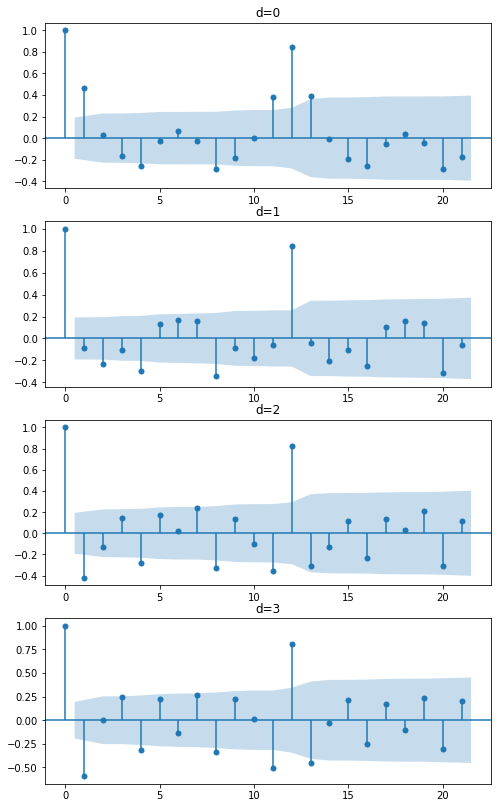

In [24]:
from statsmodels.graphics.tsaplots import plot_acf

diff = [df["Sales"],df["Sales"].diff().dropna()
        ,df["Sales"].diff().diff().dropna()
        ,df["Sales"].diff().diff().diff().dropna()
       ]

titles = ["d=0","d=1","d=2","d=3"]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(8,14))

for idx, ts, fig, title in zip(range(4),diff,[ax1,ax2,ax3,ax4],titles):
    print("{}阶差分的标准差为{}".format(idx,ts.std()))
    plot_acf(ts, ax=fig, title=title)

很明显，除了原始数据，其他阶差分都出现了“过差分”的情况（滞后为1的ACF值为负），且原始数据的标准差小于任何差分数据，因此我们可以判断对ARIMA模型而言最佳的d取值为0。

在这里，除了ARIMA(p,d,q)之外，我们还可以考虑使用SARIMA(p,d,q,s)模型。SARIMA是季节性ARIMA模型，非常擅长处理周期性数据，它的前三个超参数含义与ARIMA完全相同，而最后一个超参数s则代表差分的步数，这说明SARIMA模型可以同时完成多步差分和高阶差分两个任务，相比之下ARIMA模型只能做高阶差分。

在之前的平稳性检验中，我们已经知道当前时间序列具有较强的周期性、且能够让序列变得平稳的最佳选择是12步差分，因此**自带多步差分功能、且擅长处理周期性数据的SARIMA模型**可能是更好的选择。SARIMA模型规定，当原始序列明显周期性明显时，d的值至少是1，因此我们可以暂时将SARIMA模型的d值确认为1。

- 建立ARIMA和SARIMA模型

In [70]:
import statsmodels
print(statsmodels.__version__)

0.13.5


In [71]:
from statsmodels.tsa.arima.model import ARIMA
#在0.12及以上版本的statsmodel中，ARIMA一个类可以实现AR、MA、ARMA、ARIMA和SARIMA模型
from pandas.tseries.offsets import DateOffset
#statsmodel库正处于更新期，因此会出现各种各样奇奇怪怪的警告……
import warnings
warnings.filterwarnings("ignore")

In [72]:
df.head()

,Sales,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D24,D36,arima
1964-01-01,2815.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-03-01,2755.0,83.0,-60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-04-01,2721.0,-34.0,49.0,-94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-05-01,2946.0,225.0,191.0,274.0,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


建模之前，我们需要先将时间序列的索引转换为pandas规定的DataTime索引。DataTime索引可以帮助时序模型理解每个样本代表的是一个月、一分钟、还是一天，时间序列模型因此得知当前时间序列的“频率”。在0.12及以上版本的statsmodels库中，如果不使用DataTime索引，模型会疯狂报警告。

In [73]:
df.index.inferred_freq #当前时序数据的频率为月份

'MS'

In [74]:
df.index = pd.DatetimeIndex(df.index.values,
                            freq=df.index.inferred_freq)

由于数据具有较强的周期性，因此我们考虑同时建立d=0的ARIMA和d=1的SARIMA模型。

> 先建一个模型试试看

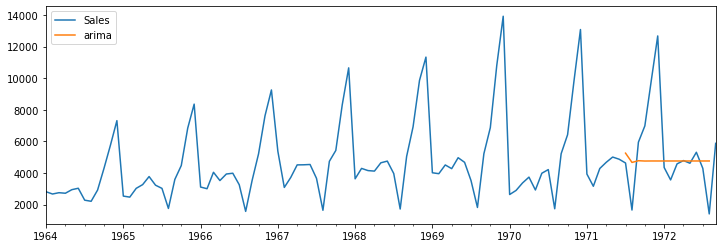

In [75]:
#对每个备选模型，我们进行训练、打印训练结果，并绘制预测图像
arima_0=ARIMA(endog = df['Sales'],order=(1,0,1))
arima_0=arima_0.fit()
df['arima']=arima_0.predict(start=90,end=103,dynamic=True)
df[['Sales','arima']].plot(figsize=(12,4));

从预测出的图像我们大概可以看出当前参数组合是否足够优秀（很明显现在的模型在预测上没有任何作用），当预测的图像不合格时我们可以直接更换参数，当预测的图像看起来相对合理时我们可以打印当前模型的更多详情进行查看。

In [76]:
print(arima_0.summary(alpha=0.05))
#alpha - 人为规定的显著性水平，一般都使用0.05或者0.01

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -955.880
Date:                Mon, 07 Nov 2022   AIC                           1919.760
Time:                        00:38:08   BIC                           1930.375
Sample:                    01-01-1964   HQIC                          1924.061
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4761.1524    437.563     10.881      0.000    3903.544    5618.760
ar.L1         -0.1845      0.130     -1.420      0.156      -0.439       0.070
ma.L1          0.7883      0.107      7.382      0.0

summary表单概括了statsmodel中的ARIMA类帮助我们完成的所有任务，包括在建模流程中的5、6两步：即使用评估指标评估最佳模型，并完成针对残差的混成检验，接下来我们来看看summary表单中的具体内容。

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/2022Case/08.1.png)

> **解读summary**

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/2022Case/17.jpg)

summary方法返回的第一部分是当前模型最基本的信息和最基本的评估指标。如上图所示，训练的基本信息（浅黄色部分）包括了当前建立的ARIMA模型、建模时间、样本数量等等信息，这一部分是我们在建模后几乎不会去阅读的内容，除非我们对当前模型训练的时间段有特殊的要求。同样我们一般不会去关注的还有协方差的计算类型（粉色部分），在statsmodels中存在6种以上不同的协方差计算方法，默认的方法是opg（即等同于皮尔逊相关系数中的协方差计算方法），我们大概率不会干涉这个选项。

值得注意的是模型评估指标部分，这里列出的四个指标分别是**对数似然估计、AIC、BIC和HQIC**四个评估指标，其中对数似然估计Log Likehood是越大越好，而其他三个指标AIC、BIC和HQIC是越小越好。通常来说我们会直接关注AIC的指标，优先选出AIC最低的模型进行进一步的研究和观察。

----

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/2022Case/18.3.jpg)

summary方法返回的第二部分是整张表单中最为重要的部分，**这一部分展示了训练好的ARIMA模型中每一个具体的项的值、以及这些项的显著性水平**，结合这张表单中的内容和我们建立的ARIMA模型时设置的p、d、q值，我们可以写出当前ARIMA模型的具体公式。

以现在的ARIMA(1,0,1)为例，当前ARIMA由MA(1)和RA(1)共同构成，因此公式如下：

$$y_{(1,0,1)} = \beta_0 \ +\  \beta_1y_{t-1} + \epsilon_t \  + \ \theta_1\epsilon_{t-1}$$

在这个公式中，常数$\beta_0$就对应着表格左侧第一项`constant`（英文直译：常数），AR模型的唯一项$\beta_1y_{t-1}$就对应着`ar.L1`，MA模型的唯一项$\theta_1\epsilon_{t-1}$就对应着`ma.L1`。如此不难发现，`ar.L1`中的L1指的是滞后1，表示值带有滞后1这一项的AR模型，`ma.L1`同理。你可以看到，该表格中左侧的项是与ARIMA的项一一对应的，因此当我们设置的p、d、q值不同时，该表格中反馈的项也会不一样。

在此基础上，该表格中值得关注的列有：
> **coef**：该项的系数，比如`ar.L1`的coef就是$\beta_1$的取值，`ma.L1`的coef就是$\theta_1$的取值。当该项是常数项时，coef就等于该项本身。<br><br>
> **std err**：当前项的标准误，衡量当前项对整个ARIMA模型的预测损失的影响。一个项的std err越大，说明这个项对当前模型的损失贡献越大，进一步说明模型对这个项的参数估计可能越不准确。比如上面的表格中，很明显对损失贡献非常巨大的是$\epsilon_t$，说明模型当前给出的$5.046*e^6$这个值带来了巨大的损失，模型在拟合当前项的时候遭遇了巨大的困难。<br><br>
> $\boldsymbol{P>|z|}$：该项的系数在统计学上是否显著的p值。在这里我们完成的是针对每一个系数的**单变量检验**。<br><br>单变量检验的原假设（H0）：当前系数coef为0（当前项与标签不相关）<br>单变量检验的备择假设（H1）：当前系数coef不为0（当前项与标签相关）<br><br>很明显，对模型来说理想的状态是拒绝原假设、接受备择假设，因此在我们规定的显著性水平$\alpha$（0.05）下，如果有任意项的p值大于$\alpha$，则说明当前项的系数没能通过显著性检验，模型对当前项的系数没有足够的信心。例如，在当前表格中，`ar.L1`的p值为0.156，大于显著性水平0.05，则说明系数-0.1845很可能是不可靠的、无法使用。<br><br>在一个模型当中，如果很多系数的p值都大于0.05，则可能说明模型处于复杂度过高的状态（即，许多项看起来都与标签无关，所以我们可能创造了许多原本不需要的项）。此时我们可以选择更简单的模型。

在读表格的这一部分的时候，我们首先会观察p值，确定是否有任何项的p值大于我们设置的显著性水平$\alpha$。如果存在这样的项，那我们大概率就不会关注当前的模型了。在ARIMA模型选择过程中，我们选出的模型应当是所有项的p值都小于显著性水平的模型。

P.S. 你是否注意到了表格左侧最后一项sigma2？它和ARIMA公式的系数被写在一起，但实际却是$\epsilon_t$的方差$\sigma^2$。在MA模型中，$\epsilon_t$应当是均值稳定的白噪音，因此statsmodel在这里对$\epsilon_t$的方差做了检验、以检验$\epsilon_t$是否是方差稳定、满足正态分布的白噪音。在现实中，这个检验非常非常难通过，我们几乎在所有的arima模型的summary表单中，都会看到sigma2对应的p值是小于0.05或0.01的。因此大部分时候我们会忽略这个项。

----

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/2022Case/19.jpg)

当模型的图像看起来合理、AIC值较小、且summary第二部分的p值没有任何大于0.05的项目时，我们才会看summary表单的最后一部分。Summary表单的第三部分是针对残差完成的各项假设检验。在混成检验的定义中，**残差是真实标签与当前ARIMA的预测标签之间的差异**，即：

$$\boldsymbol{r} = \boldsymbol{y} - \boldsymbol{\hat{y}}$$

需要注意的是，MA模型求解过程中不断估计出的$[\epsilon_t,\epsilon_{t-1},..., \epsilon_{t-k}]$也是残差，但**建模过程中估计出的残差与建模结束后才计算的残差序列$\boldsymbol{r}$在具体数值上有巨大的差别**。序列$\boldsymbol{r}$是在ARIMA模型训练完毕后才结合真实标签计算出来的，因此相当于使用了最后、最新的、迭代完毕的$\beta$、$\theta$、$\epsilon$值，而MA模型中的$[\epsilon_t,\epsilon_{t-1}, ..., \epsilon_{t-k}]$是一系列中间变量，在模型迭代过程中会不断发生变化。注意不要混淆两个残差序列。

In [77]:
#对已经建好的模型，我们可以使用如下的属性调出该模型的残差r
arima_0.resid

1964-01-01   -1946.152444
1964-02-01   -1334.461564
1964-03-01   -1492.756776
1964-04-01   -1331.169605
1964-05-01   -1193.671956
                 ...     
1972-05-01    -790.077042
1972-06-01    1147.266451
1972-07-01   -1265.917337
1972-08-01   -2435.669426
1972-09-01    2418.085584
Freq: MS, Length: 105, dtype: float64

在之前讲解ARIMA模型建模流程时我们提到，当预测值与真实值之间的差异是无法捕捉的、完全无规律的随机数，就说明ARIMA模型已经将能够捕捉的规律全部捕捉到了，因此我们希望残差序列$r$是白噪声序列。在时间序列最严格的定义中，**白噪声序列是均值为0、方差为特定$\sigma^2$、服从正态分布、且样本与样本之间相互独立的随机序列**，因此针对残差序列$r$，statsmodel中的ARIMA自动完成以下三项检验：
- **Ljung-Box test**
> Ljung的发音是"杨"，一般在中文环境中我们称该检验为LBQ检验。**LBQ检验是检查样本之间是否存在自相关性的检验**。<br><br>LBQ检验原假设(H0)：样本之间是相互独立的<br>LBQ检验备择假设(H1)：样本之间不是相互独立的，存在一些内在联系<br><br>如果残差序列是白噪声，那残差序列的样本之间应当是独立的，因此我们想要的是无法拒绝原假设的结果。故而，在查看LBQ测试的p值时，我们希望这是一个大于显著性水平（0.05）、令我们接受原假设的p值。总结一下，**LBQ下的Prob(Q)项大于0.05时模型可用，否则可考虑更换模型的超参数组合**。
- **Heteroskedasticity test**
> 这是大名鼎鼎的**异方差检验**。在一个序列当中，随机抽出不同的子序列并计算这些子序列的方差，如果每个子序列的方差不一致，则称该序列存在“异方差现象”，否则则称该序列为“同方差序列”。在时间序列中，白噪音应当是同方差序列，因此我们对残差做异方差检验，可以帮助我们进一步确认残差是否高度类似于白噪音数据。在统计学中，我们有多种方法来完成异方差检验，Statsmodels执行的是the White's test。<br><br>异方差检验（White's test）原假设(H0)：该序列同方差<br>异方差检验（White's test）备择假设(H1)：该序列异方差<br><br>很明显我们想要的是接受原假设的结果，因此同LBQ测试，我们希望异方差检验的p值是大于显著性水平的（大于0.05）。总结一下，**异方差检验的Prob(H)大于0.05时模型可用，否则可考虑更换超参数组合**。
- **Jarque-Bera test**
> 雅克贝拉检验（根据葡萄牙语发音音译）是正态性检验中的一种，用于检验当前序列是否符合正态分布。<br><br>雅克-贝拉检验原假设(H0)：序列是正态分布的<br>雅克-贝拉检验备择假设(H1)：序列不是正态分布的<br><br>时间序列中的白噪声是需要满足正态性条件的，因此我们希望检验结果无法拒绝原假设，因此我们希望该检验的p值是大于显著性水平的。总结一下，**雅克-贝拉检验的Prob(JB)大于0.05时模型可用，否则可考虑更换超参数组合**。

对ARIMA模型而言，最佳的情况是三个检验都无法拒绝原假设，但现实往往不会这么完美。在实际选择模型过程中，**如果实在找不到能让三个检验都接受原假设的参数组合，也可以选择没通过的检验中、p值最大的参数组合**。另外，也可以调低显著性水平，例如将0.05调整为0.01，从而让检验全都接受原假设。

- **确定最终的模型**

对于ARIMA模型，我们建立如下9个备选模型，而对SARIMA模型，我们同样建立9个备选模型：

In [78]:
#备选模型
arimas = [ARIMA(endog = df['Sales'],order=(1,0,1))
         ,ARIMA(endog = df['Sales'],order=(1,0,2))
         ,ARIMA(endog = df['Sales'],order=(2,0,1))
         ,ARIMA(endog = df['Sales'],order=(2,0,2))
         ,ARIMA(endog = df['Sales'],order=(1,0,3))
         ,ARIMA(endog = df['Sales'],order=(3,0,1))
         ,ARIMA(endog = df['Sales'],order=(3,0,2))
         ,ARIMA(endog = df['Sales'],order=(2,0,3))
         ,ARIMA(endog = df['Sales'],order=(3,0,3))
         ]
sarimas = [ARIMA(endog = df['Sales'],seasonal_order=(1,1,1,12))
          ,ARIMA(endog = df['Sales'],seasonal_order=(1,1,2,12))
          ,ARIMA(endog = df['Sales'],seasonal_order=(2,1,1,12))
          ,ARIMA(endog = df['Sales'],seasonal_order=(2,1,2,12))
          ,ARIMA(endog = df['Sales'],seasonal_order=(1,1,3,12))
          ,ARIMA(endog = df['Sales'],seasonal_order=(3,1,1,12))
          ,ARIMA(endog = df['Sales'],seasonal_order=(3,1,2,12))
          ,ARIMA(endog = df['Sales'],seasonal_order=(2,1,3,12))
          ,ARIMA(endog = df['Sales'],seasonal_order=(3,1,3,12))
          ]

SARIMA模型规定，最少要使用1阶差分。在这里由于时间原因，我们就不再展开聊，更多详细内容可以参考：https://www.statsmodels.org/dev/statespace.html

In [79]:
def plot_summary(models,summary=True,model_name=[]):
    """绘制图像并打印summary的函数"""
    for idx,model in enumerate(models):
        m = model.fit()
        if summary:
            print("\n")
            print(model_name[idx])
            print(m.summary(alpha=0.01))
        else:
            df["model"] = m.predict(start=90,end=103,dynamic=True)
            df[['Sales','model']].plot(figsize=(12,2),title="Model {}".format(idx))

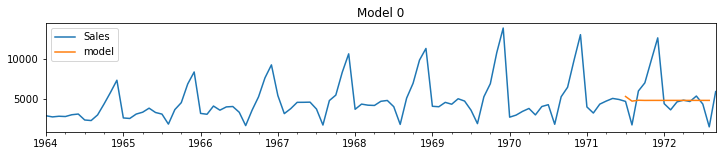

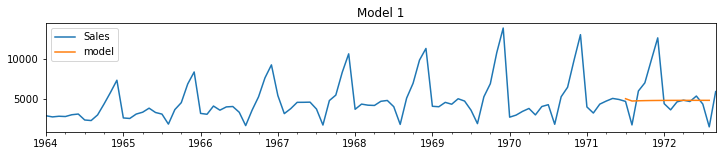

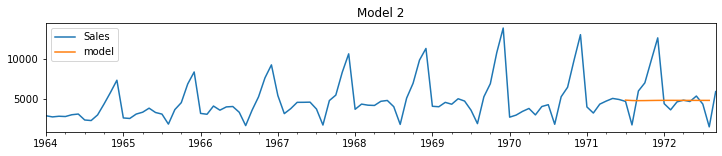

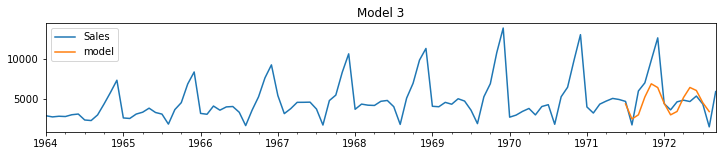

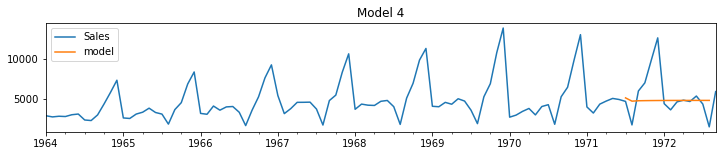

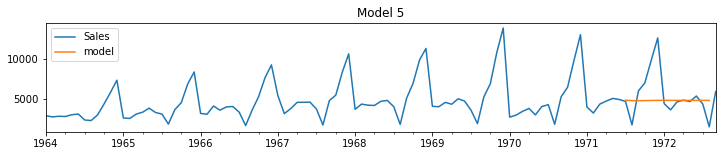

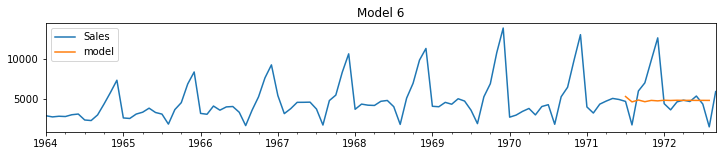

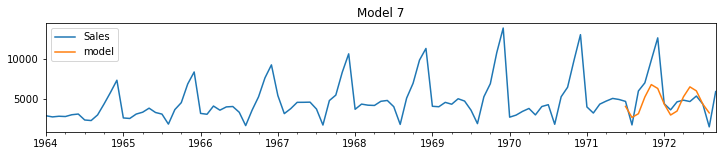

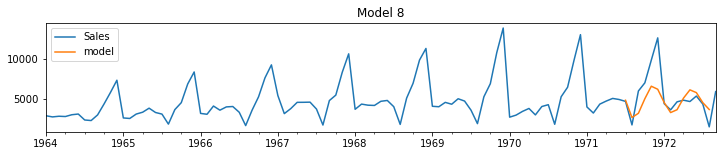

In [80]:
plot_summary(arimas,False) #先进行图像的绘制，从预测结果中选出效果可能比较好的参数组合

ARIMA系列模型看起来都问题很大，虽然索引为3、7、8的模型大略地捕捉到了一点点趋势，但是和准确的预测比起来还是有很大地差异。因此我们考虑不查看summary，直接继续绘制SARIMA备选模型的图像。

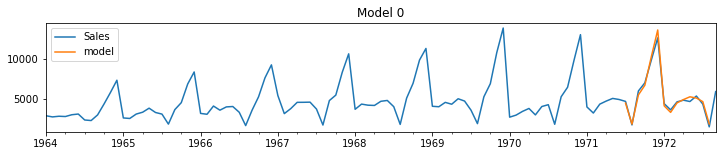

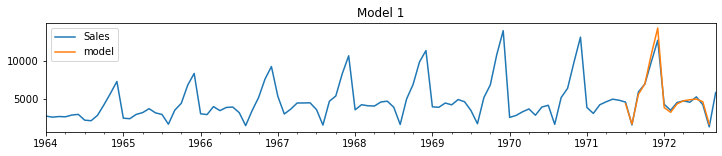

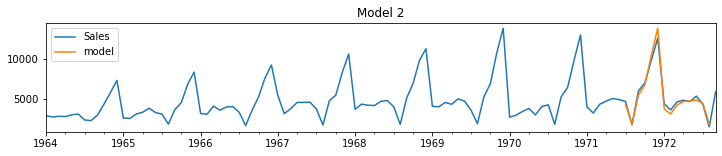

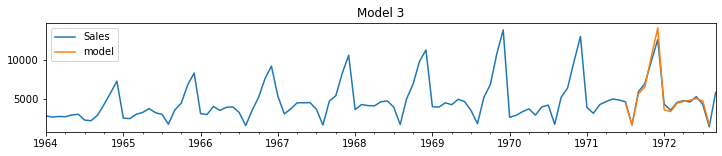

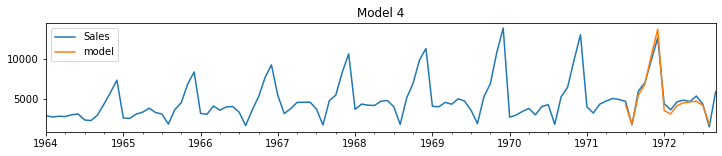

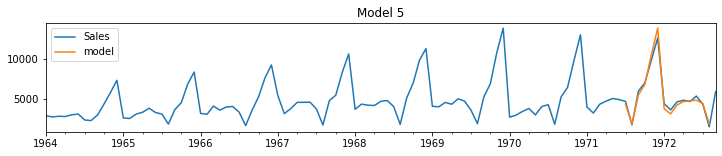

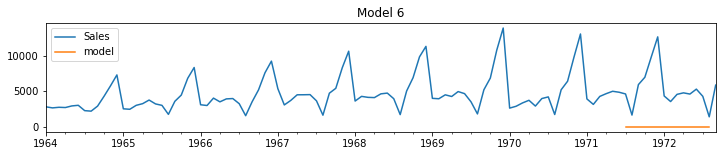

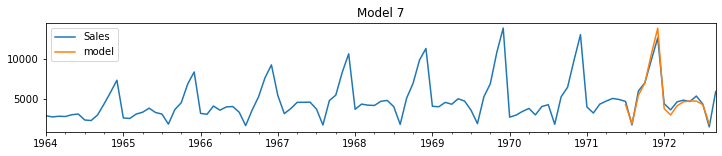

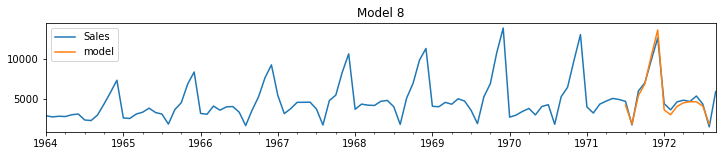

In [81]:
plot_summary(sarimas,False) #先进行图像的绘制，从预测结果中选出效果可能比较好的参数组合

可以看出，SARIMA的情况明显比ARIMA要好很多，除了索引为6的模型看起来明显不可用之外，其他的SARIMA模型看起来都能够较为精准地捕捉到数据的趋势，其中又数1、2、3、5号模型表现最佳。接下来我们可以查看这些SARIMA模型的summary总结，来观察这些模型能否被使用。

In [82]:
#打印较好的参数组合的summary
plot_summary([sarimas[1],sarimas[2],sarimas[3],sarimas[5]]
             ,model_name=["SARIMA01","SARIMA02","SARIMA03","SARIMA05"])



SARIMA01
                                  SARIMAX Results                                  
Dep. Variable:                       Sales   No. Observations:                  105
Model:             ARIMA(1, 1, [1, 2], 12)   Log Likelihood                -754.700
Date:                     Mon, 07 Nov 2022   AIC                           1517.400
Time:                             00:39:04   BIC                           1527.530
Sample:                         01-01-1964   HQIC                          1521.490
                              - 09-01-1972                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.005      0.995]
------------------------------------------------------------------------------
ar.S.L12       0.9999      0.001    722.272      0.000       0.996       1.004
ma.S.L12      -1.2211      0.065    -18.750      0.000      -1.389      -1.053
m

总结一下4个模型的各项检验结果：

模型编号|模型|AIC|系数单变量检验<br>（alpha=0.01）|残差相关性检验<br>（alpha=0.01）|残差异方差检验<br>（alpha=0.01）|残差正态性检验<br>（alpha=0.01）|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
01|(1,1,2,12)|1517.400|✔|不通过|✔|✔|
02|(2,1,1,12)|1505.725|不通过|✔|✔|✔|
03|(2,1,2,12)|1564.210|✔|✔|✔|不通过|
05|(3,1,1,12)|1507.042|不通过|✔|✔|✔|

单从AIC来看，02和05号模型有显著的优势，这两个模型都是AR模型的阶数(p)高于MA模型的阶数(q)的模型，因此我们可以认为当前时间序列数据是更适应于AR模型的。由于更适应当前数据，02和05号模型展现出的情况也更加**偏向过拟合**：系数单变量检验没有通过，说明模型中的某些项可能与标签无关，模型复杂度高于数据的需求，同时残差的白噪声混成检验全部通过了，说明模型已经提取了尽量多的信息，在学习能力上并无问题。仔细对比02和05号模型的单变量检验结果，不难发现05号模型的系数单变量检验的p值会更高，02号模型虽然也没有通过系数的单变量检验，但相对的p值会更低一些，这说明05号模型的过拟合情况更严重。

相对的，01和03号模型的AIC较高，这两个模型都通过系数的单变量检验，但在残差的白噪声混成检验中出现问题，这说明这两个模型的项中没有多于的项、但模型却没能提取到足够多的信息，因此01和03号模型处于略微欠拟合的状态。

在这种情况下，我们考虑优先从02和05号开始进行改善，如果能够一定程度上降低这两个模型的复杂度，说不定就能够找到能够通过所有检验的模型。那如何改进呢？首先02和05号模型相比，05号模型的AR阶数更高，这说明增加AR阶数后系数的单变量检验更不容易通过，因此我们应该考虑在02号模型上再次降低模型的复杂度。

于是我们提出以下三个模型来进行尝试：

In [83]:
updates = [ARIMA(df["Sales"],seasonal_order=(1,1,1,12)) #00号模型，不过在最初画图的时候没有被我们选出来
         ,ARIMA(df["Sales"],seasonal_order=(2,0,1,12)) #取消高阶差分
         ,ARIMA(df["Sales"],seasonal_order=(2,1,1,4)) #降低多步差分的步数
        ]

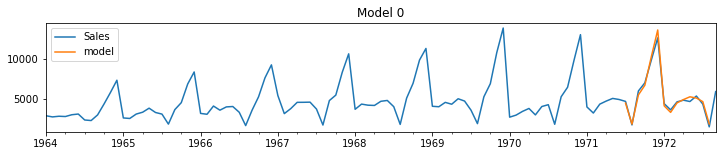

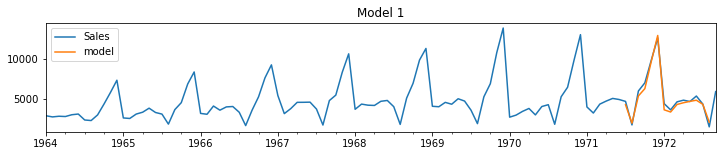

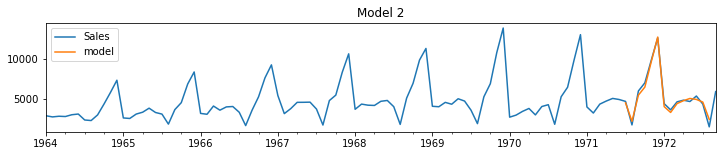

In [196]:
plot_summary(updates,False) #先进行图像的绘制，从预测结果中选出效果可能比较好的参数组合

In [197]:
plot_summary(updates,True,["降低p的阶数","降低差分阶数","降低差分步数"])



降低p的阶数
                                SARIMAX Results                                 
Dep. Variable:                    Sales   No. Observations:                  105
Model:             ARIMA(1, 1, [1], 12)   Log Likelihood                -750.716
Date:                  Fri, 04 Nov 2022   AIC                           1507.432
Time:                          22:44:41   BIC                           1515.030
Sample:                      01-01-1964   HQIC                          1510.500
                           - 09-01-1972                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.005      0.995]
------------------------------------------------------------------------------
ar.S.L12       0.9804      0.127      7.709      0.000       0.653       1.308
ma.S.L12      -0.9228      0.281     -3.288      0.001      -1.646      -0.200
sigma2      5.969e+05   1.0

结果总结如下：

模型编号|模型|AIC|系数单变量检验<br>（alpha=0.01）|残差相关性检验<br>（alpha=0.01）|残差异方差检验<br>（alpha=0.01）|残差正态性检验<br>（alpha=0.01）|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
原始模型|(2,1,1,12)|1505.725|不通过|✔|✔|✔|
降低AR的阶数|(1,1,1,12)|1507.432|✔|✔|✔|✔|
降低差分阶数|(2,0,1,12)|1736.269|不通过|不通过|✔|✔|
降低差分步数|(2,1,1,4)|1719.996|不通过|不通过|✔|不通过|

不难发现，SARIMA(1,1,1,12)模型可以通过所有的检验、并拿到一个较低的AIC分数，如此我们就可以确定SARIMA(1,1,1,12)为当前最合适的模型。相比之下，随意降低差分阶数、或是降低我们之前使用差分运算确定好的差分步数，可能大规模破坏模型的原始假设。因此当模型的复杂度遭遇问题时，我们需要尽量在p和q上来进行调整，而不要改变已经确定好的差分步数和阶数。

#### 3.3.7 基于机器学习时序库实现时序预测

In [206]:
#!pip install pmdarima
#!pip install prophet

  Using cached pmdarima-2.0.1-cp39-cp39-win_amd64.whl (571 kB)
     ---------------------------------------- 9.2/9.2 MB 958.9 kB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached prophet-1.1.1-cp39-cp39-win_amd64.whl (12.1 MB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached holidays-0.16-py3-none-any.whl (184 kB)
     -------------------------------------- 81.2/81.2 kB 156.6 kB/s eta 0:00:00
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached hijri_converter-2.2.4-py3-none-any.whl (14 kB)



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


- **Pmdarima**

Pmdarima是以statsmodel和autoarima为基础、封装研发出的Python时序分析库、也是现在市面上封装程度最高、代码最为简洁的时序预测库之一。Pmdarima由sklearn团队开发，沿袭了sklearn库的代码习惯、并保留了一切接入sklearn的接口，是非常方便机器学习学习者学习的工具。该库包括了以R语言为基础的autoarima所有的功能，并且能够处理平稳性、季节性、周期性等问题，可以执行差分、交叉验证等运算，还有内容丰富的[官方说明文档](https://alkaline-ml.com/pmdarima/index.html)供大家学习使用。以下是使用Pmdarima实现一个简单预测的过程：

In [293]:
import pmdarima as pm
from pmdarima import model_selection
import numpy as np
from sklearn.metrics import mean_squared_error

In [292]:
#使用pm分割数据，遵循时序规则，不会打乱时间顺序
data = pm.datasets.load_wineind()
train, test = model_selection.train_test_split(data, train_size=150)

In [280]:
#5秒之内自动化建模，只支持SARIMAX混合模型
arima = pm.auto_arima(train, trace=True, #训练数据，是否打印训练过程？
                      error_action='ignore', suppress_warnings=True, #无视警告和错误
                      maxiter=5, #允许的最大迭代次数
                      seasonal=True, m=12 #是否使用季节性因子？如果使用的话，多步预测的步数是多少？
                     )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2915.873, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3049.597, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2954.975, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2947.028, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3047.612, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2940.108, Time=0.07 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2915.651, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2986.348, Time=0.03 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2915.275, Time=0.26 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2918.411, Time=0.33 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=2925.080, Time=0.33 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=2911.330, Time=0.31 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=2911.555, Time=0.09 sec
 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=2914.196, Time=0.31 sec
 ARIMA(2,1,1)(1,0,1

In [290]:
#预测
preds = arima.predict(n_periods=test.shape[0])

In [291]:
preds #按照测试集的日期进行预测

array([28695.20262447, 26629.88933873, 26433.50082247, 26859.8038453 ,
       30146.53177581, 35281.11140492, 19205.10454563, 22859.02945304,
       24496.95682401, 24587.85948268, 24806.01873636, 24602.7879835 ,
       28637.13195264, 26747.65432097, 26562.36304516, 26951.1866475 ,
       29757.37260115, 34128.14656631, 20426.74351924, 23541.56331491,
       24937.74910968, 25015.0455062 , 25200.88178079, 25027.71817712,
       28465.81904103, 26855.59417682])

In [296]:
#评估指标 - 可共用sklearn的评估指标，也可调用特定的时序指标AIC
np.sqrt(mean_squared_error(test, preds))

2507.336957403786

In [298]:
arima.aic()

2908.0934730251956

傻瓜式搜索合适的参数，从效率角度来说远远超过statsmodel。从上述代码不难看出，pmdarima的代码思路是更靠近机器学习而不是统计学的，因此pmd.auto_arima跑出的结果往往无法满足统计学上的各类检验要求。同时我们也很容易发现，同样的模型在statsmodel会有更高的AIC，因此statsmodel对模型的要求会更加严格：

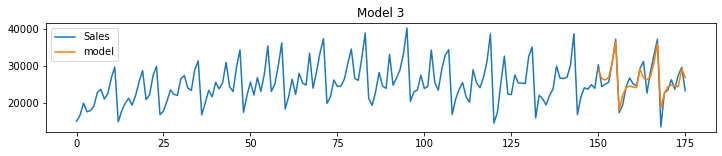

In [283]:
data = pd.DataFrame(data)
data.columns = ["Sales"]
model = ARIMA(data["Sales"],order=(2,1,1),seasonal_order=(1,0,1,12))
m = model.fit()
data["model"] = m.predict(start=150,end=175,dynamic=True)
data[["Sales","model"]].plot(figsize=(12,2),title="Model {}".format(idx));

In [285]:
print(m.summary(alpha=0.05))

                                    SARIMAX Results                                     
Dep. Variable:                            Sales   No. Observations:                  176
Model:             ARIMA(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1659.205
Date:                          Fri, 04 Nov 2022   AIC                           3330.410
Time:                                  23:50:36   BIC                           3349.399
Sample:                                       0   HQIC                          3338.113
                                          - 176                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1013      0.075     -1.353      0.176      -0.248       0.045
ar.L2         -0.2027      0.083     -2.440      0.

当然，既然pmdarima是基于statsmodel搭建，也能够使用基于R语言的autoarima所有的功能，pmdarima自然也能够支持相应的各类统计学检验以及相关系数计算，更多的详情都可以参考pmdarima的[官方说明文档](https://alkaline-ml.com/pmdarima/index.html)。

- **Prophet**

Prophet是Facebook开发的、基于加法模型实现时间序列预测的时序库。由于没有使用ARIMA模型，Prophet中设计了大量针对非线性趋势（如年、月、周等季节性以及假日效应）的针对性处理方式，因此Prophet非常适用于具有强烈季节性影响的时间序列。除此之外，Prophet对缺失值和趋势变化（均值的变化）具有鲁棒性，还可以很好地处理异常值，可以认为Propeht是目前市面上鲁棒性最强、最为稳定的机器学习时序库。

和pmdarima一样，Prophet可以无缝接入sklearn API，并且还可以执行类似于sklearn的fit和predict流程。同时Prophet要求数据的格式是pandas，且索引是pandas的时间戳格式。

In [306]:
import pandas as pd
from prophet import Prophet

df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [308]:
df #时间从2007-2016，覆盖大约9年的时间

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [316]:
#在现有数据上建模
m = Prophet() #事实上有很多复杂的参数，需要将加法模型掌握透彻才能够使用得当
m.fit(df)

00:40:13 - cmdstanpy - INFO - Chain [1] start processing
00:40:13 - cmdstanpy - INFO - Chain [1] done processing


In [310]:
#创造测试集，在训练集基础上、再向后延伸365天
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [311]:
future

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
...,...
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18


In [313]:
#执行预测 - 除了输出预测结果，还会输出该预测结果的置信区间
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.210268,7.464178,8.882681
3266,2017-01-16,8.535296,7.737545,9.269636
3267,2017-01-17,8.322712,7.574550,9.008940
3268,2017-01-18,8.155345,7.420226,8.879433
3269,2017-01-19,8.167304,7.390191,8.884565


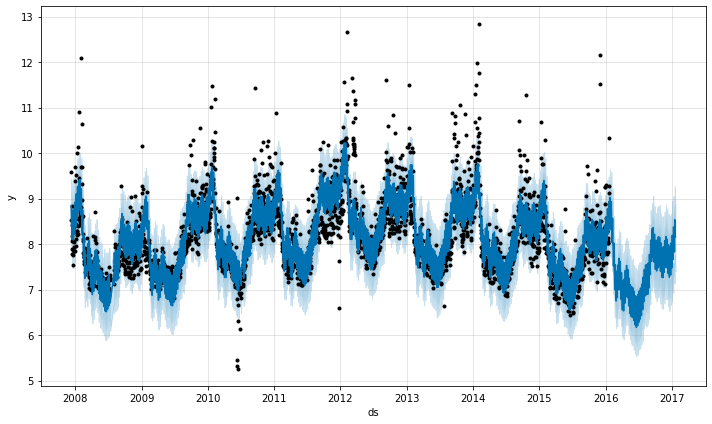

In [315]:
#绘制图像
fig1 = m.plot(forecast)

## 4 时序数据的去时序化

什么是“去时序化”？为什么要“去时序化”？去时序化有哪些优势和问题？

【未完待续】